# Impacto de Valores Ausentes

Para ilustrar a diferença entre os mecanismos de valores ausentes, vamos simular diferentes mecanismos de valores ausentes, e comparar as bases de dados. Além disso também vamos mostrar as diferenças de tratamento quando a ausência de valores ocorre por motivos diferentes.

## 0 - Instalação SweetViz

In [ ]:
!pip install sweetviz
import warnings
warnings.simplefilter(action="ignore")

     |████████████████████████████████| 15.1 MB 580 kB/s 


## 1 - Importação de Dependências e do Dataset

In [ ]:
import pandas as pd
import sweetviz as sv
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
from scipy.stats import norm

In [ ]:
# Importação do Dataframe
gorjeta = pd.read_csv("https://raw.githubusercontent.com/schloerke/cranvasOLD/master/files/data/tips.csv",index_col=0)

## 2 - Adicionando Valores Ausentes

In [ ]:
# Veja que a base originalmente não possui valores ausentes
# Vamos selecionar uma amostra aleatória da base de 20% e adicionar valores nulos
gorjeta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 1 to 244
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 15.2+ KB


In [ ]:
# Vamos começar fazendo uma cópia da base
gorjeta_NA = gorjeta.copy()

In [ ]:
# Selecionando 20% dos índices
amostra = np.random.choice(list(gorjeta_NA.index),int(len(gorjeta)*0.2))

In [ ]:
# Depois para cada índice escolhido aleatoriamente mudamos o valor de algumas colunas para nulo
gorjeta_NA.loc[amostra,['total_bill','tip']] = np.nan

                                             |          | [  0%]   00:00 -> (? left)


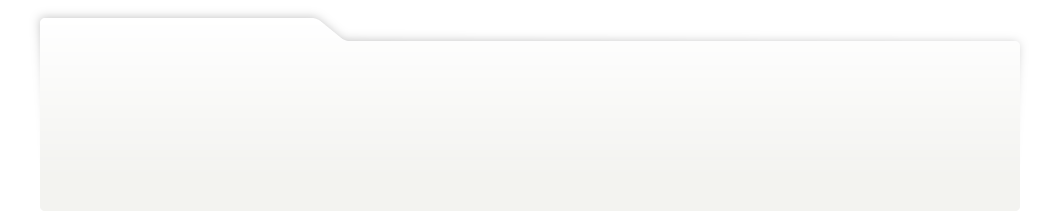
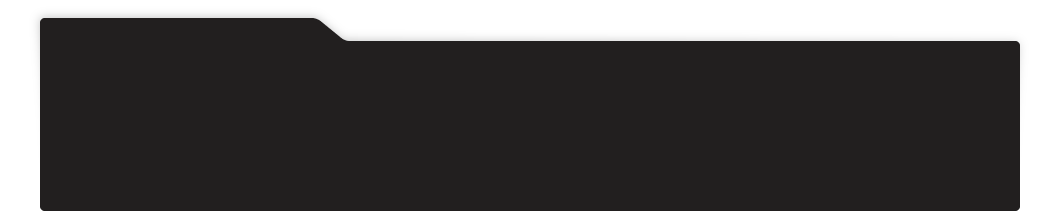
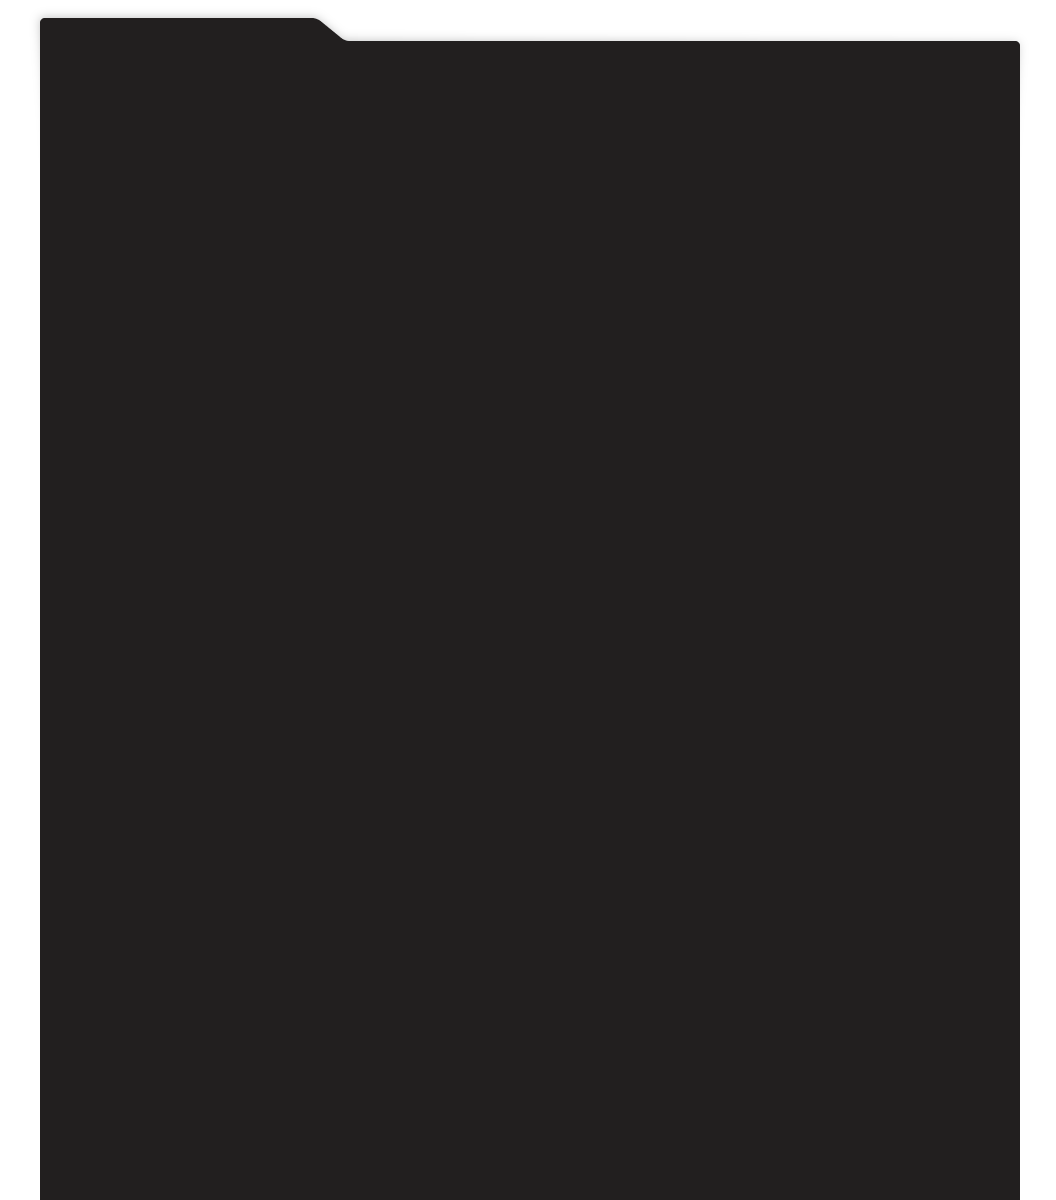
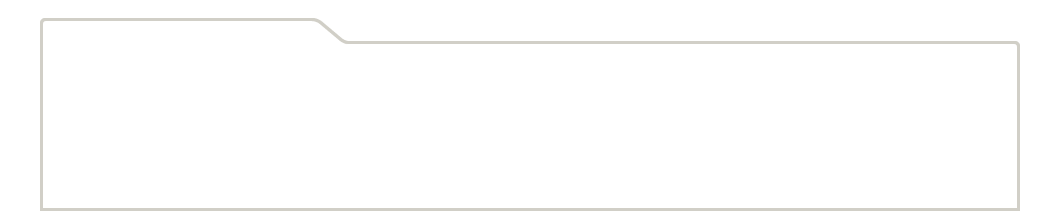
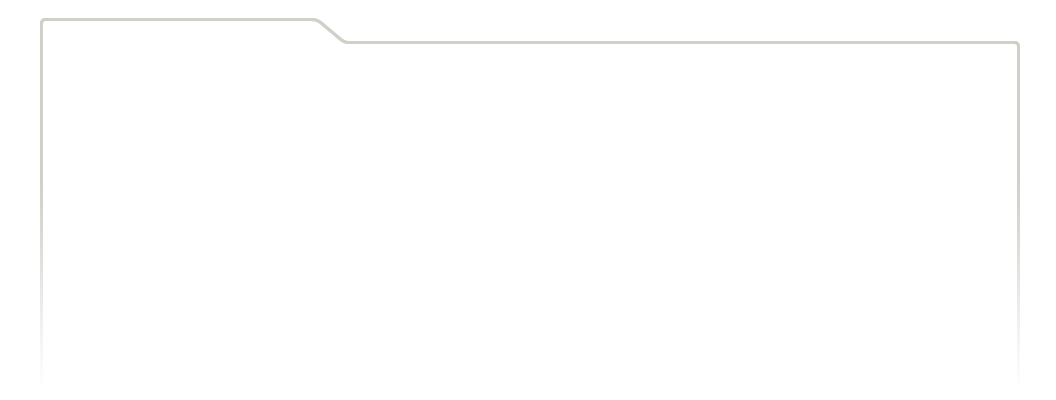
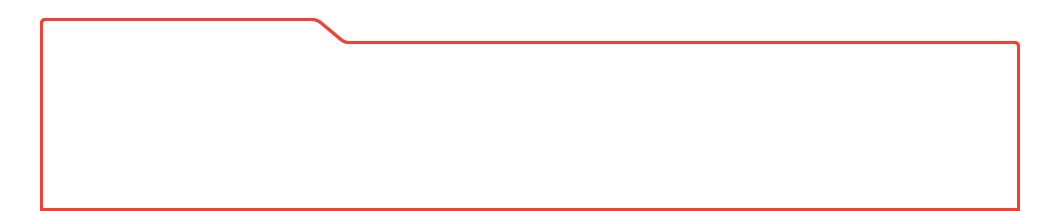
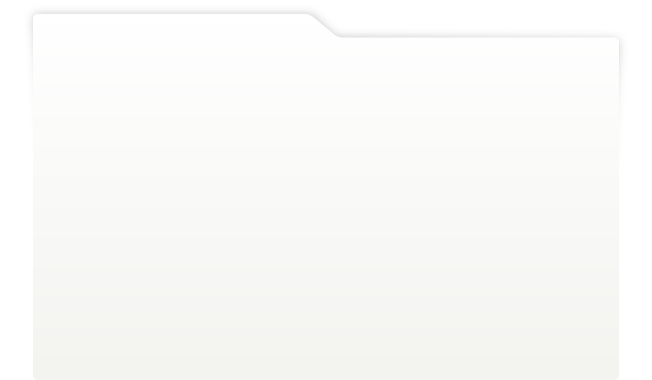
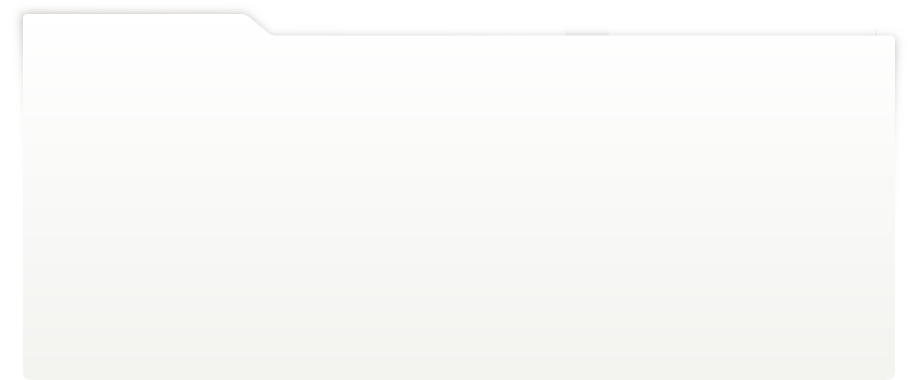
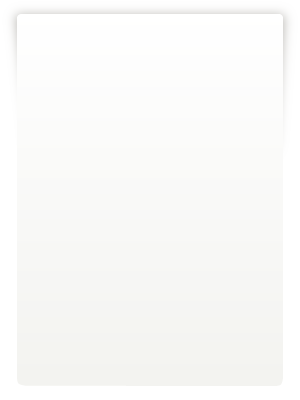
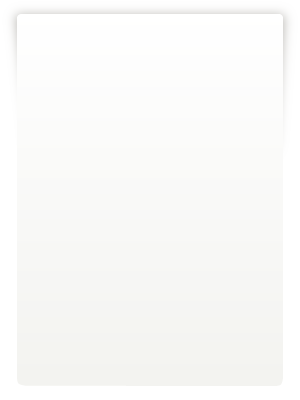
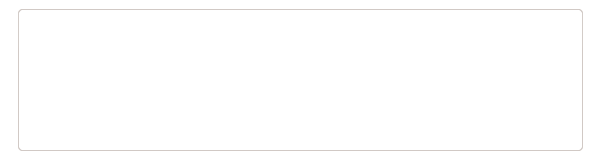
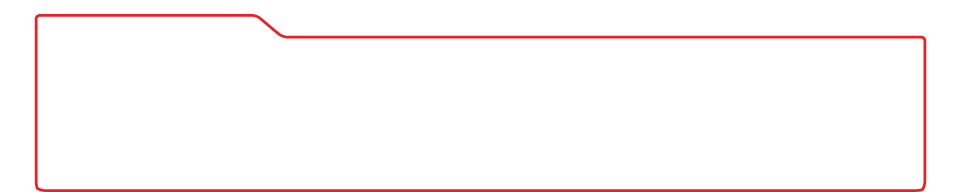
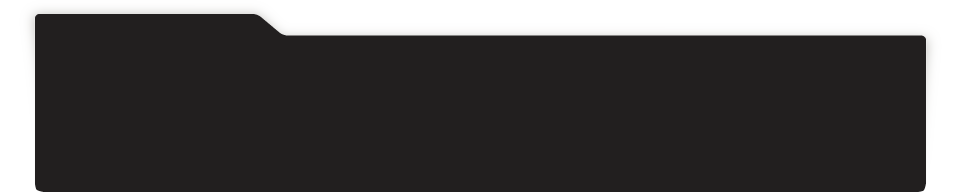
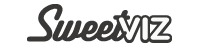
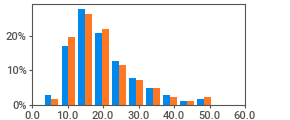
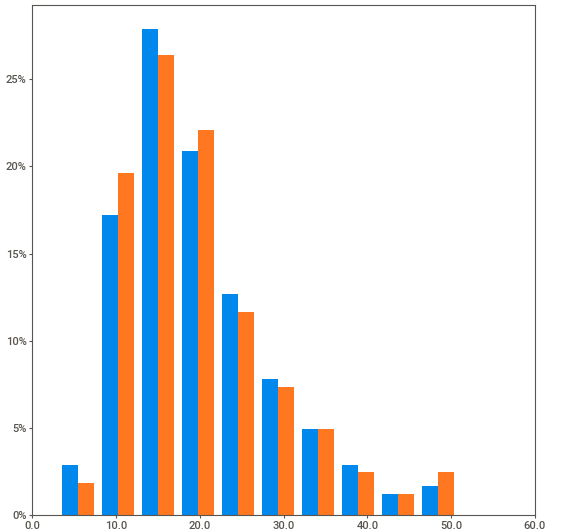
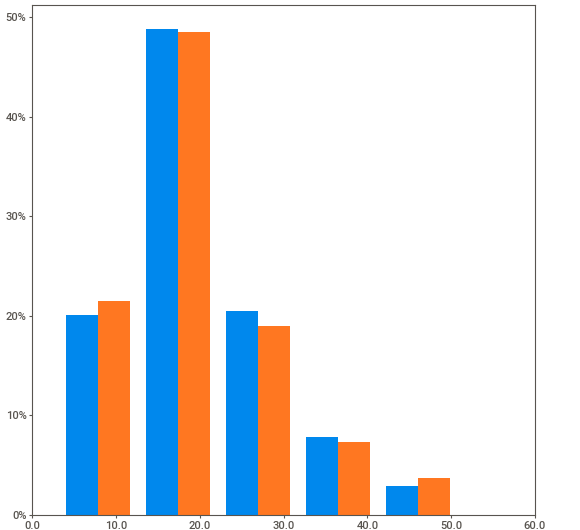
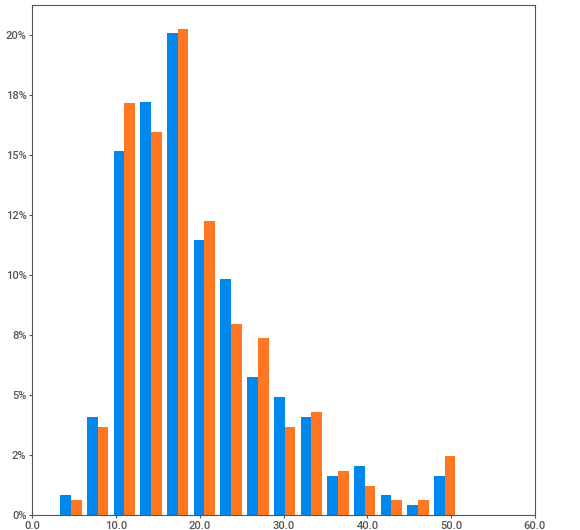
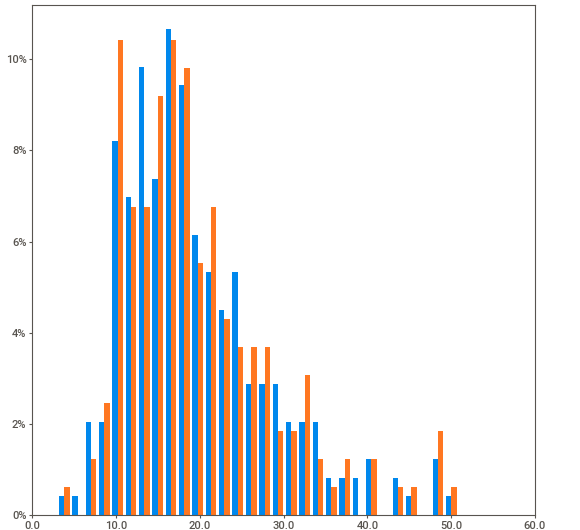
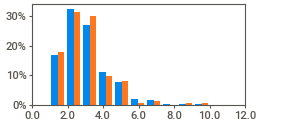
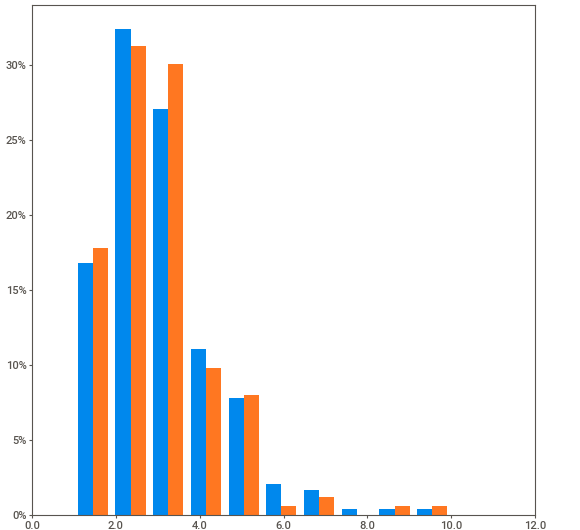
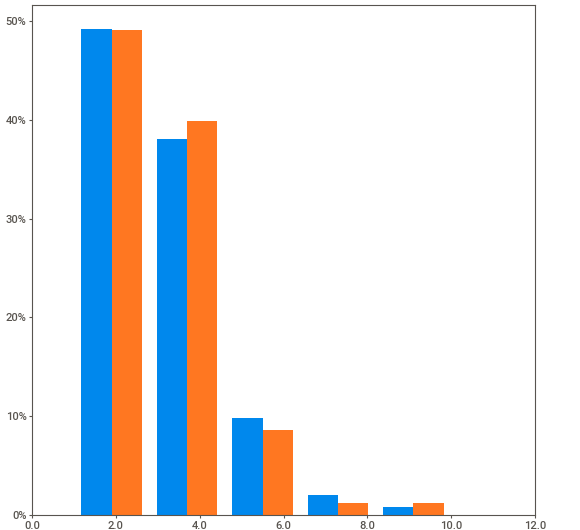
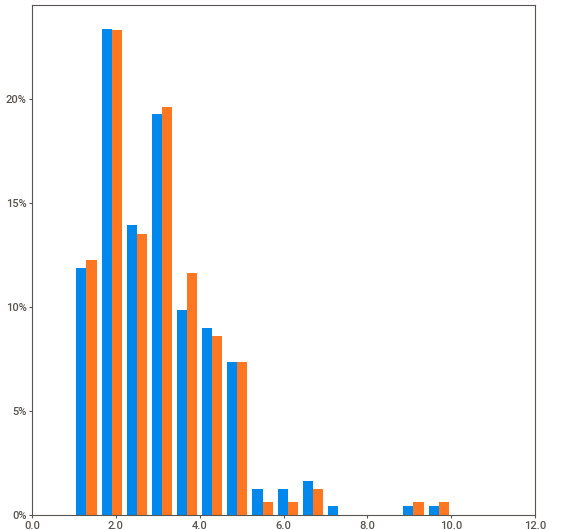
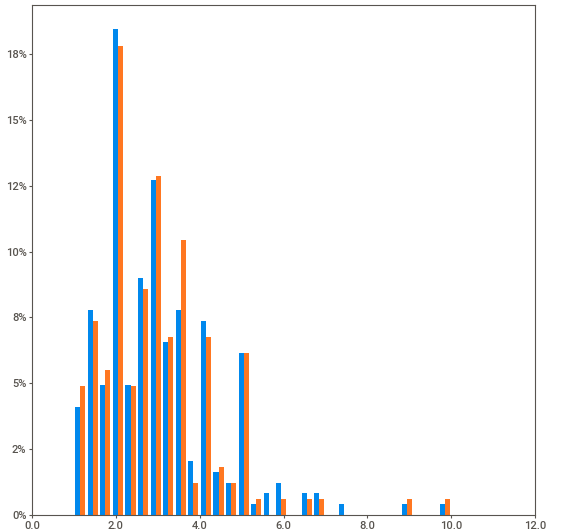
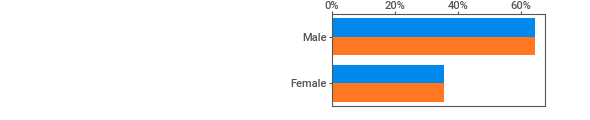
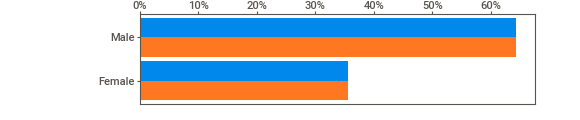
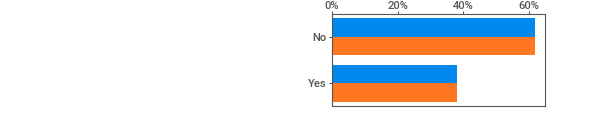
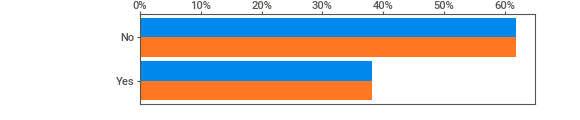
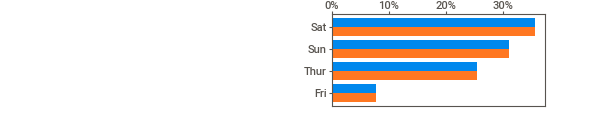
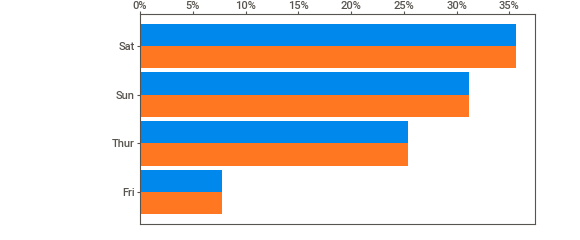
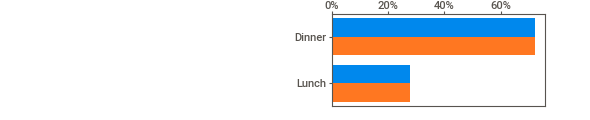
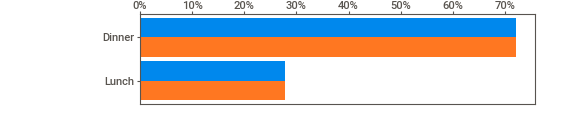
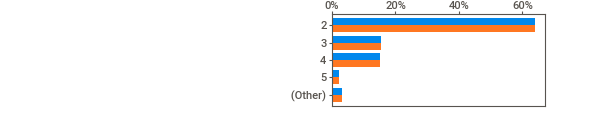
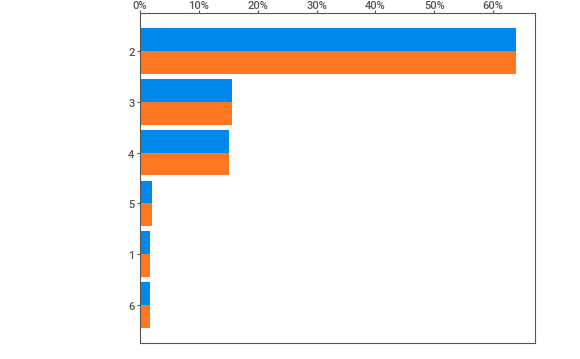
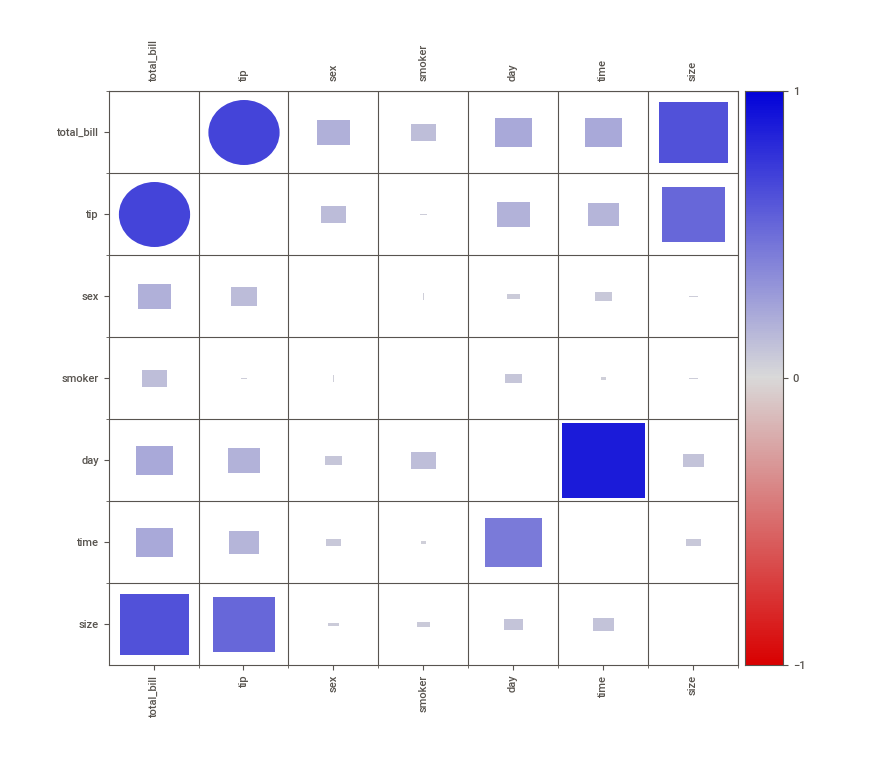
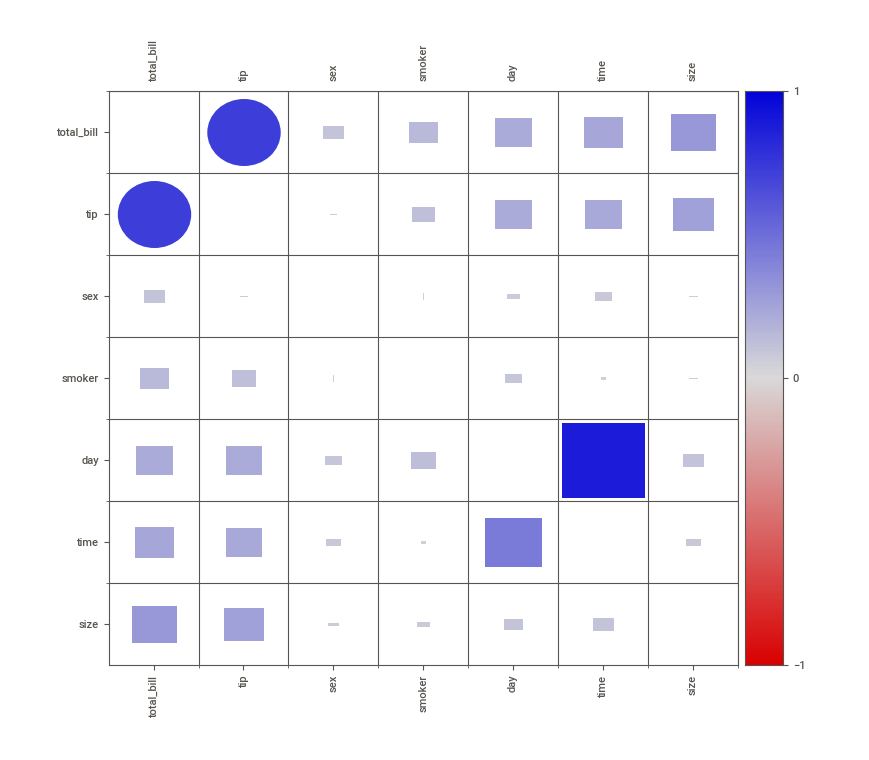

In [ ]:
# Por fim vamos comparar a base origianl e a com ausências
report = sv.compare([gorjeta,"Original"],[gorjeta_NA,"Ausentes"])
report.show_notebook() 

## 3 - Remoção de Valores Ausentes

Uma das técnicas utilizadas para lidar com os dados ausentes é remover as linhas que contém um valor ausente.

In [ ]:
# Fazendo cópia da base já com drop das linhas com valores nulos
gorjeta_removido = gorjeta_NA.dropna()

                                             |          | [  0%]   00:00 -> (? left)


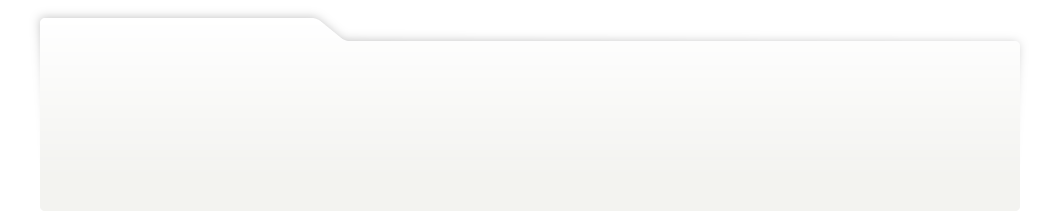
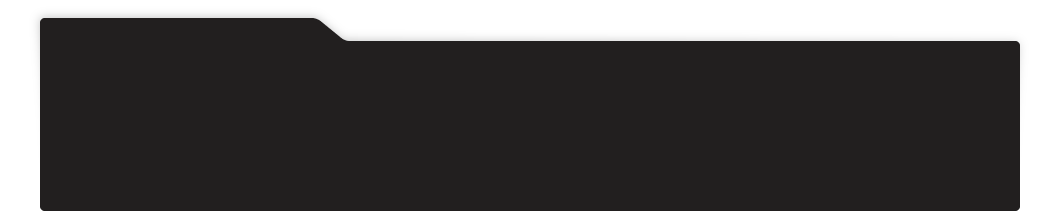
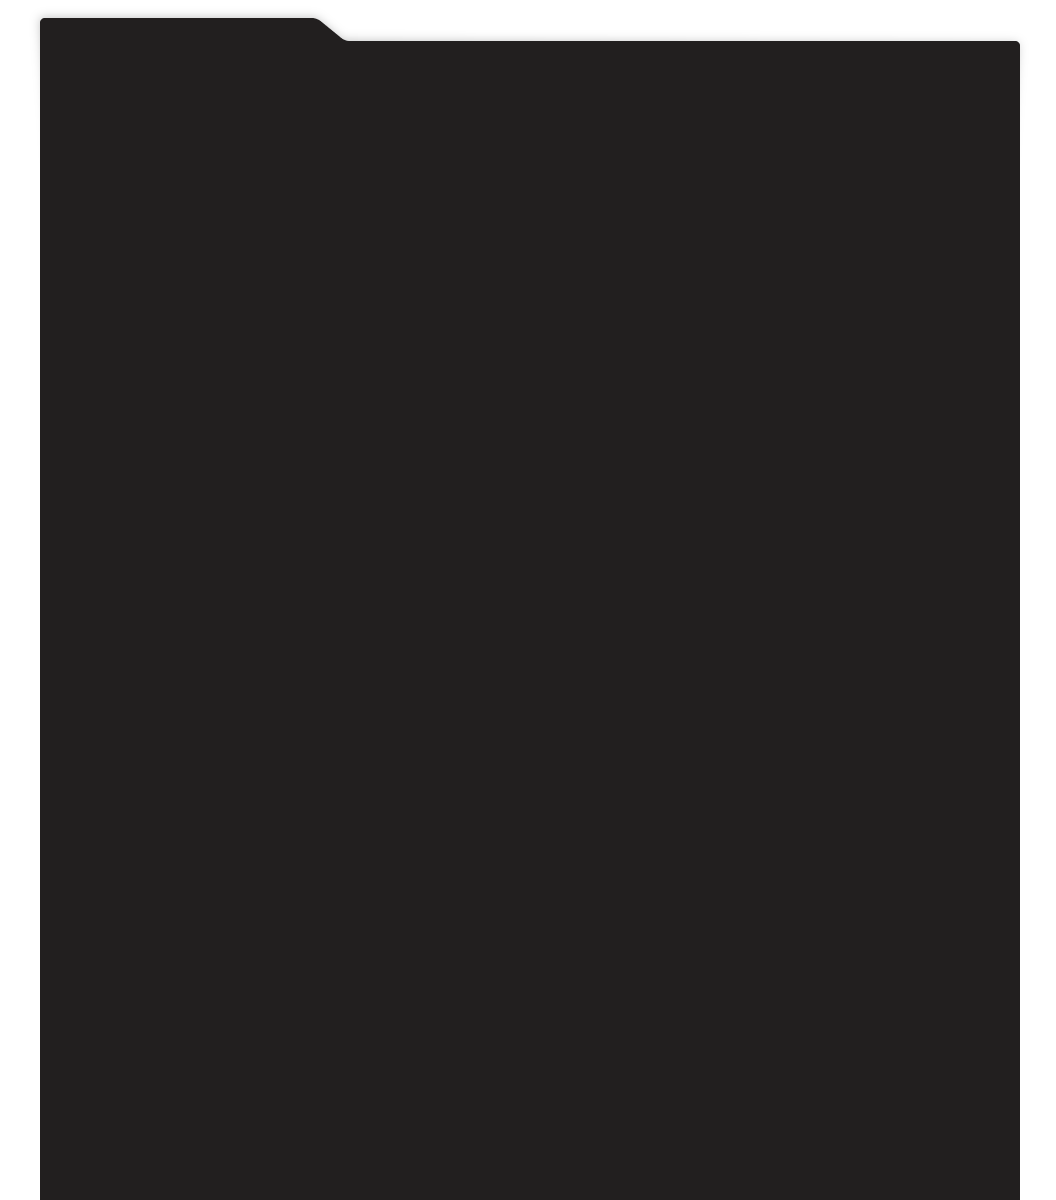
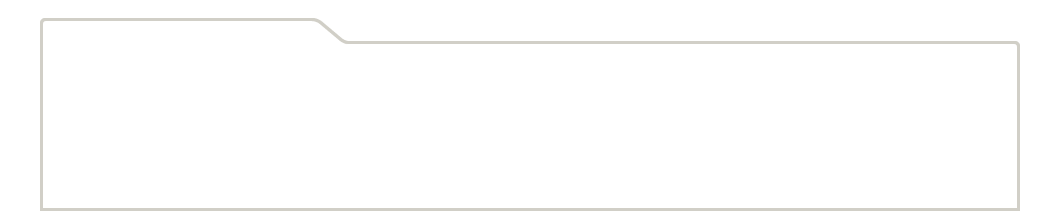
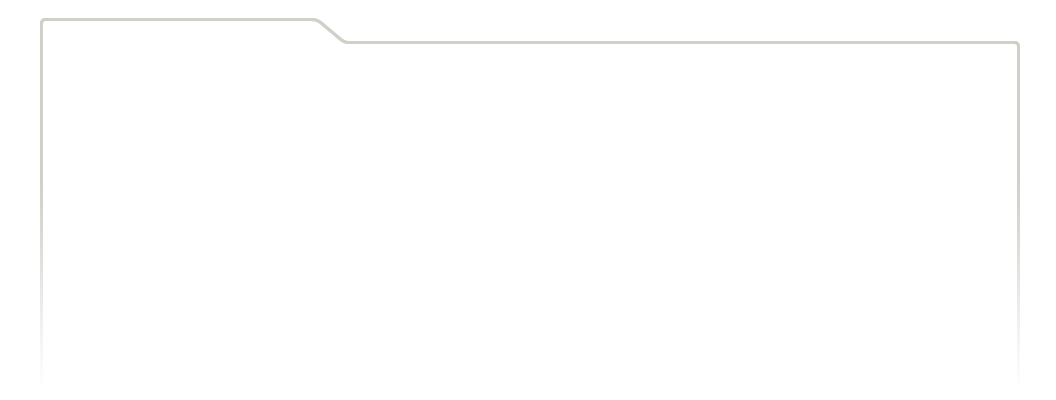
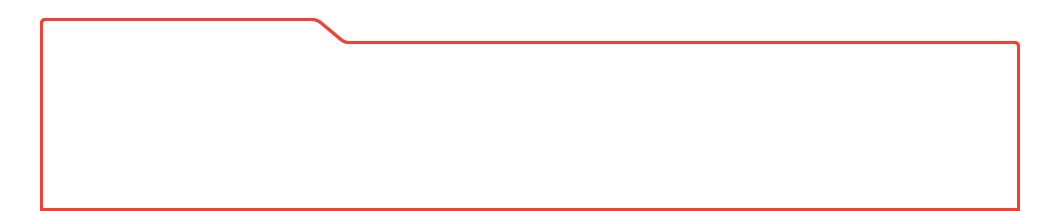
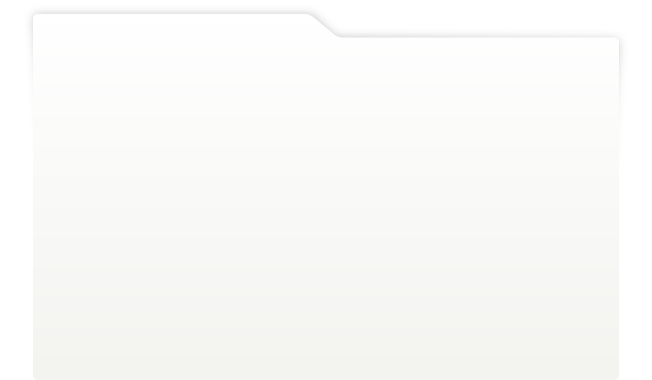
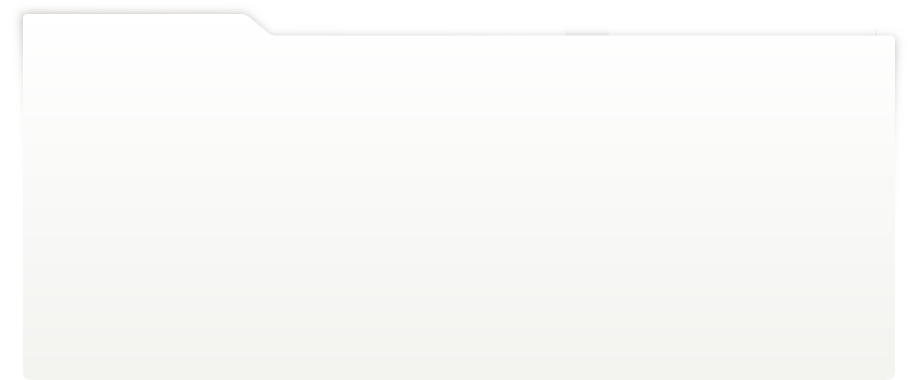
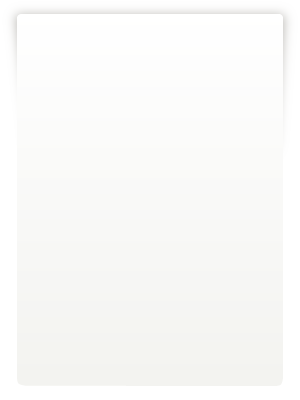
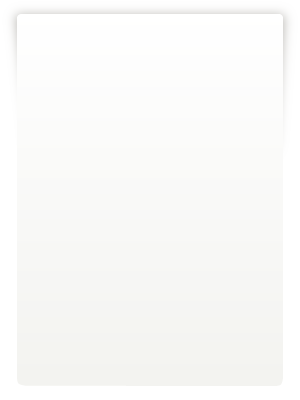
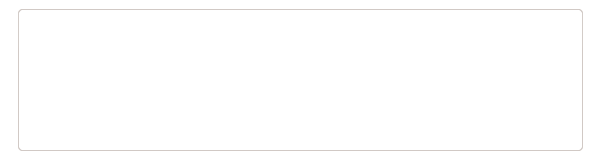
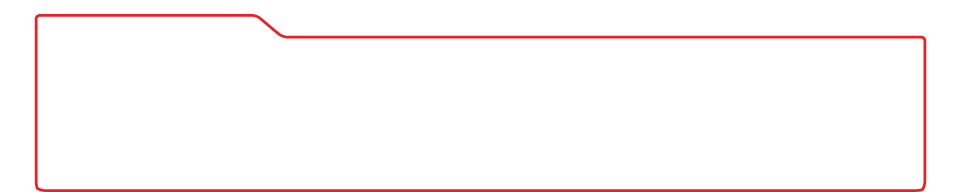
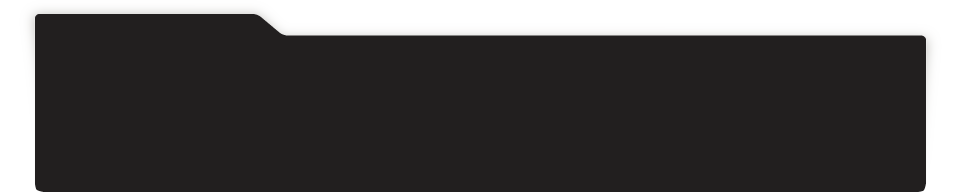
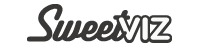
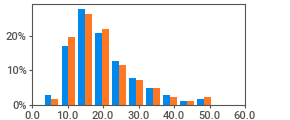
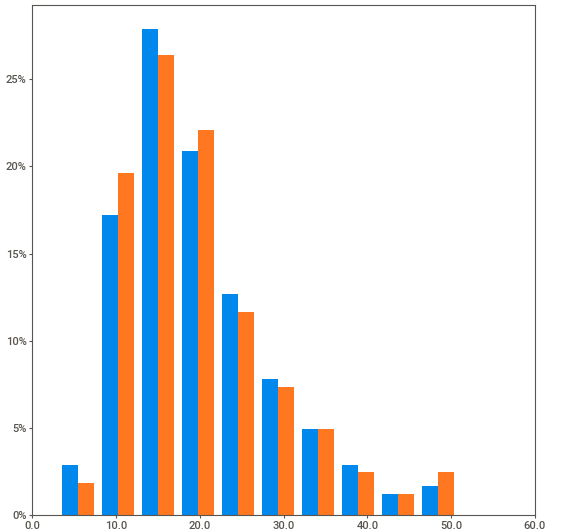
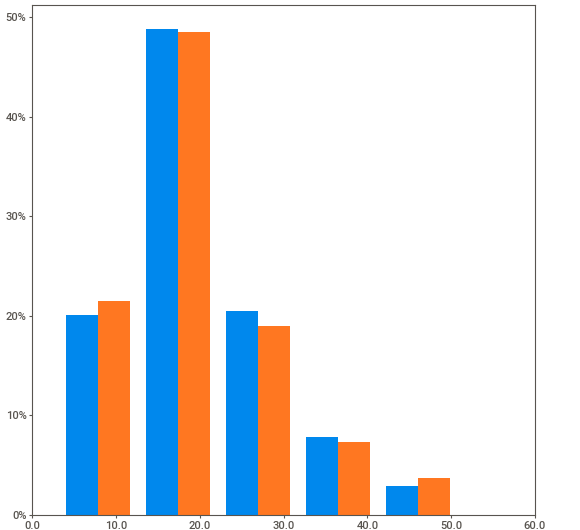
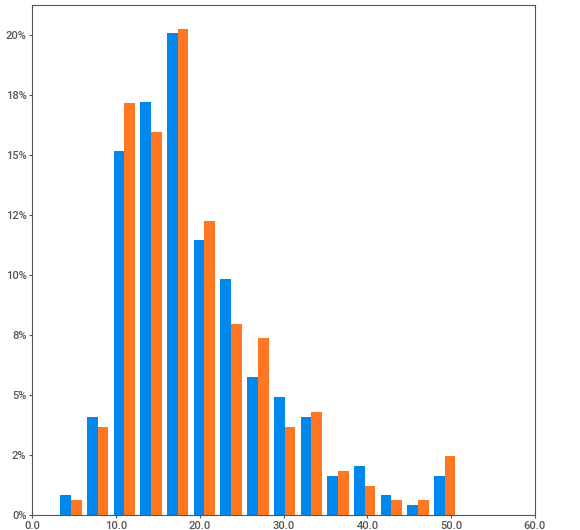
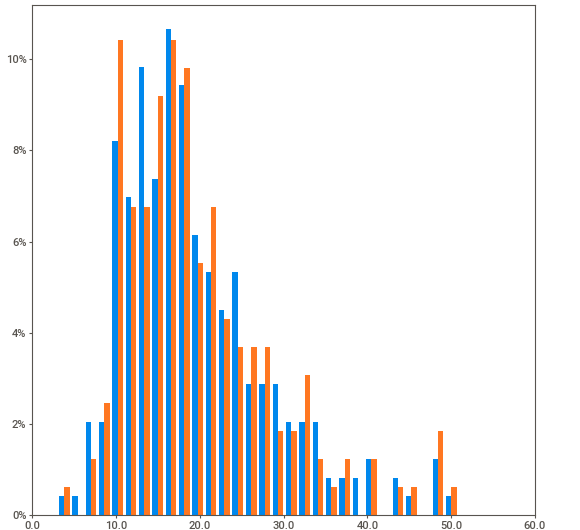
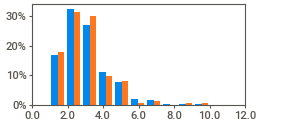
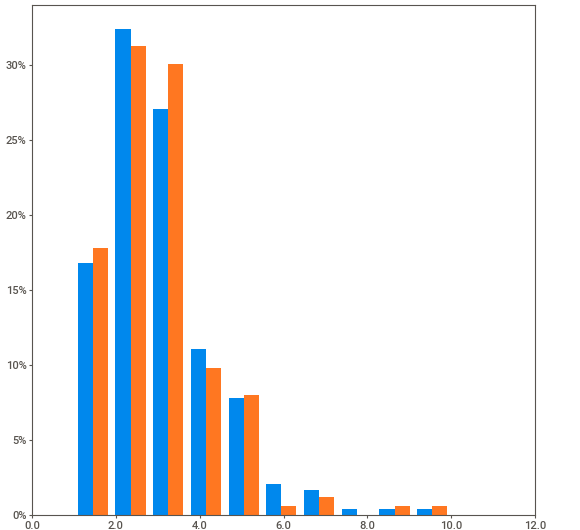
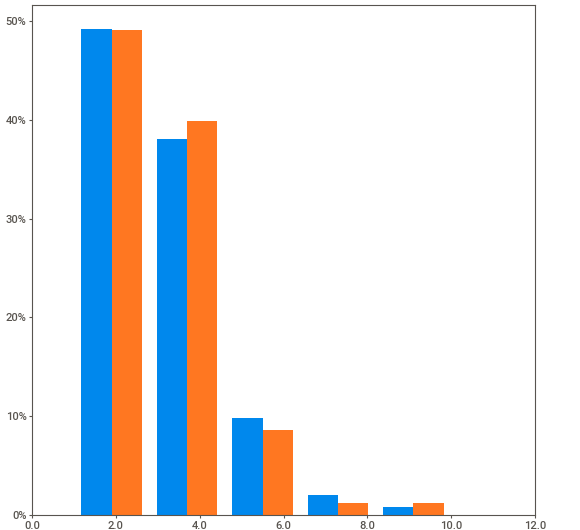
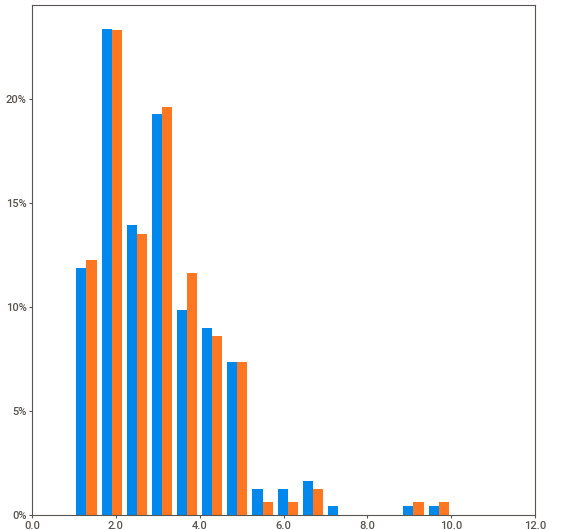
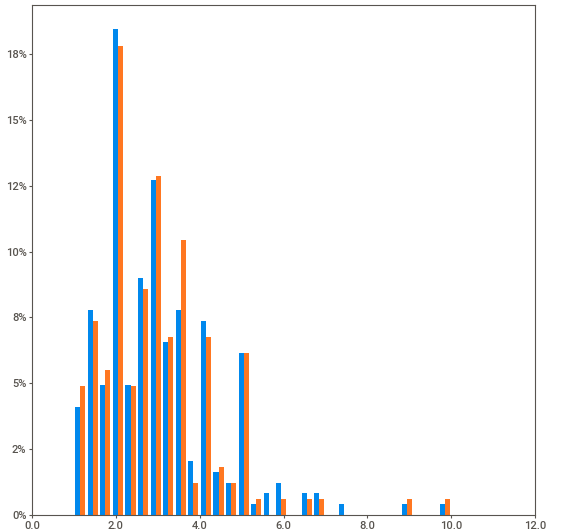
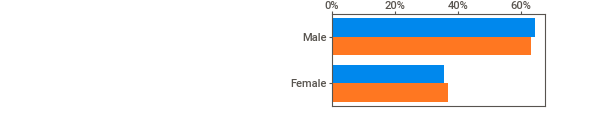
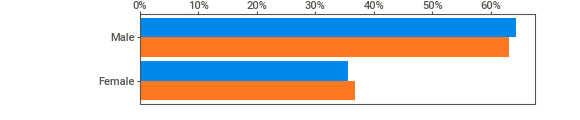
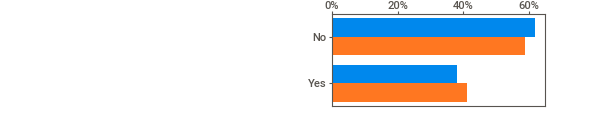
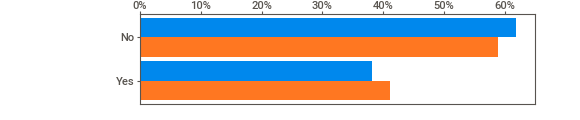
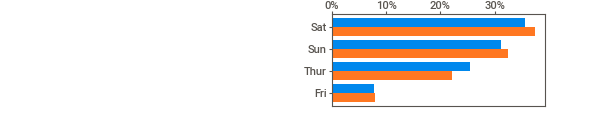
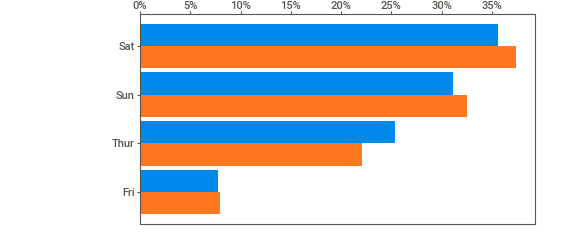
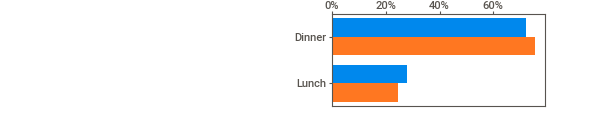
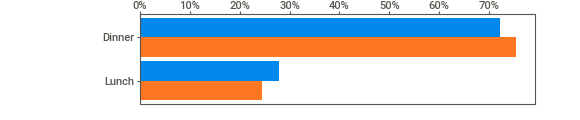
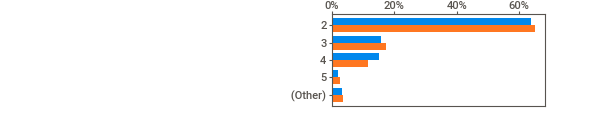
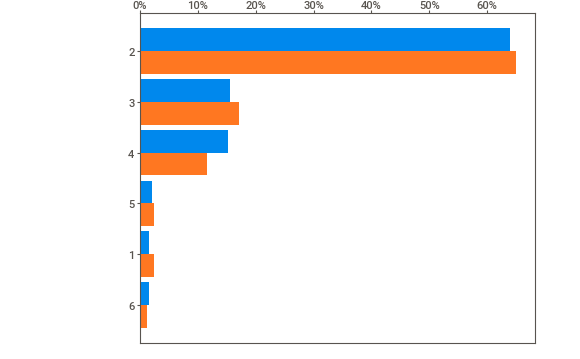
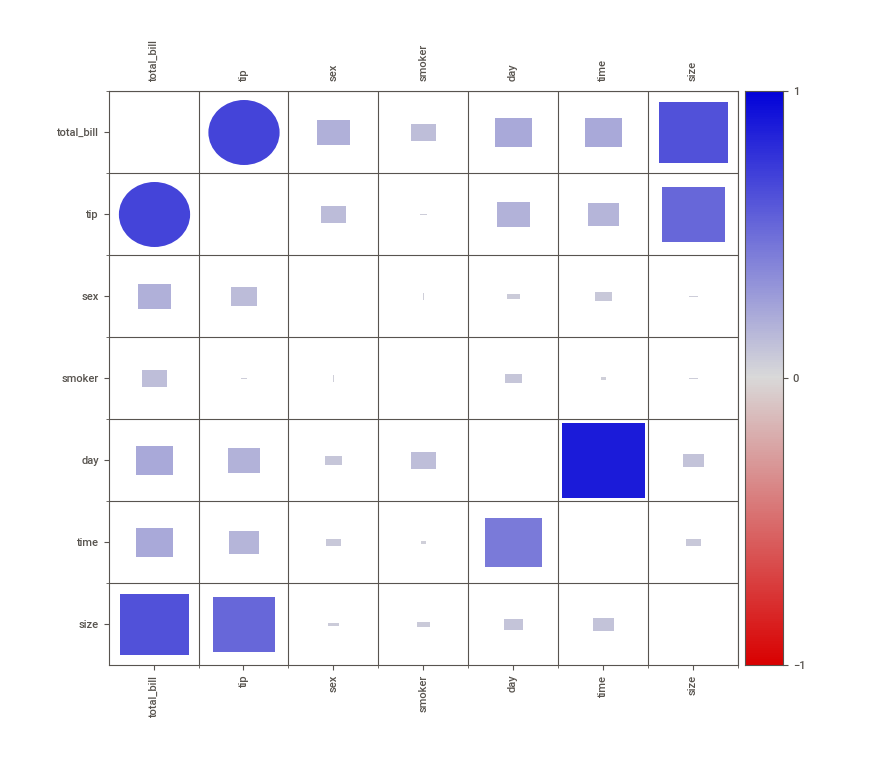
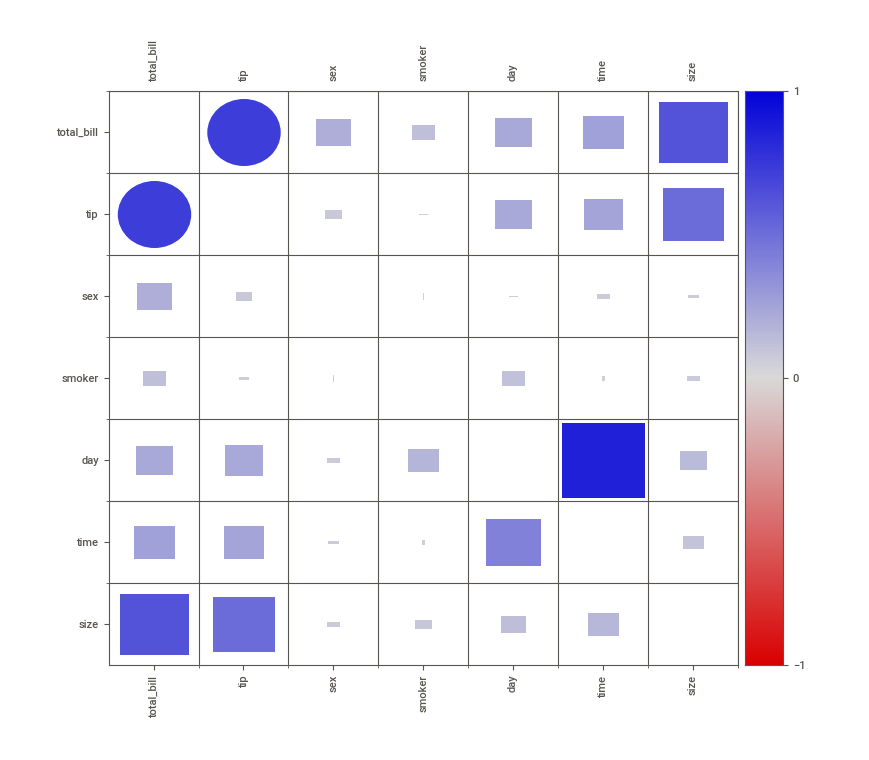

In [ ]:
# Vendo diferença através de report
report = sv.compare([gorjeta,"Original"],[gorjeta_removido,"Removido"])
report.show_notebook() 

## 4 - Substituição dos Valores Nulos

Outra técnica possível é substituir os valores nulos por um outro valor da base, como a média para colunas numéricas ou a moda para valores categóricos.

In [ ]:
# Fazendo inputação da média nos valores nulos nas colunas do dataset
gorjeta_input = gorjeta_NA.fillna(gorjeta_NA.median())

                                             |          | [  0%]   00:00 -> (? left)


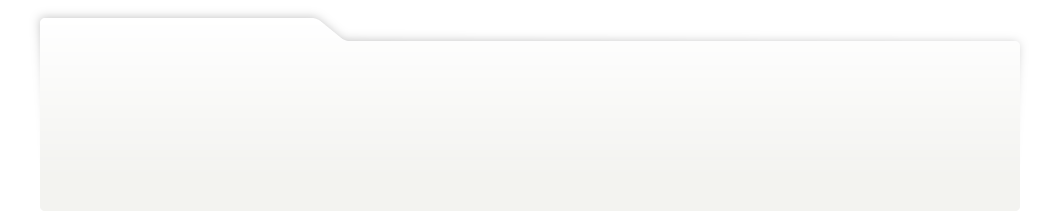
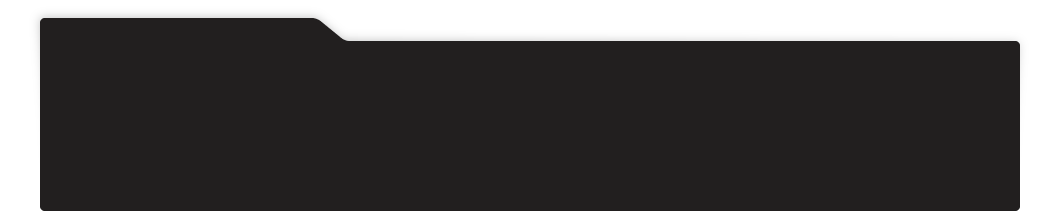
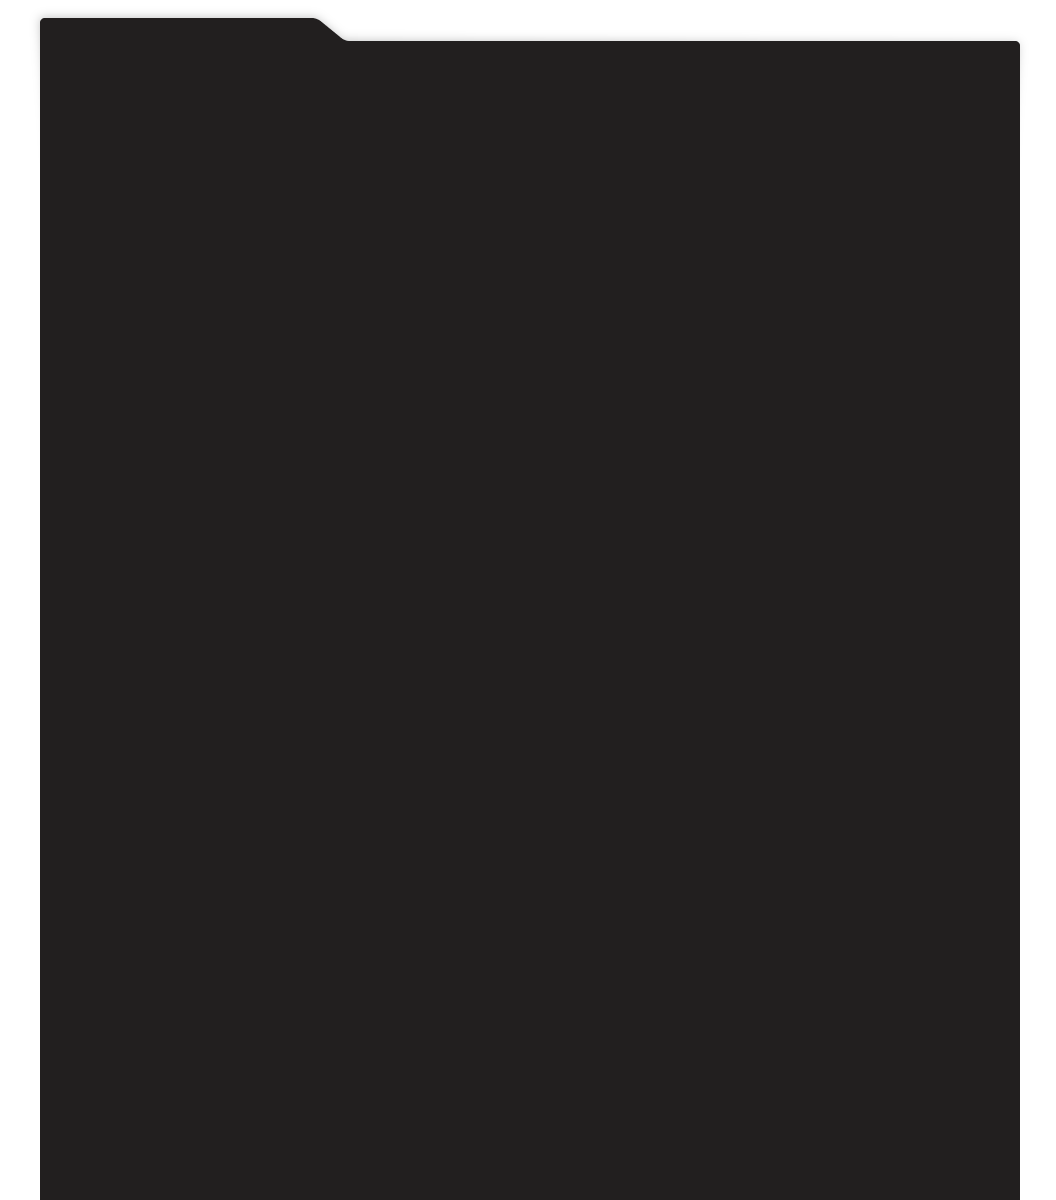
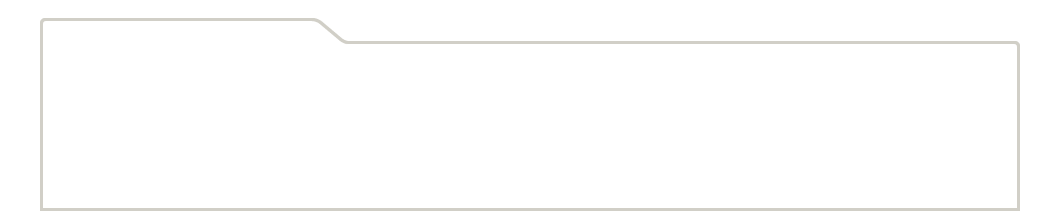
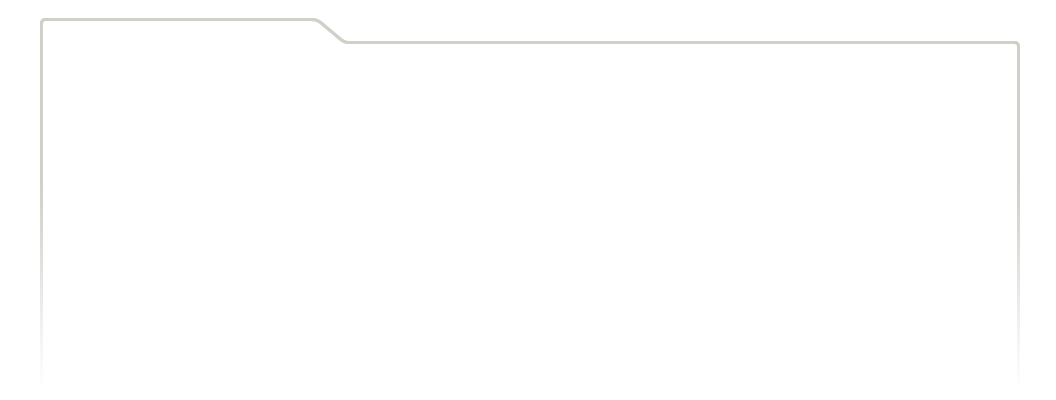
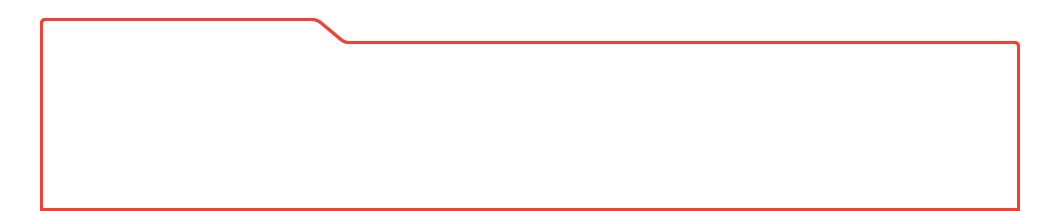
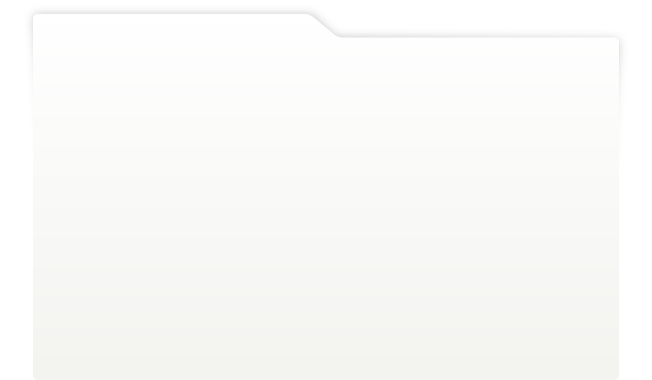
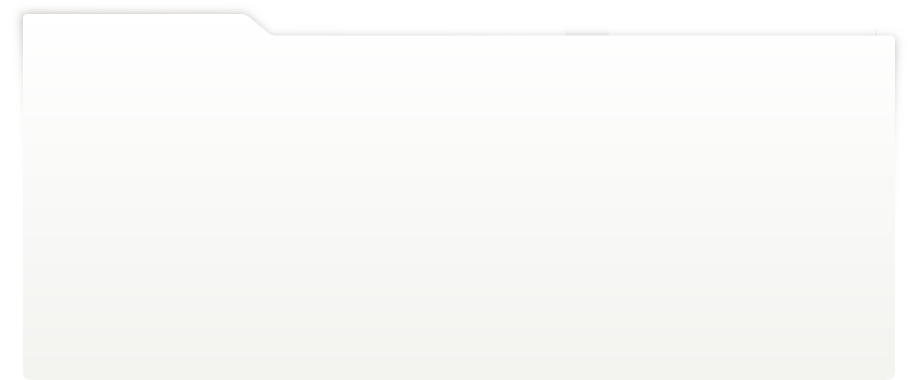
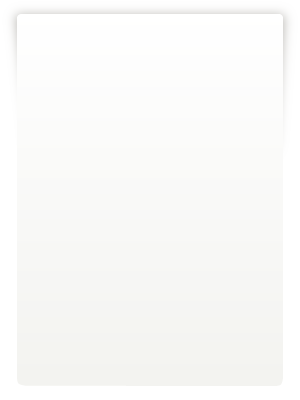
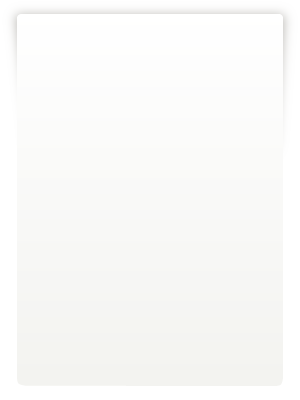
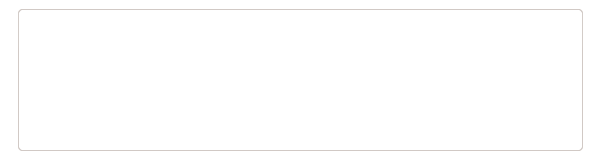
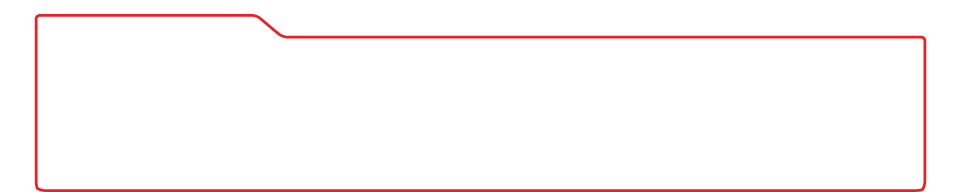
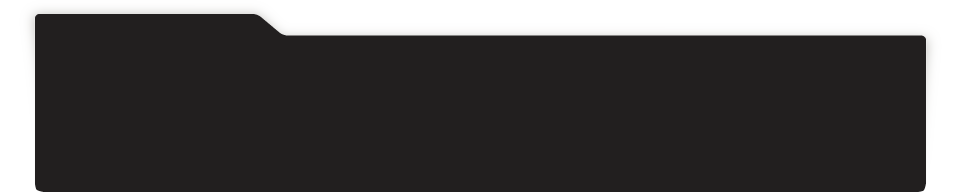
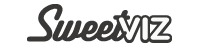
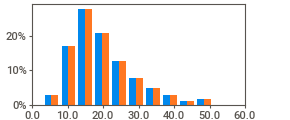
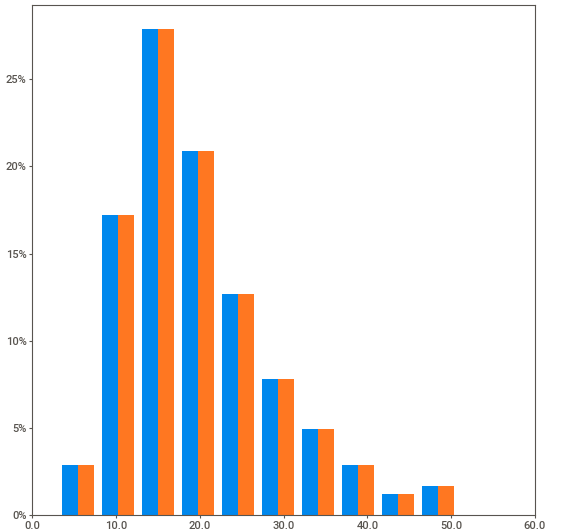
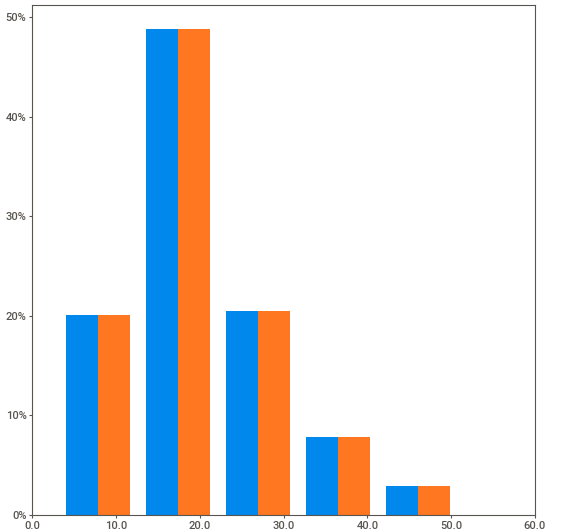
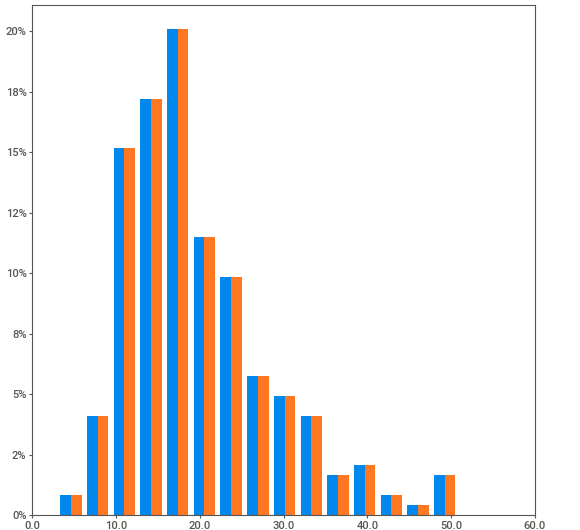
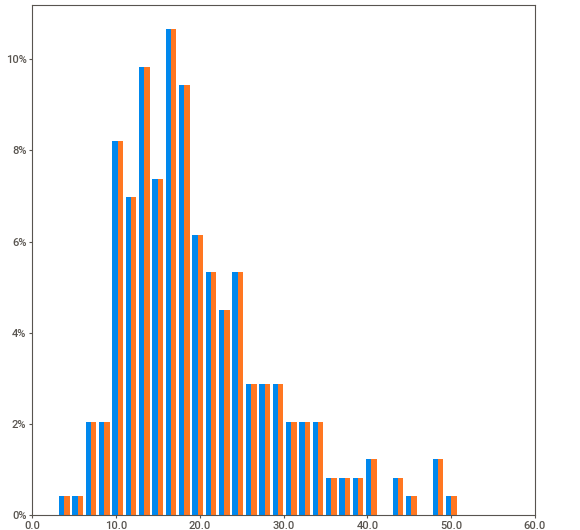
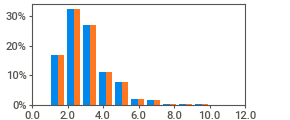
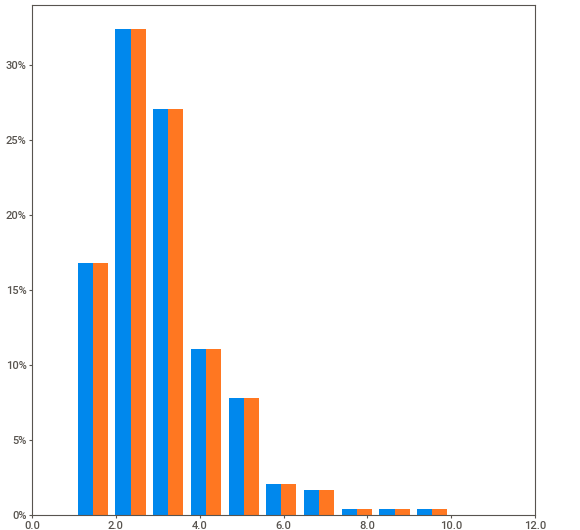
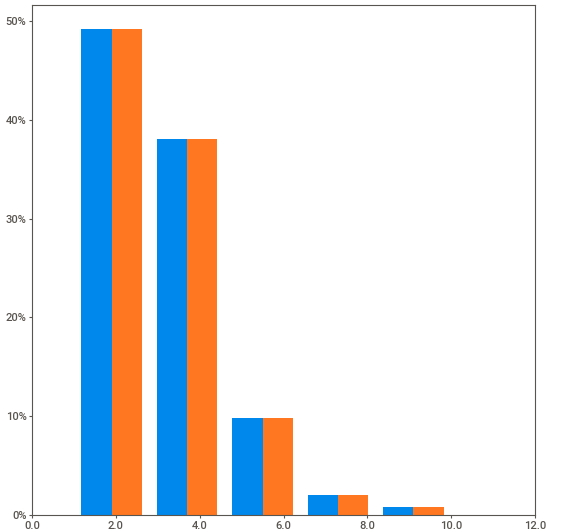
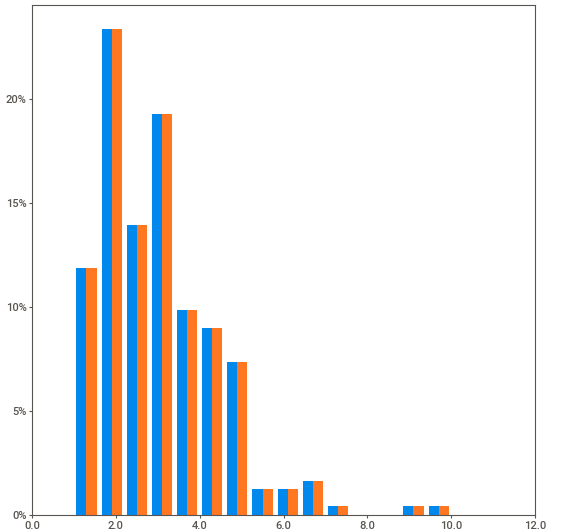
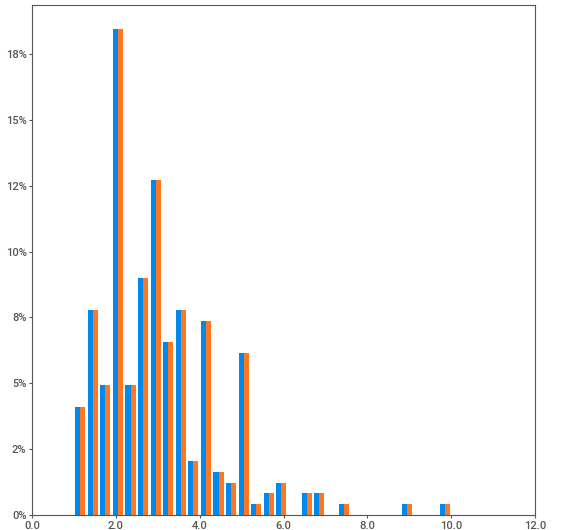
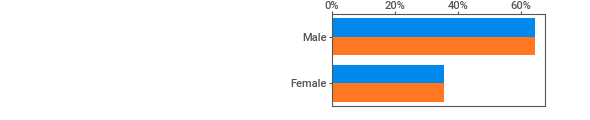
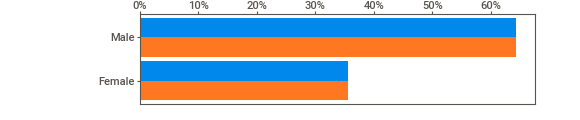
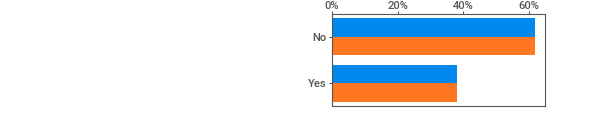
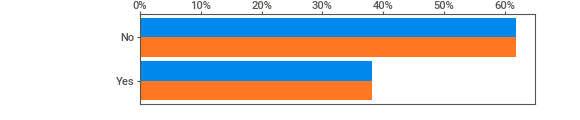
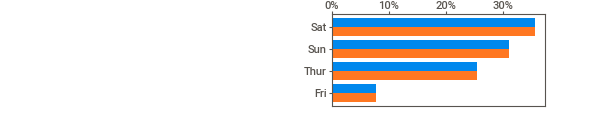
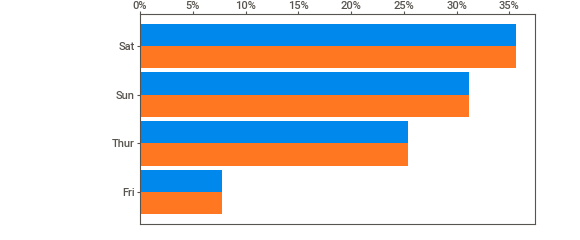
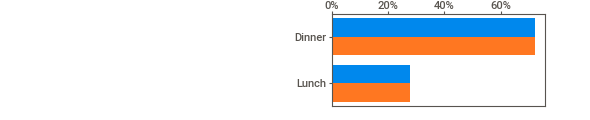
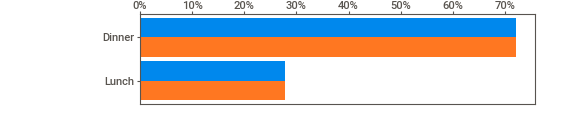
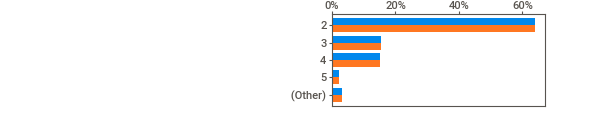
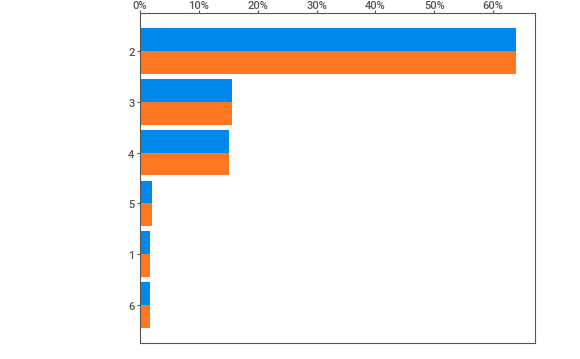
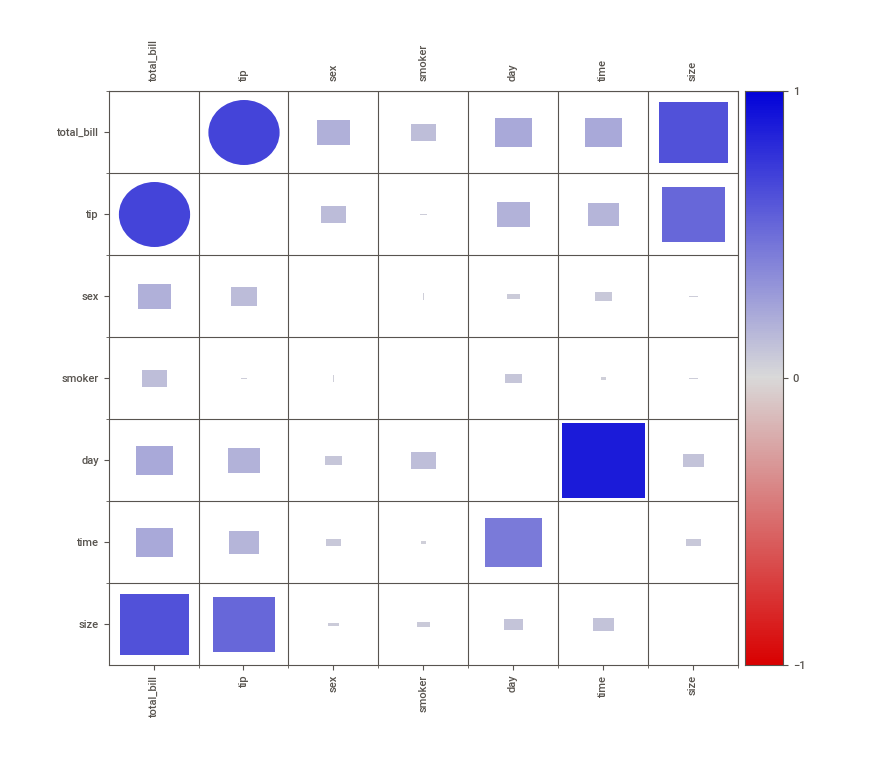
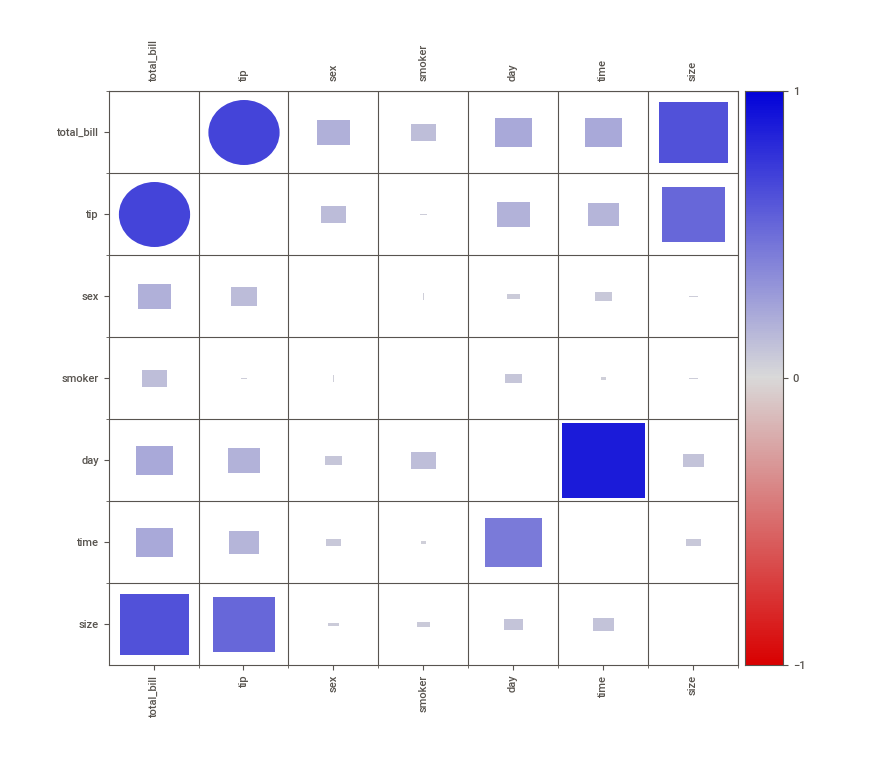

In [ ]:
# Criando report que compara valores pré e pós técnica
report = sv.compare([gorjeta,"Original"],[gorjeta,"Inputado"])
report.show_notebook() 

## 5 - Razões de Ausência de Valores

Existem três categorias do modo que valores ausentes são distribuídos:

* Missing Completely At Random (MCAR): a probabilidade de um valor ausente ocorrer não depende de nenhum valor da base de dados
* Missing At Random (MAR): a probabilidade de um valor ausente ocorrer depende dos valores conhecidos na base de dados
* Missing Not At Random (MNAR): a probabilidade de um valor ausente ocorrer depende do próprio valor ausente

Vamos fazer algumas comparações de aplicação das técnicas de tratamento vistas para essas situações.

### 5.1 - MCAR e MAR

In [ ]:
# Perceba que a base com valores ausentes que utilizamos até agora segue o MCAR, pois sua seleção foi completamente aleatória
# Vamos criar uma base com valores ausentes ao estilo MAR, para isso vamos começar copiando o dataset
gorjeta_NA2 = gorjeta.copy()

In [ ]:
# Agora, vamos definir a função de probabilidade que indique a probabilidade de ser um valor nulo
# Veja que a função vai ser definida com base num parâmetro do dataset, a coluna "smoker"
p = np.ones(len(gorjeta['smoker']))
p[np.where(gorjeta['smoker']=='No')] = 0.5
p = p/sum(p)

In [ ]:
# Amostra selecionada com base na função de probabilidade definida acima
amostra = np.random.choice(list(gorjeta_NA2.index),int(len(gorjeta)*0.2), p = p)

                                             |          | [  0%]   00:00 -> (? left)


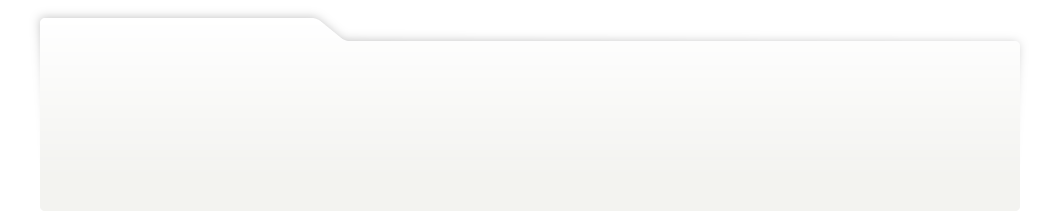
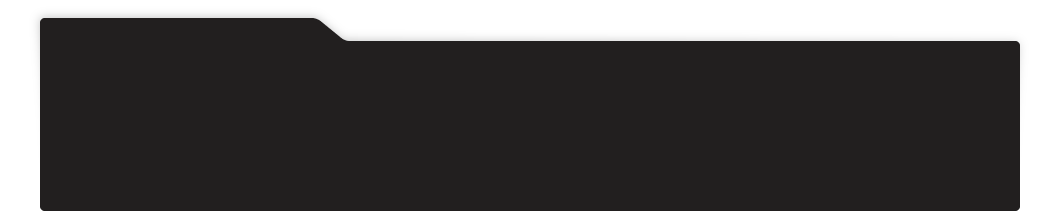
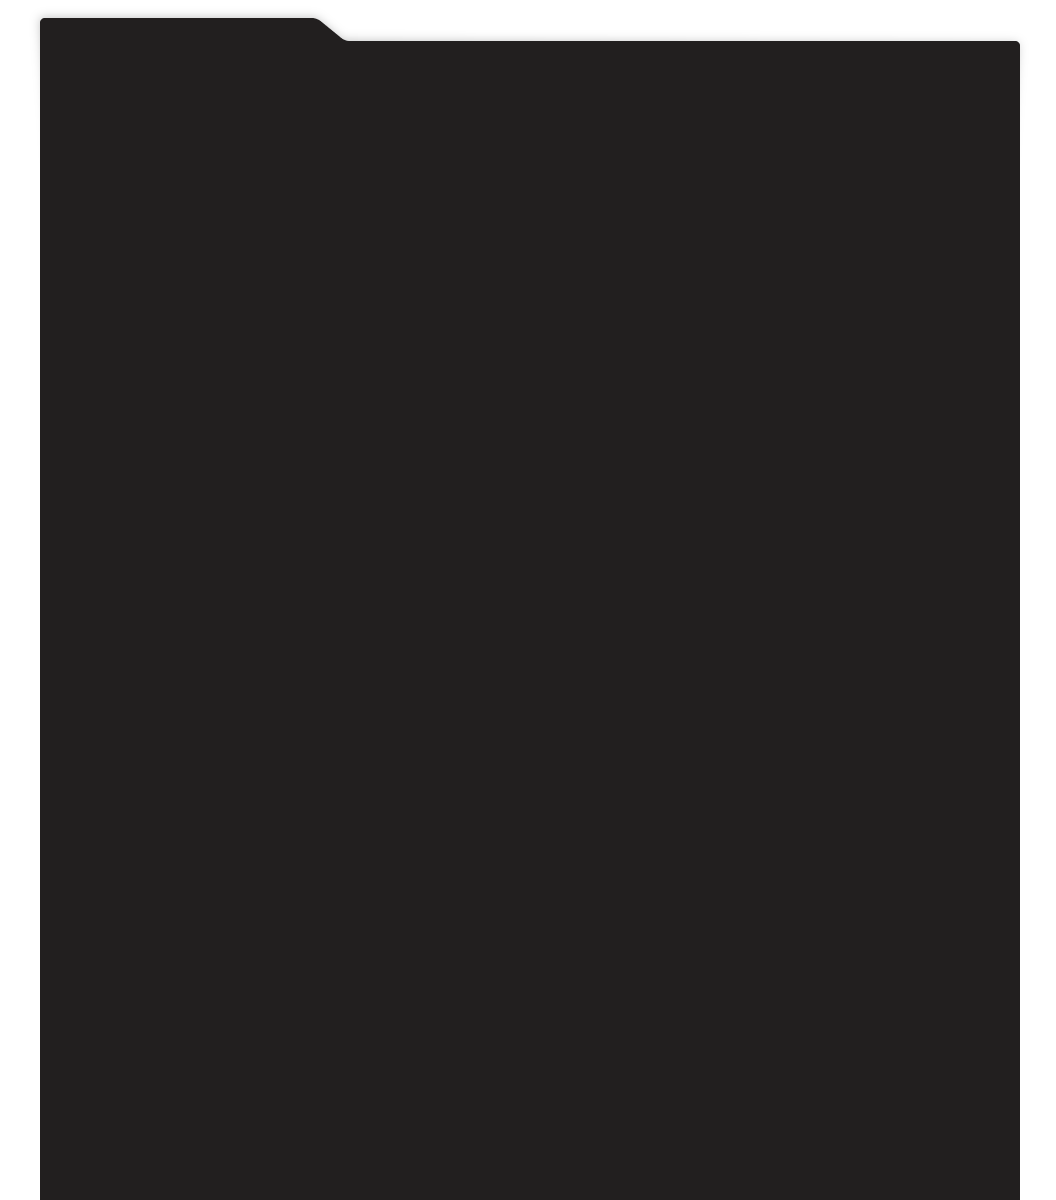
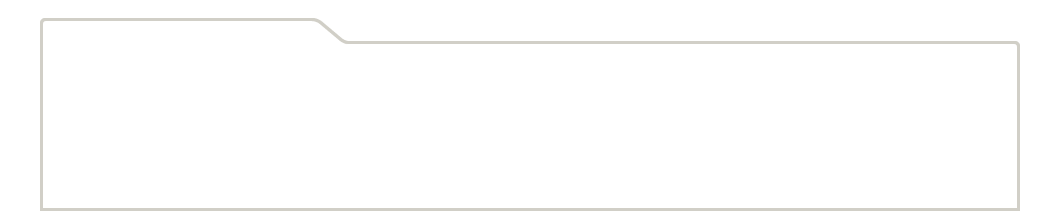
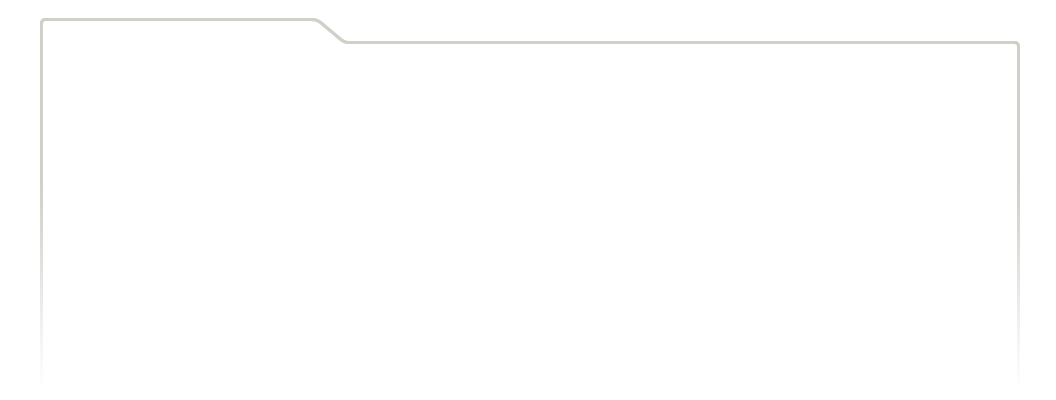
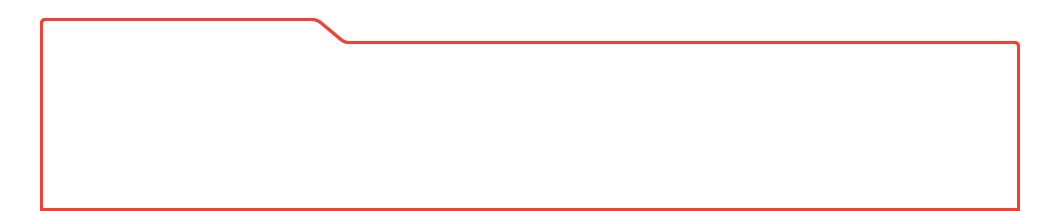
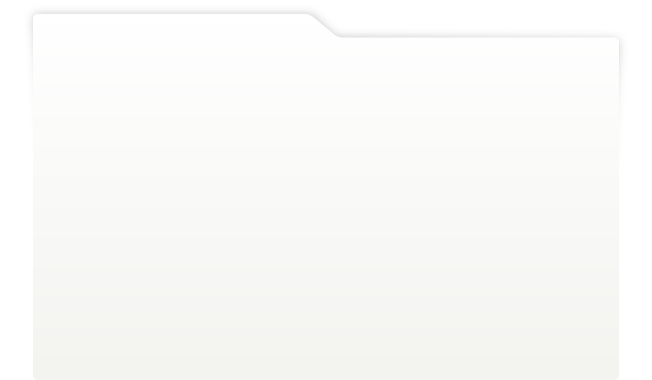
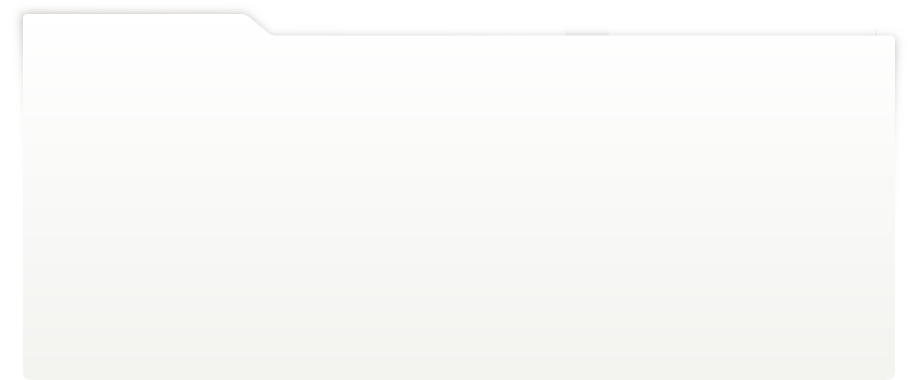
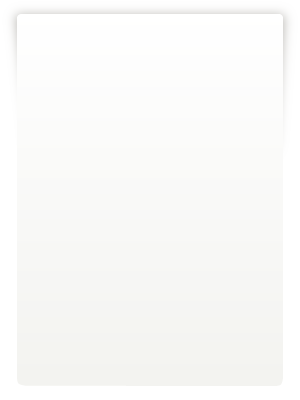
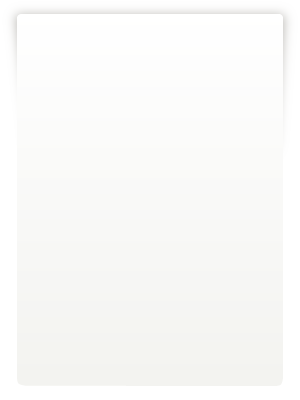
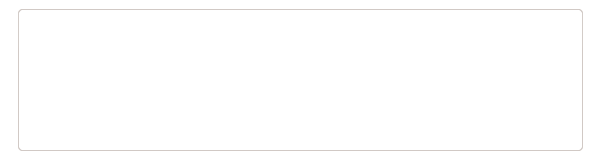
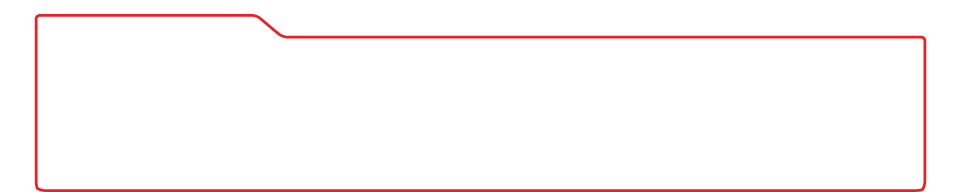
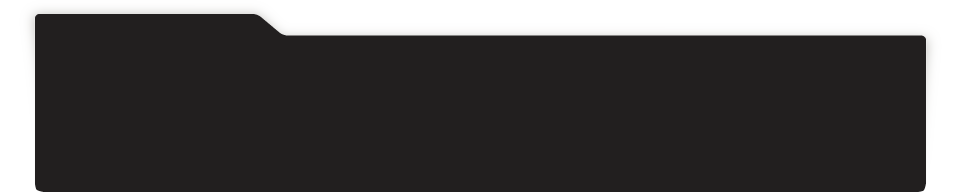
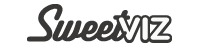
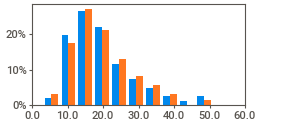
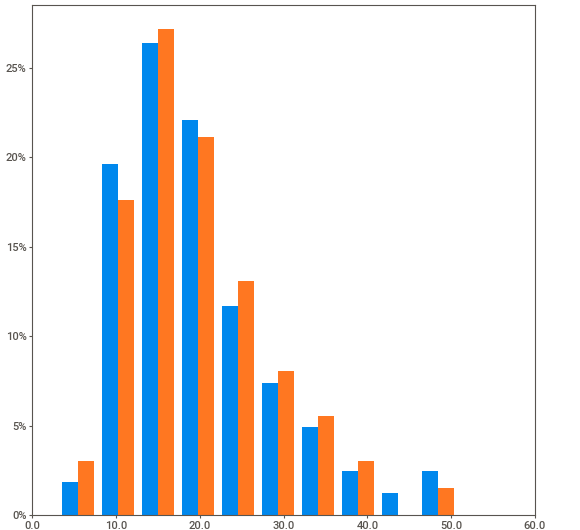
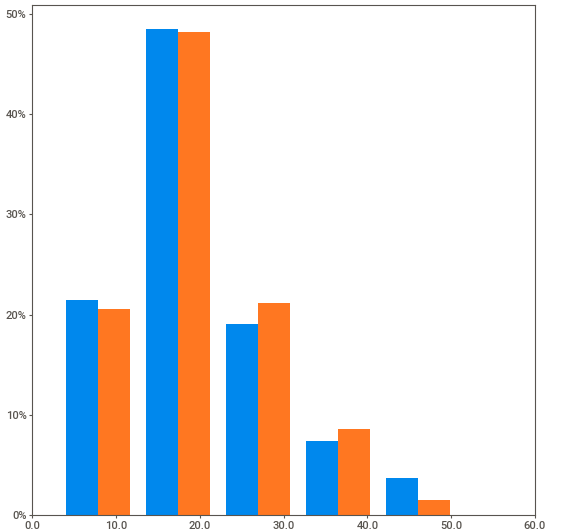
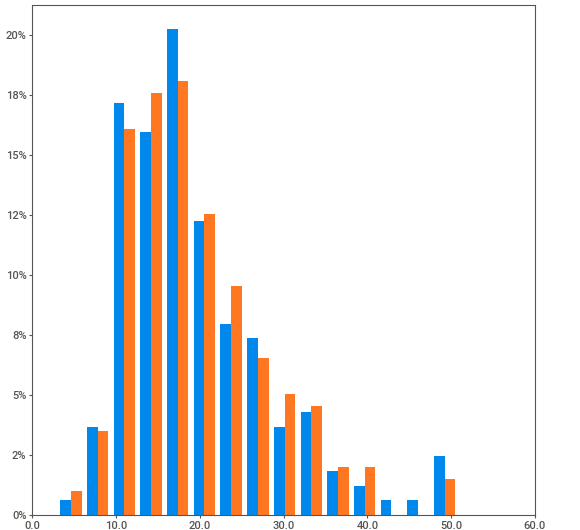
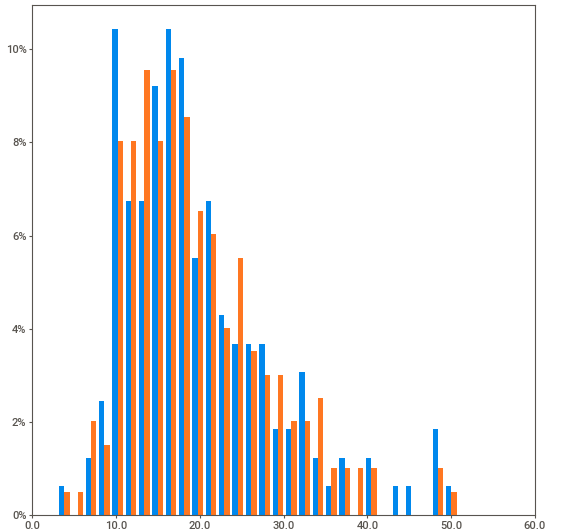
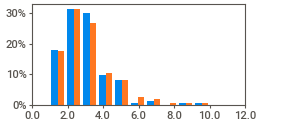
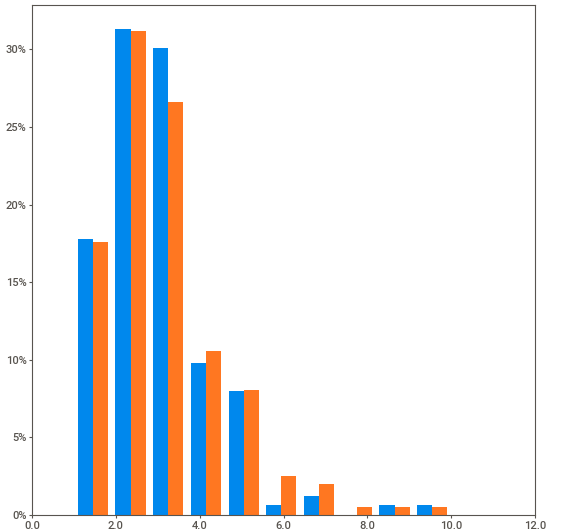
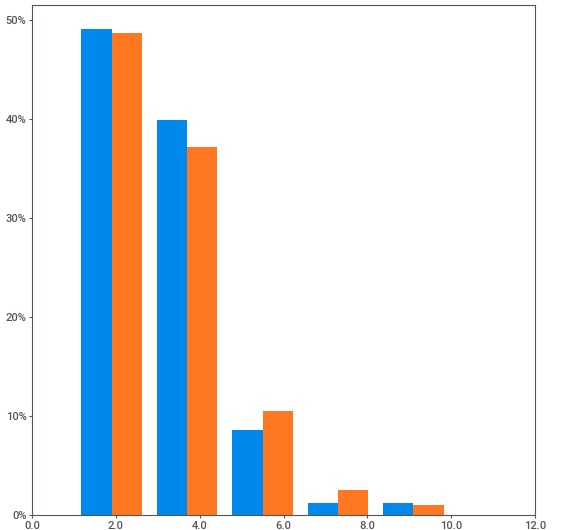
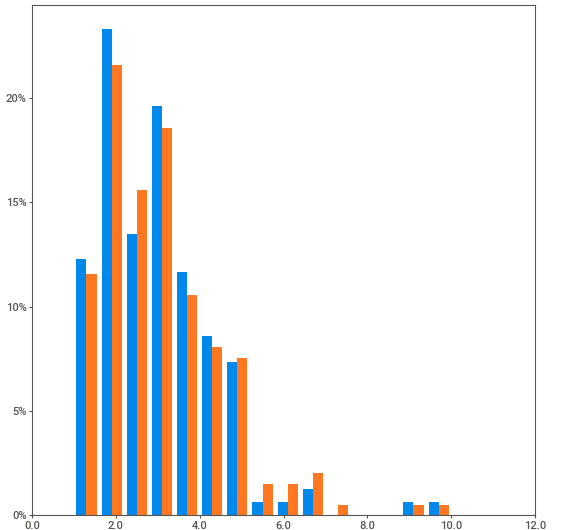
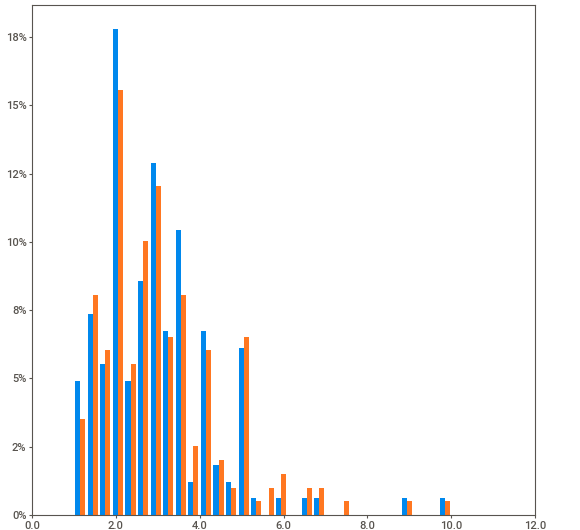
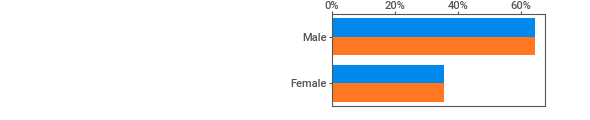
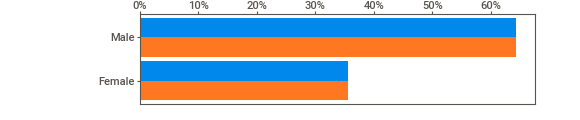
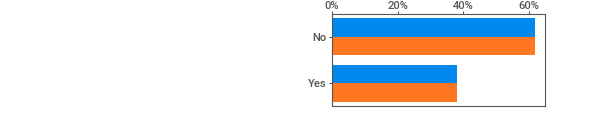
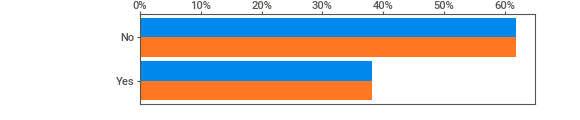
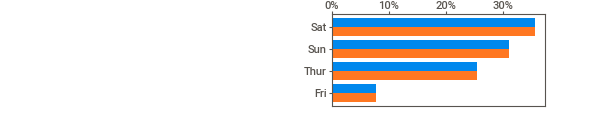
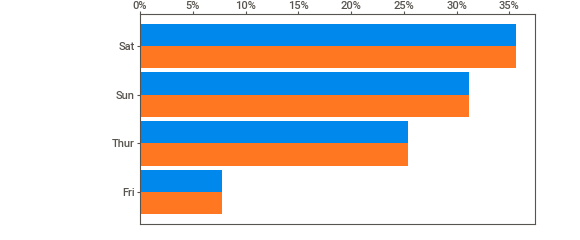
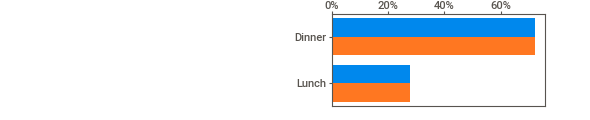
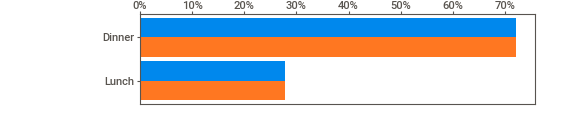
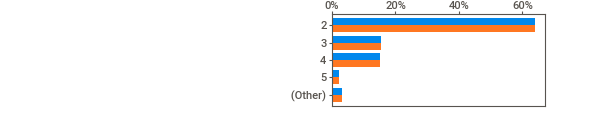
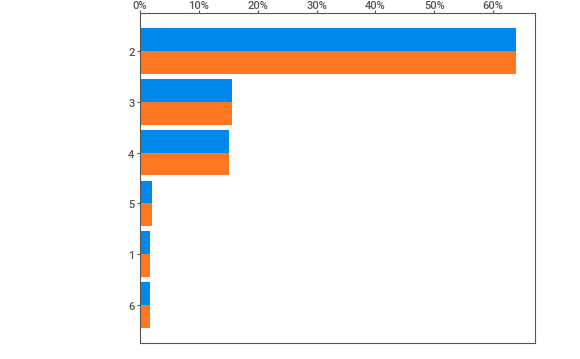
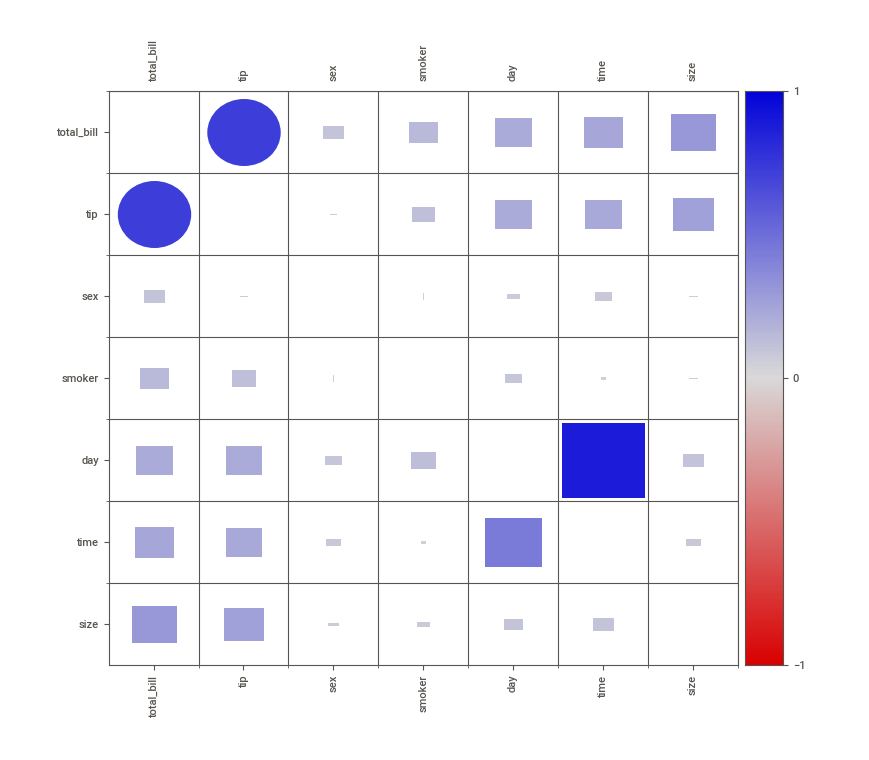
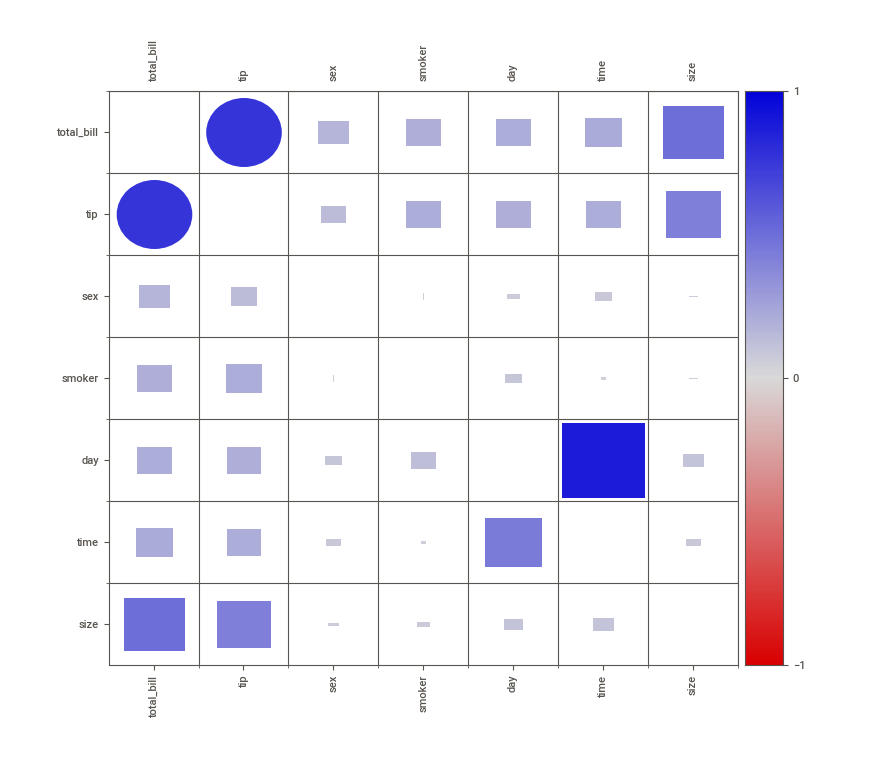

In [ ]:
# Comparação de bases com valores nulos que possuem distribuições MCAR e MAR
gorjeta_NA2.loc[amostra,['total_bill','tip']] = np.nan
report = sv.compare([gorjeta_NA,"MCAR"],[gorjeta_NA2,"MAR"])
report.show_notebook() 

                                             |          | [  0%]   00:00 -> (? left)


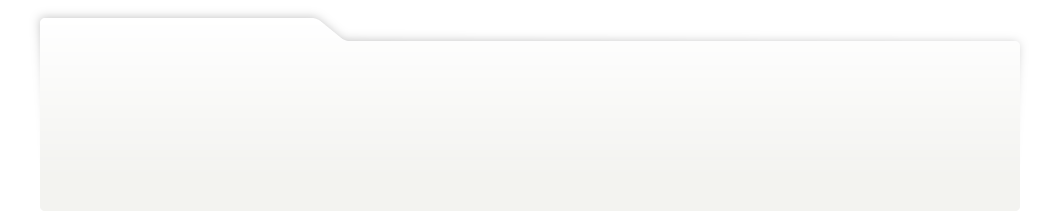
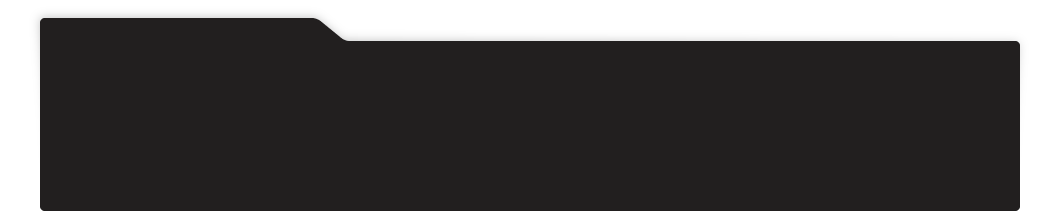
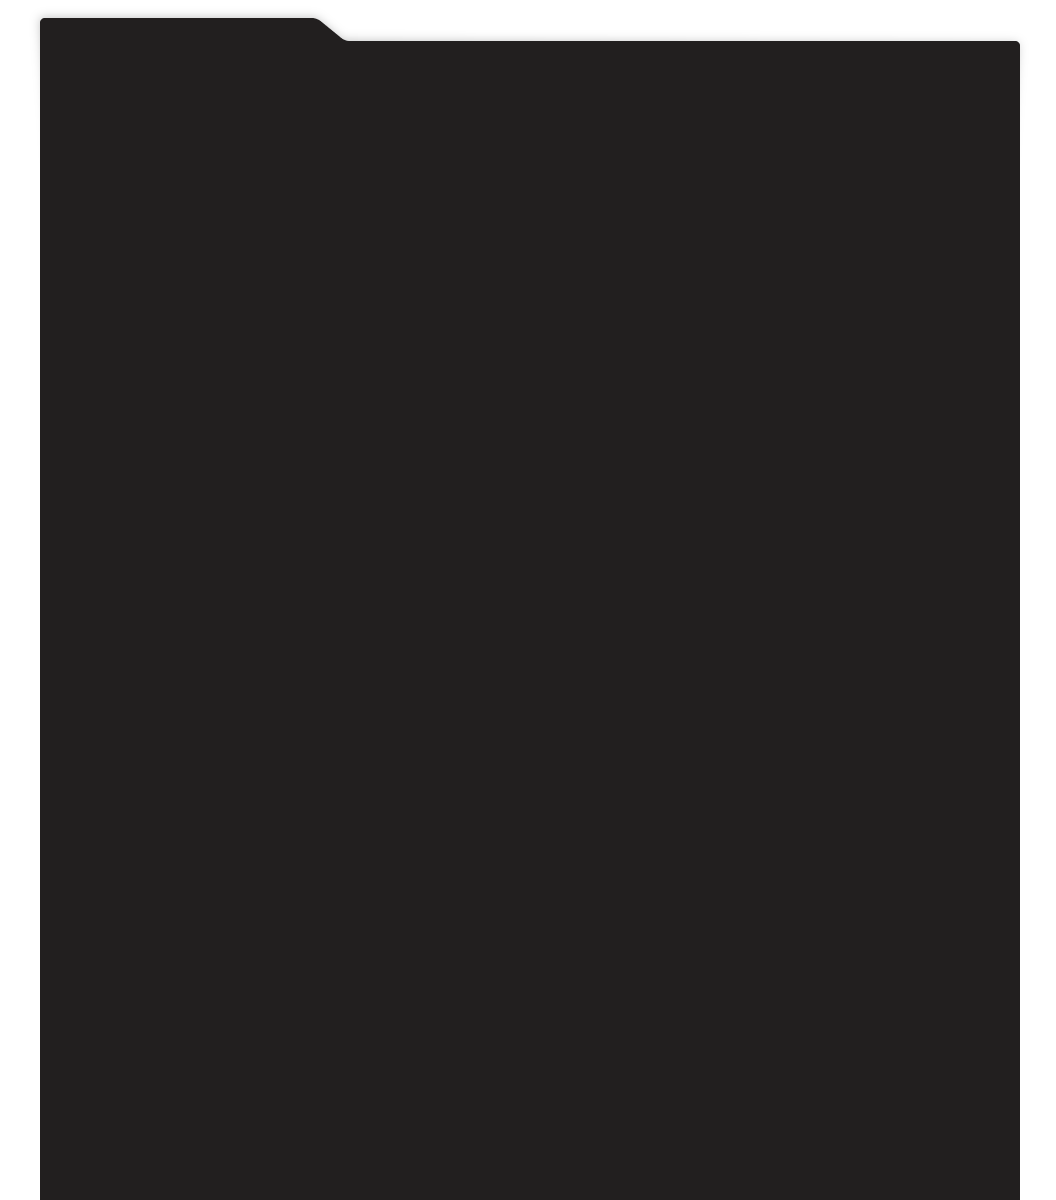
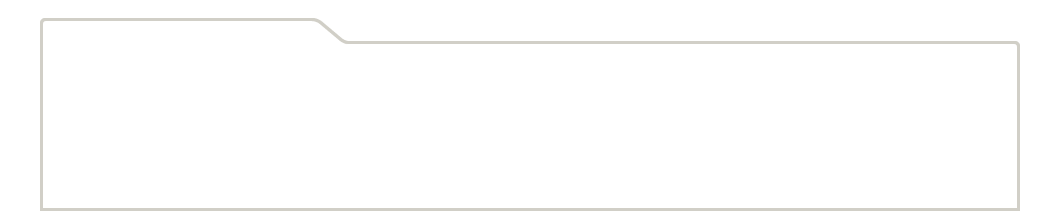
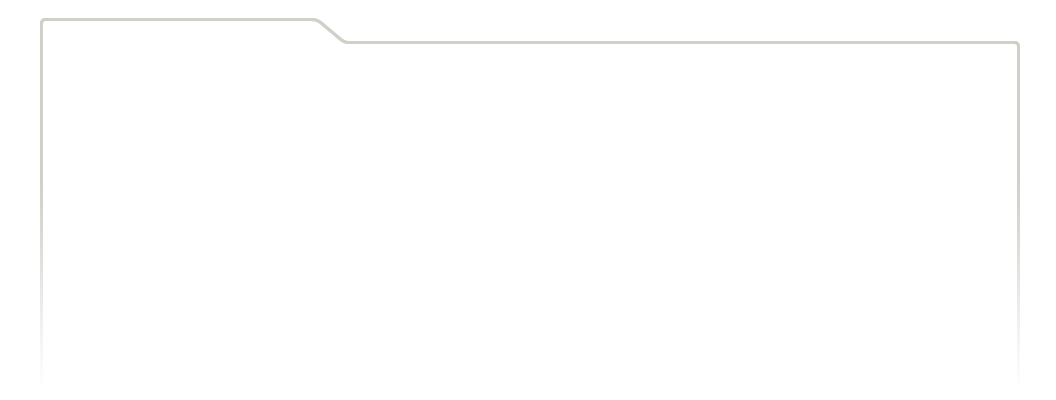
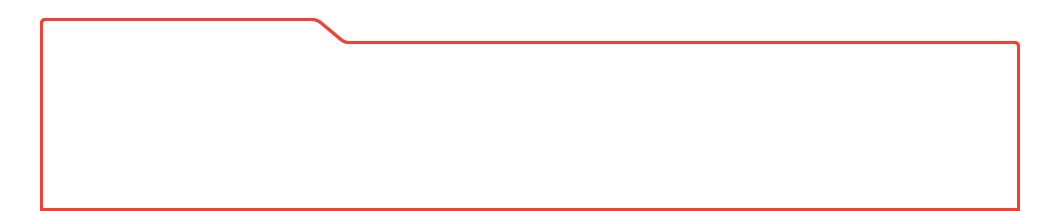
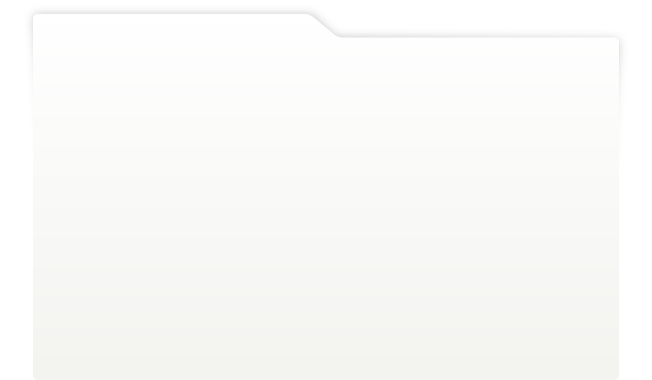
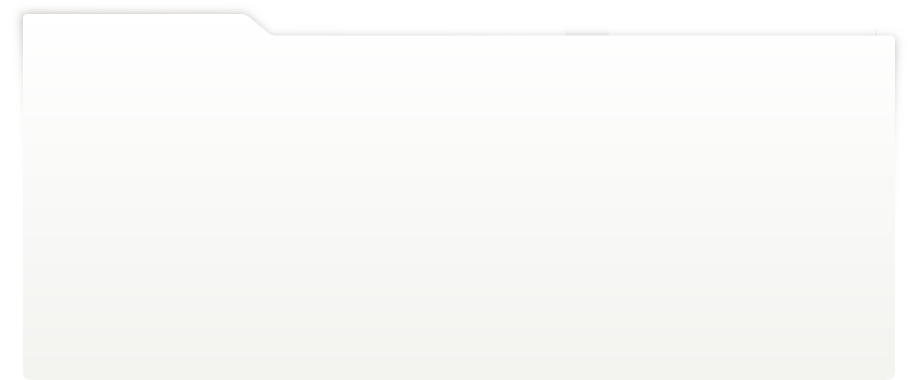
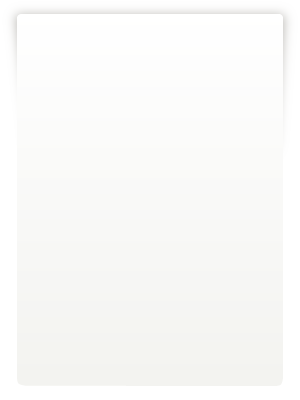
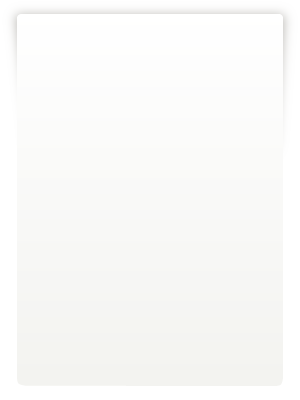
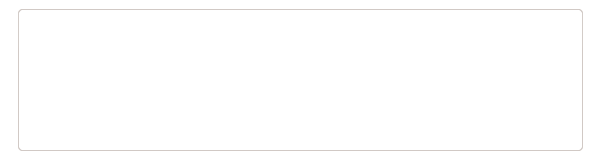
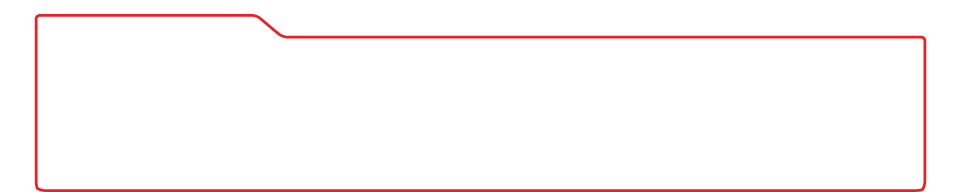
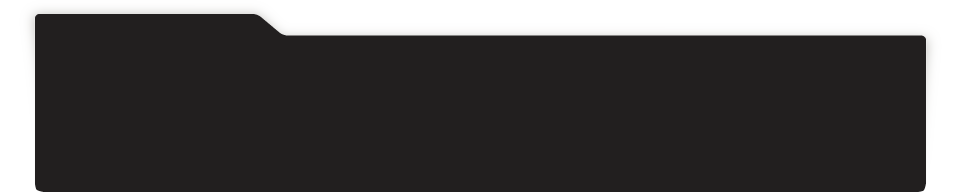
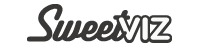
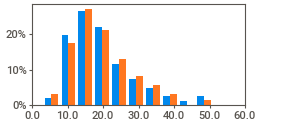
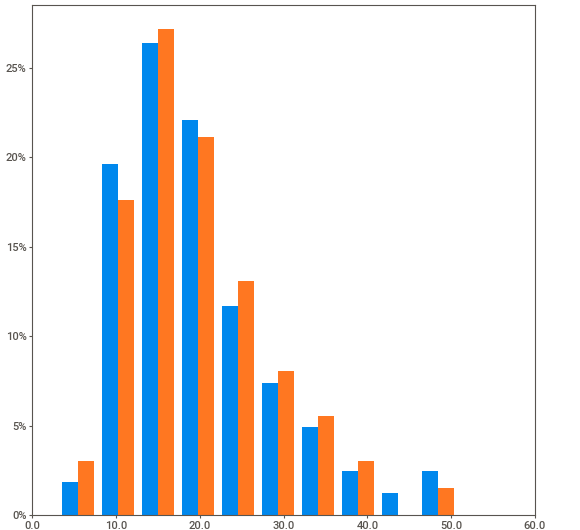
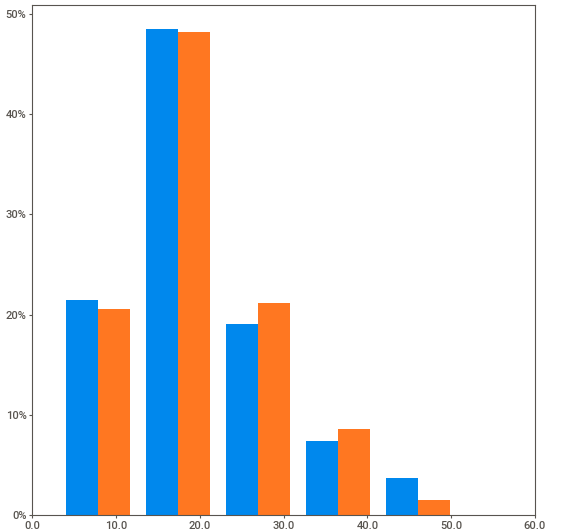
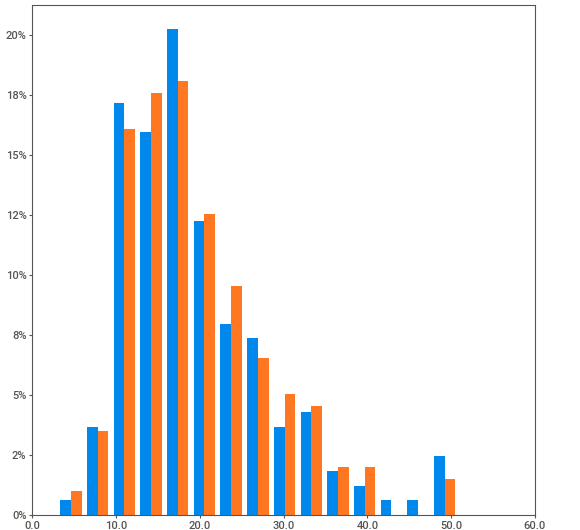
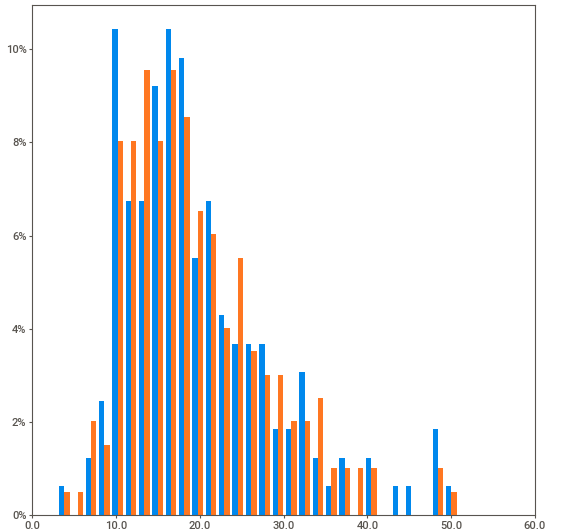
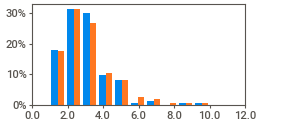
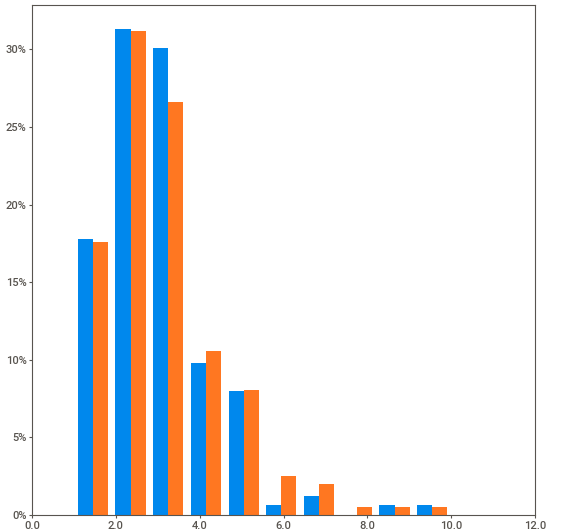
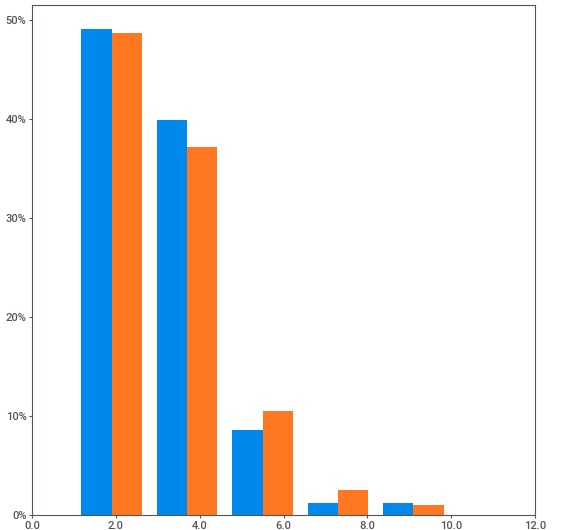
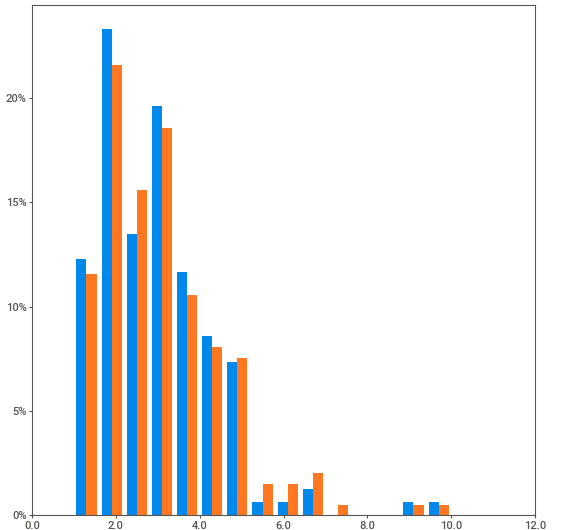
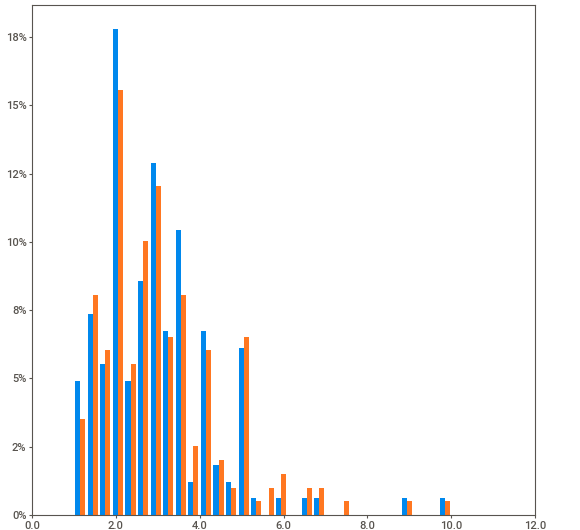
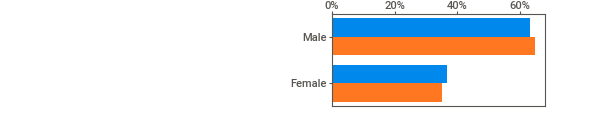
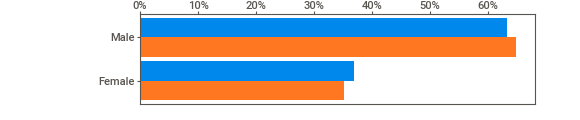
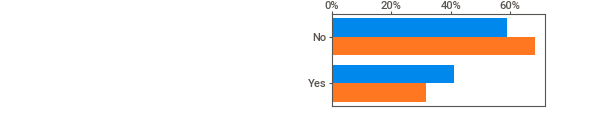
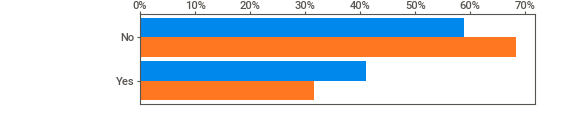
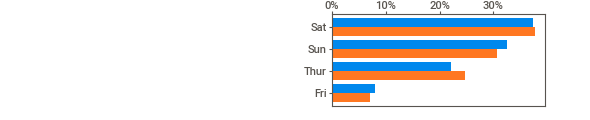
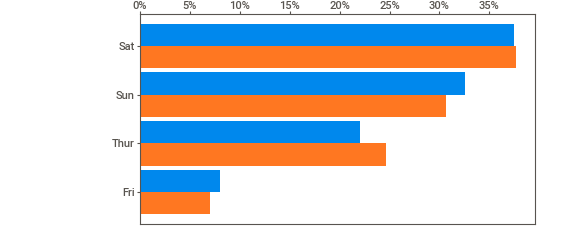
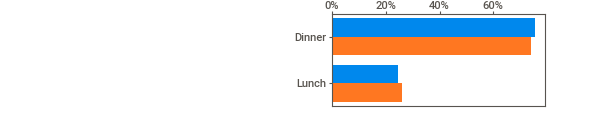
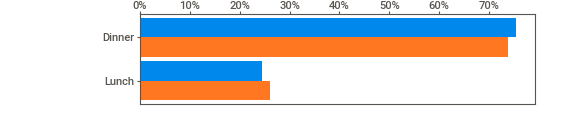
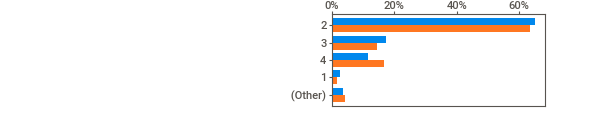
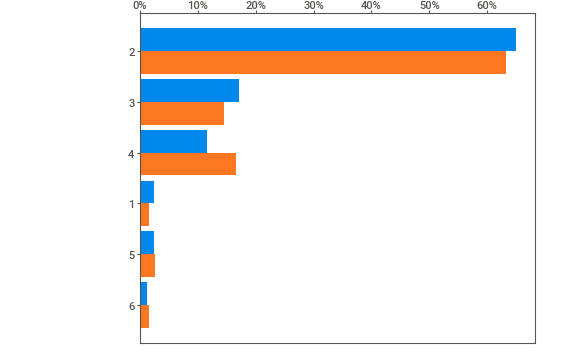
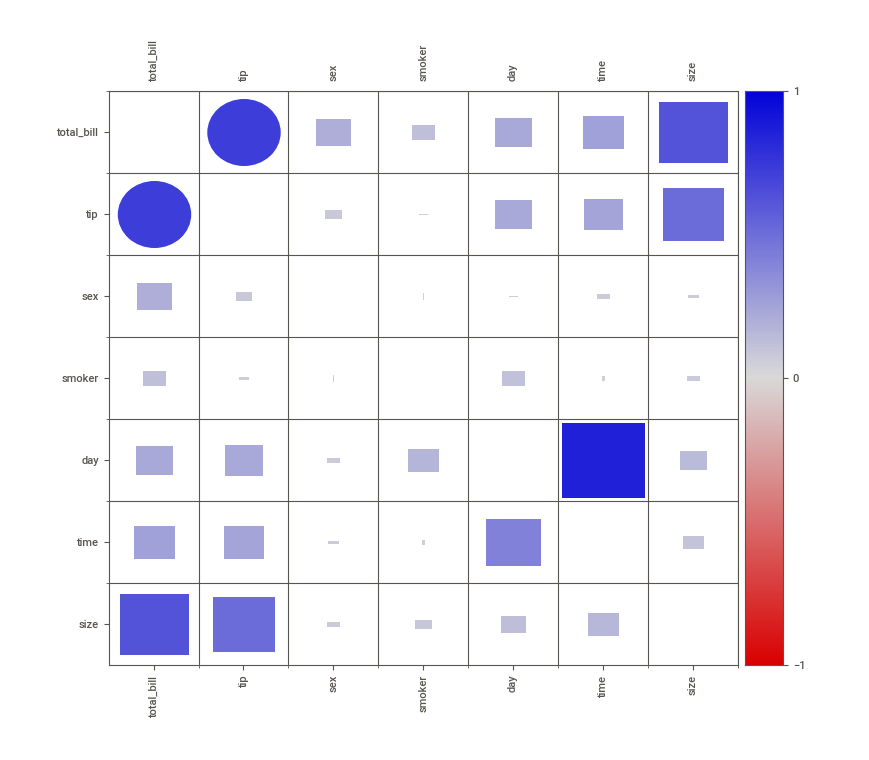
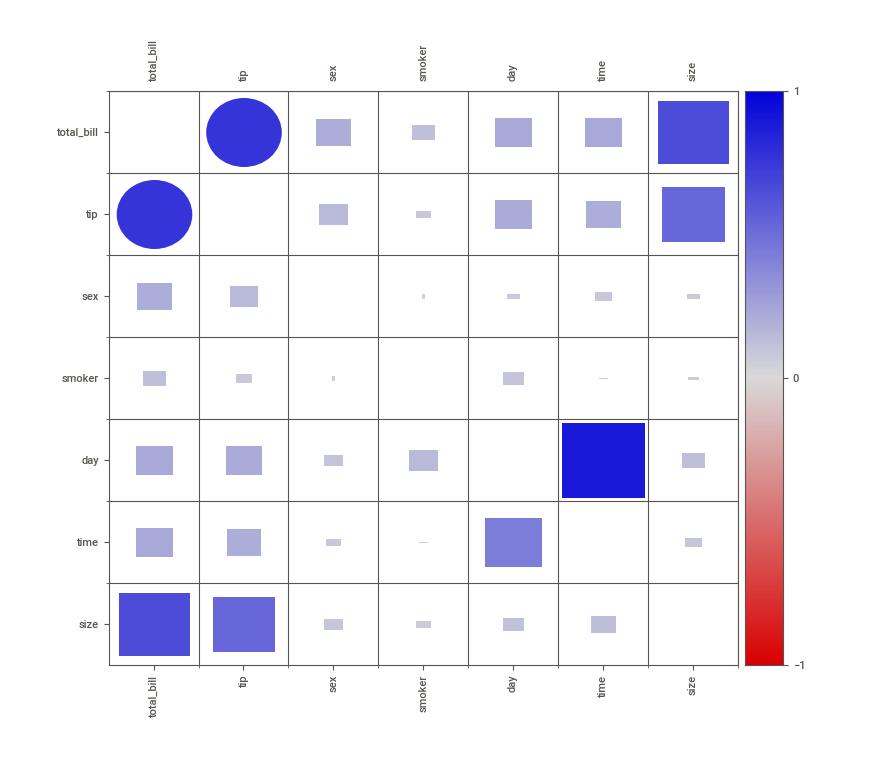

In [ ]:
# Comparação de remoção dos valores ausentes no MCAR e no MAR
gorjeta_removido2 = gorjeta_NA2.dropna()
report = sv.compare([gorjeta_removido,"MCAR"],[gorjeta_removido2,"MAR"])
report.show_notebook() 

                                             |          | [  0%]   00:00 -> (? left)


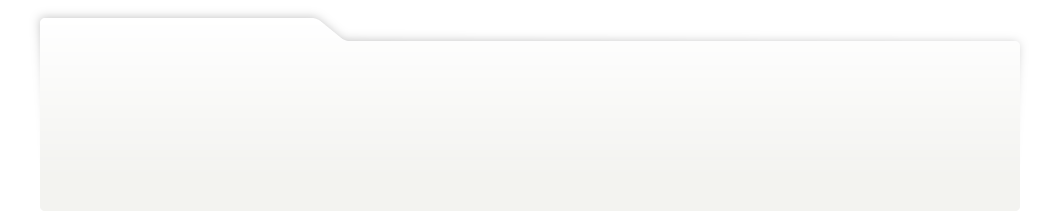
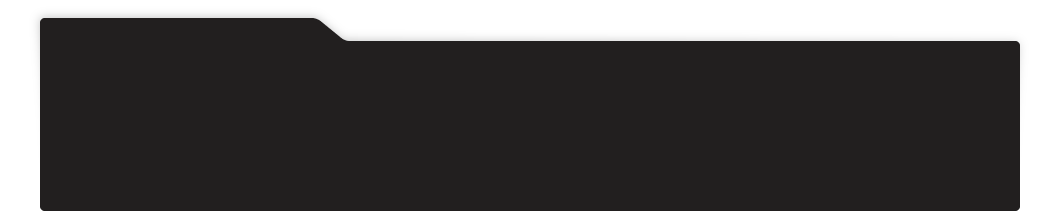
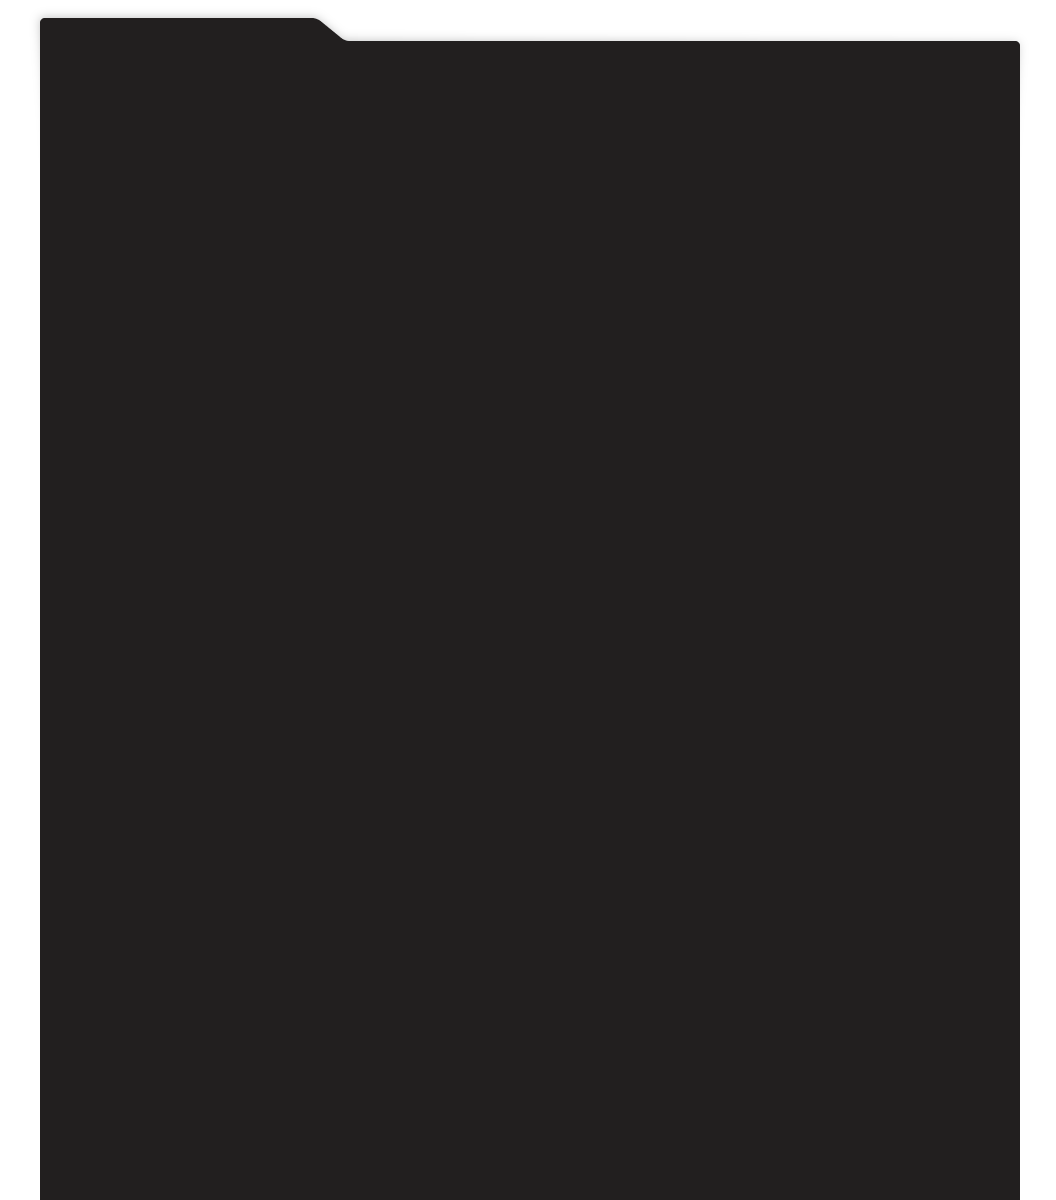
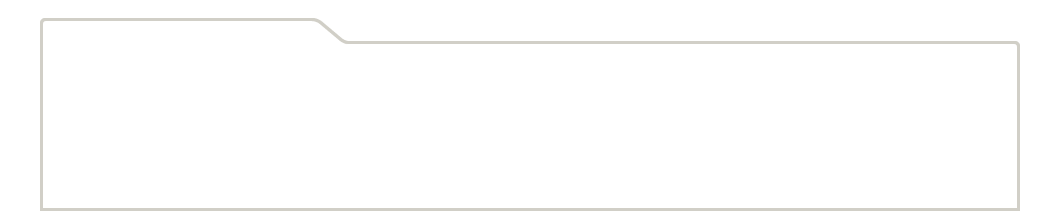
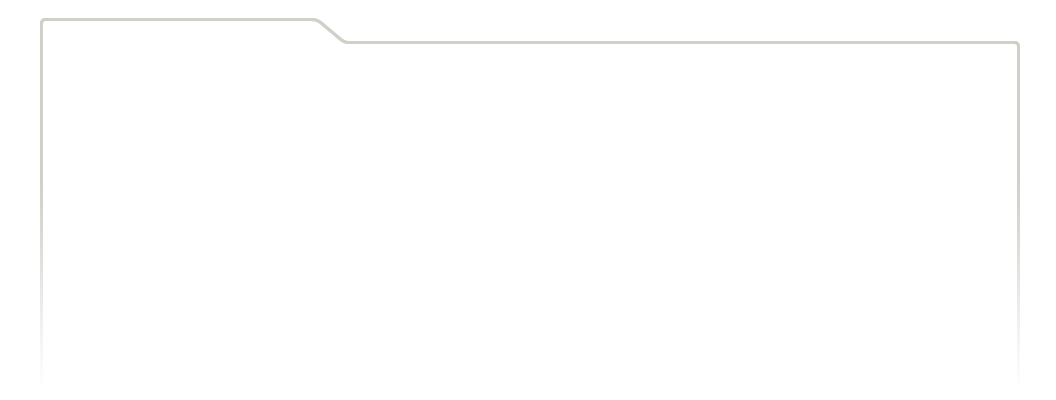
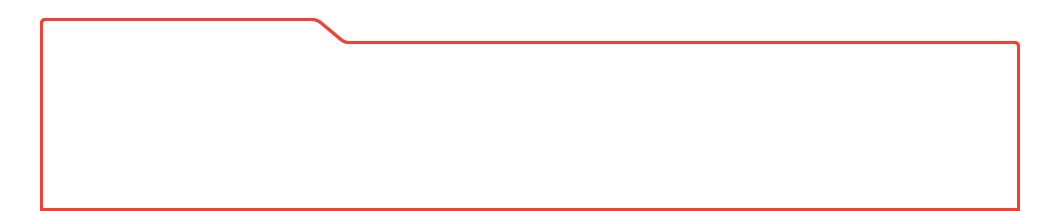
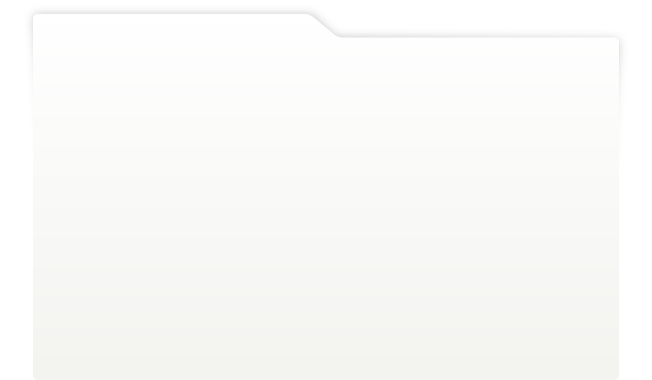
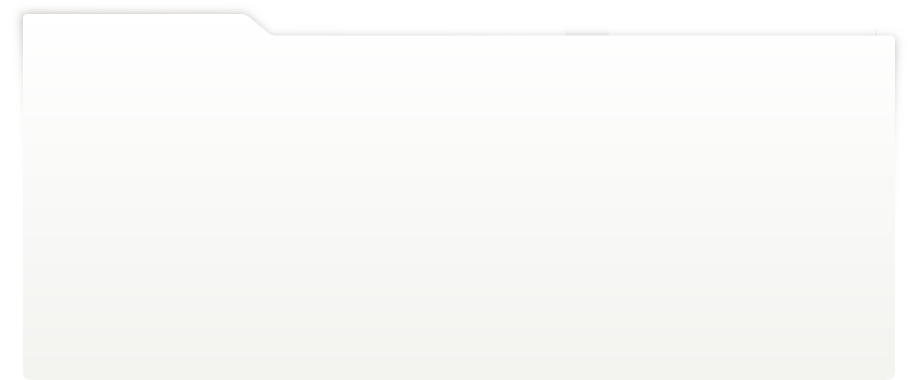
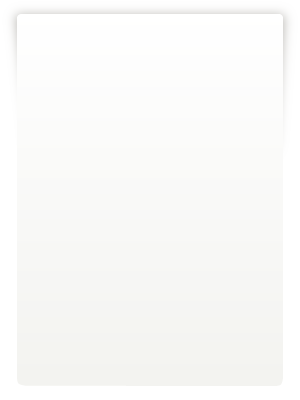
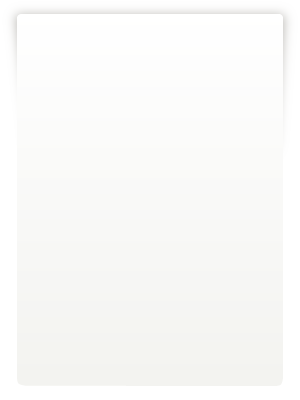
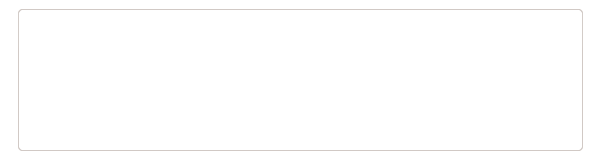
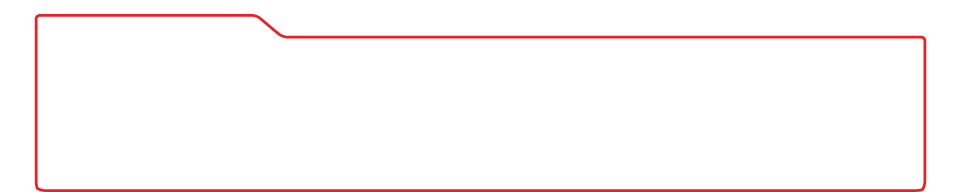
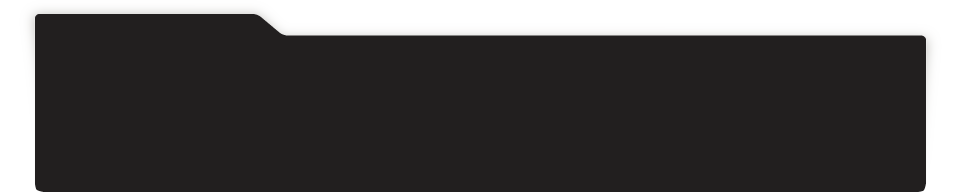
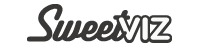
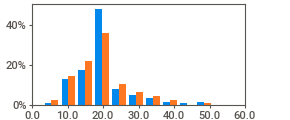
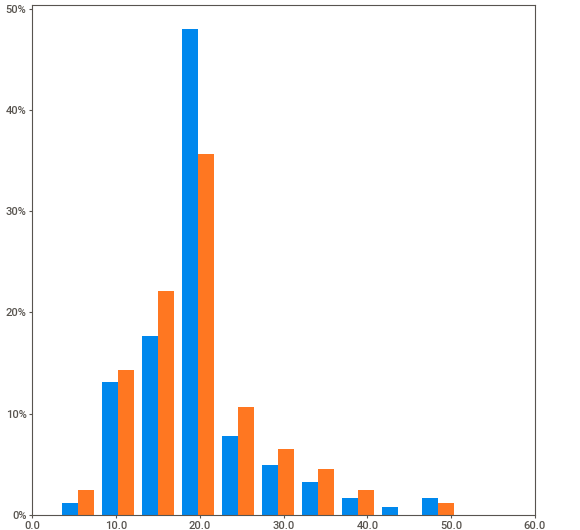
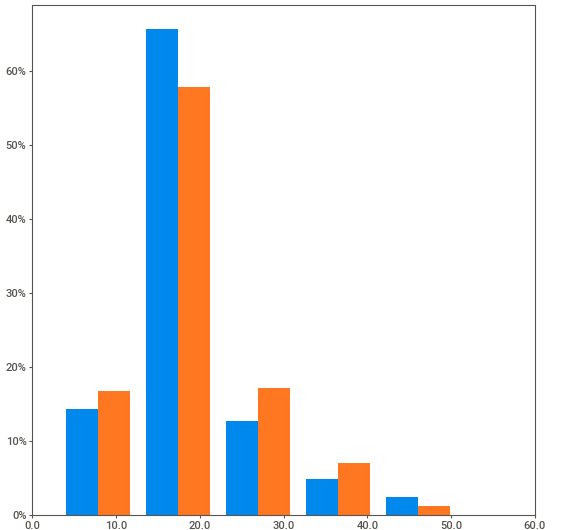
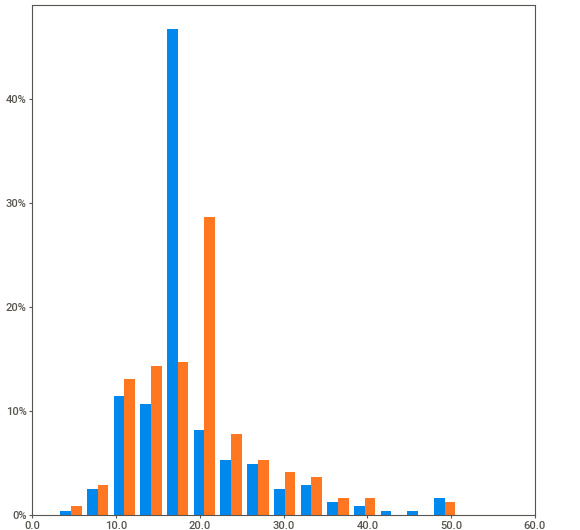
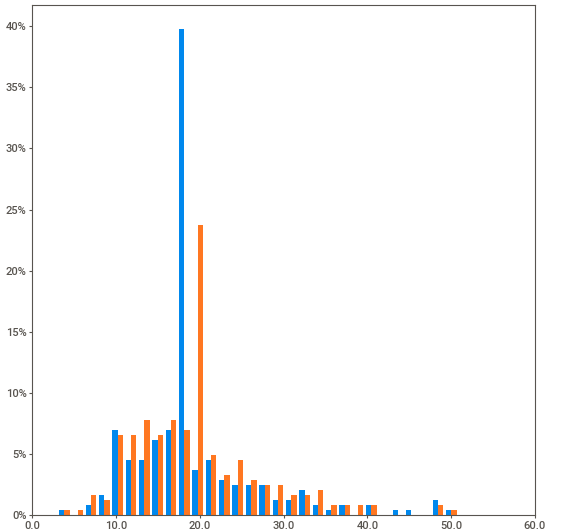
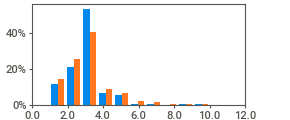
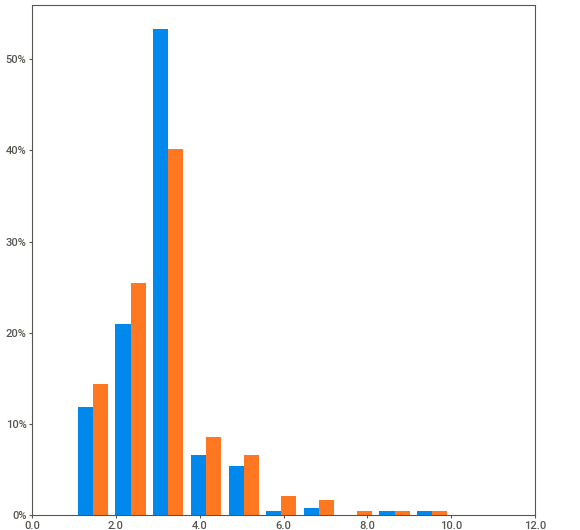
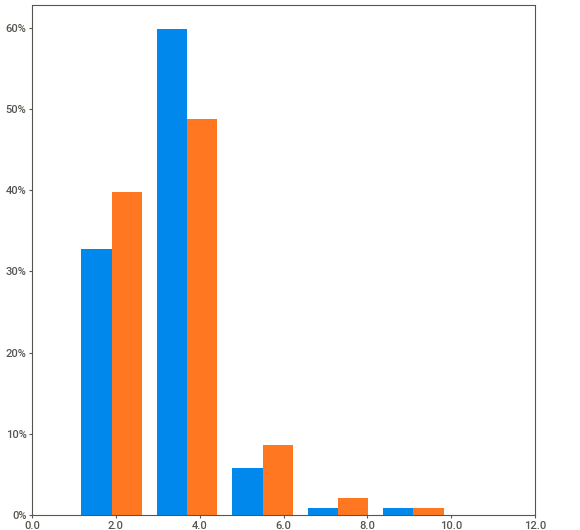
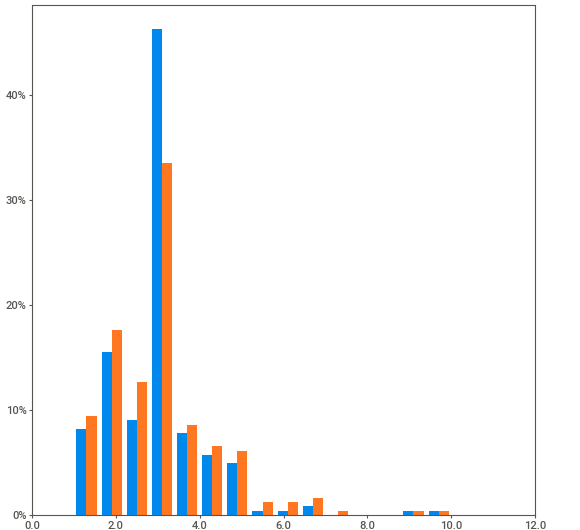
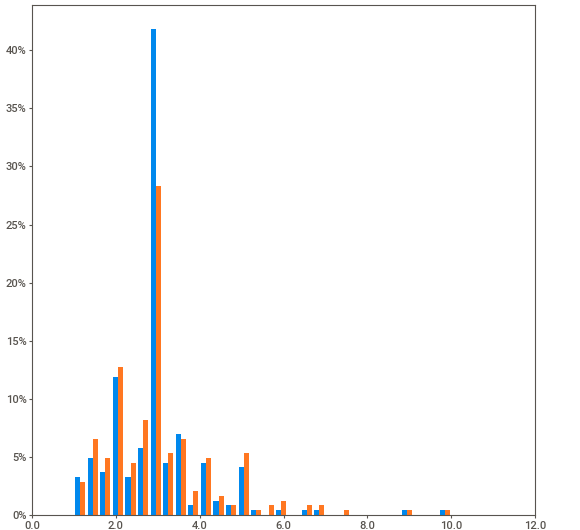
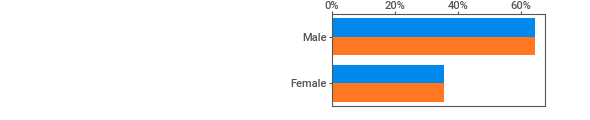
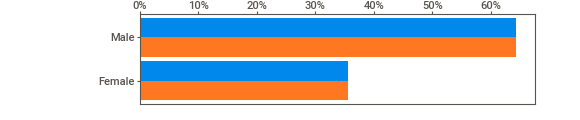
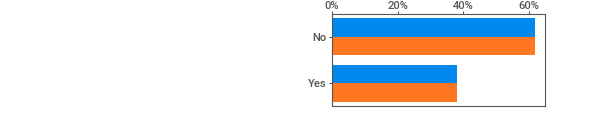
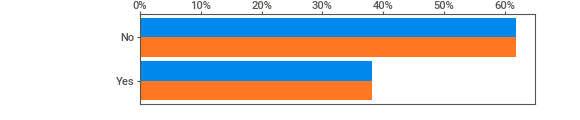
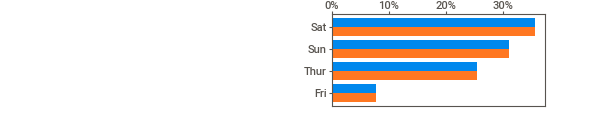
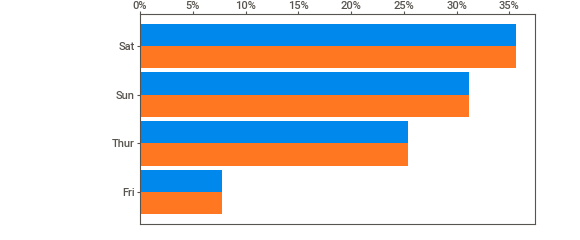
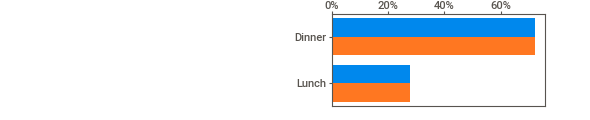
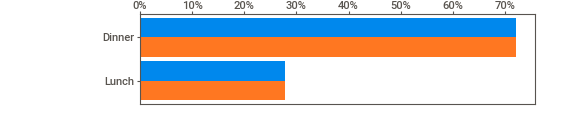
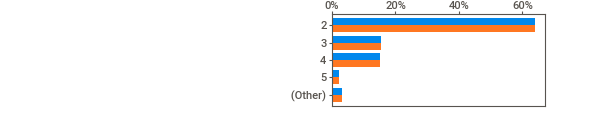
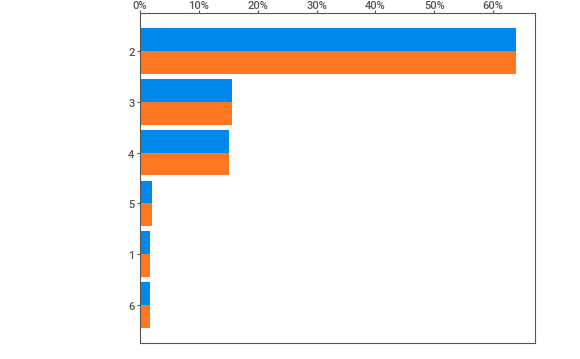
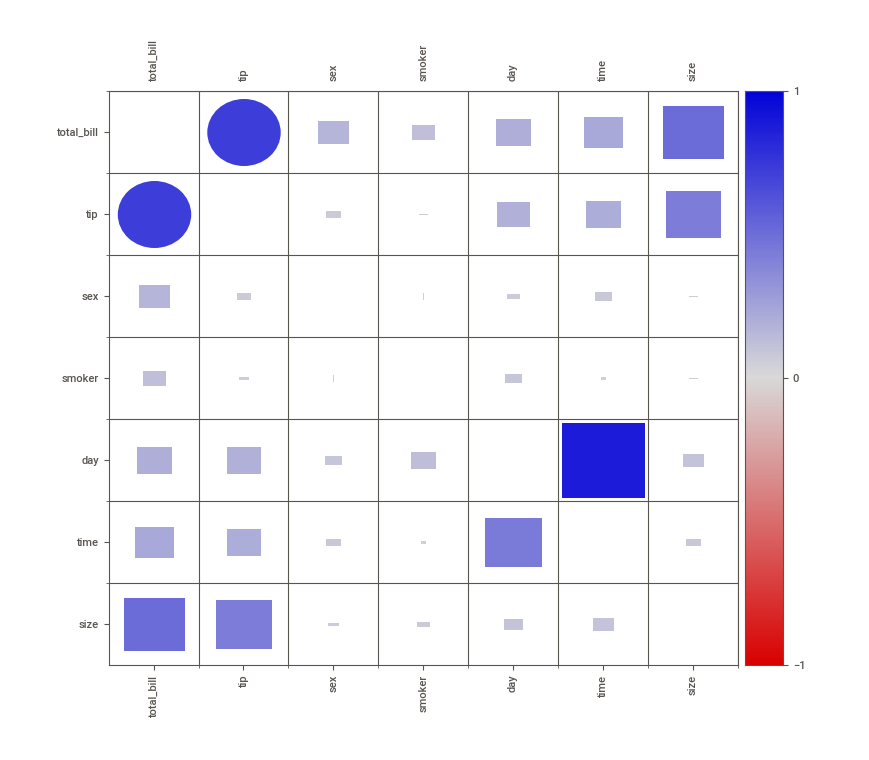
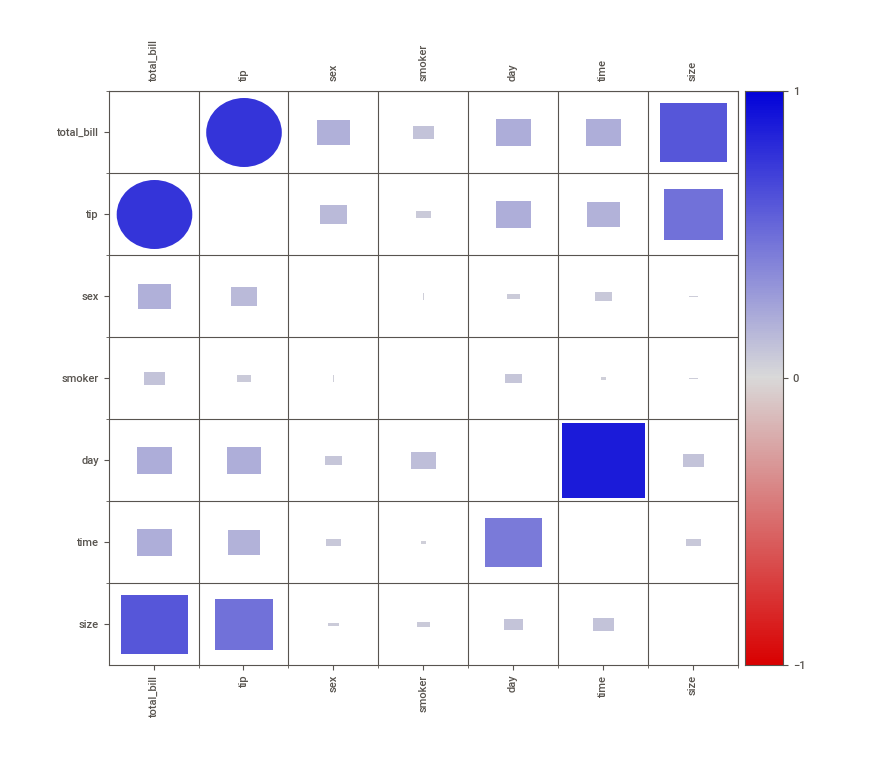

In [ ]:
# Comparação de substituição por média no MCAR e no MAR
gorjeta_input2 = gorjeta_NA2.fillna(gorjeta_NA2.mean())
report = sv.compare([gorjeta_input,"MCAR"],[gorjeta_input2,"MAR"])
report.show_notebook() 

### 5.2 - MCAR e MNAR

In [ ]:
# Definindo função da MNAR
p = gorjeta['tip']/gorjeta['tip'].sum()

In [ ]:
# Copiando dataset
gorjeta_NA3 = gorjeta.copy()

In [ ]:
# Removendo valores no dataset com base na função de probabilidade
amostra = np.random.choice(list(gorjeta_NA3.index),int(len(gorjeta)*0.2), p = p)
gorjeta_NA3.loc[amostra,['total_bill','tip']] = np.nan

                                             |          | [  0%]   00:00 -> (? left)


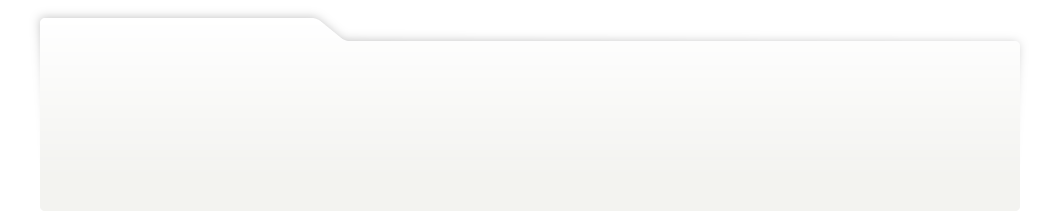
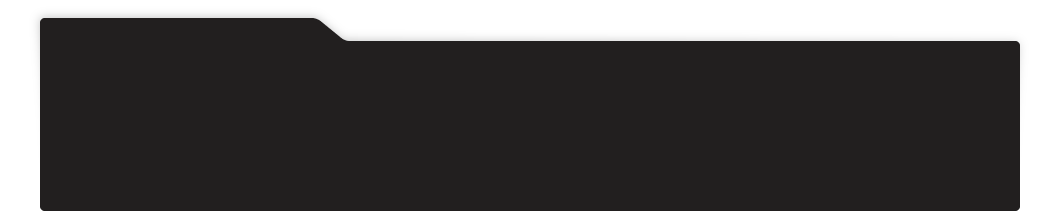
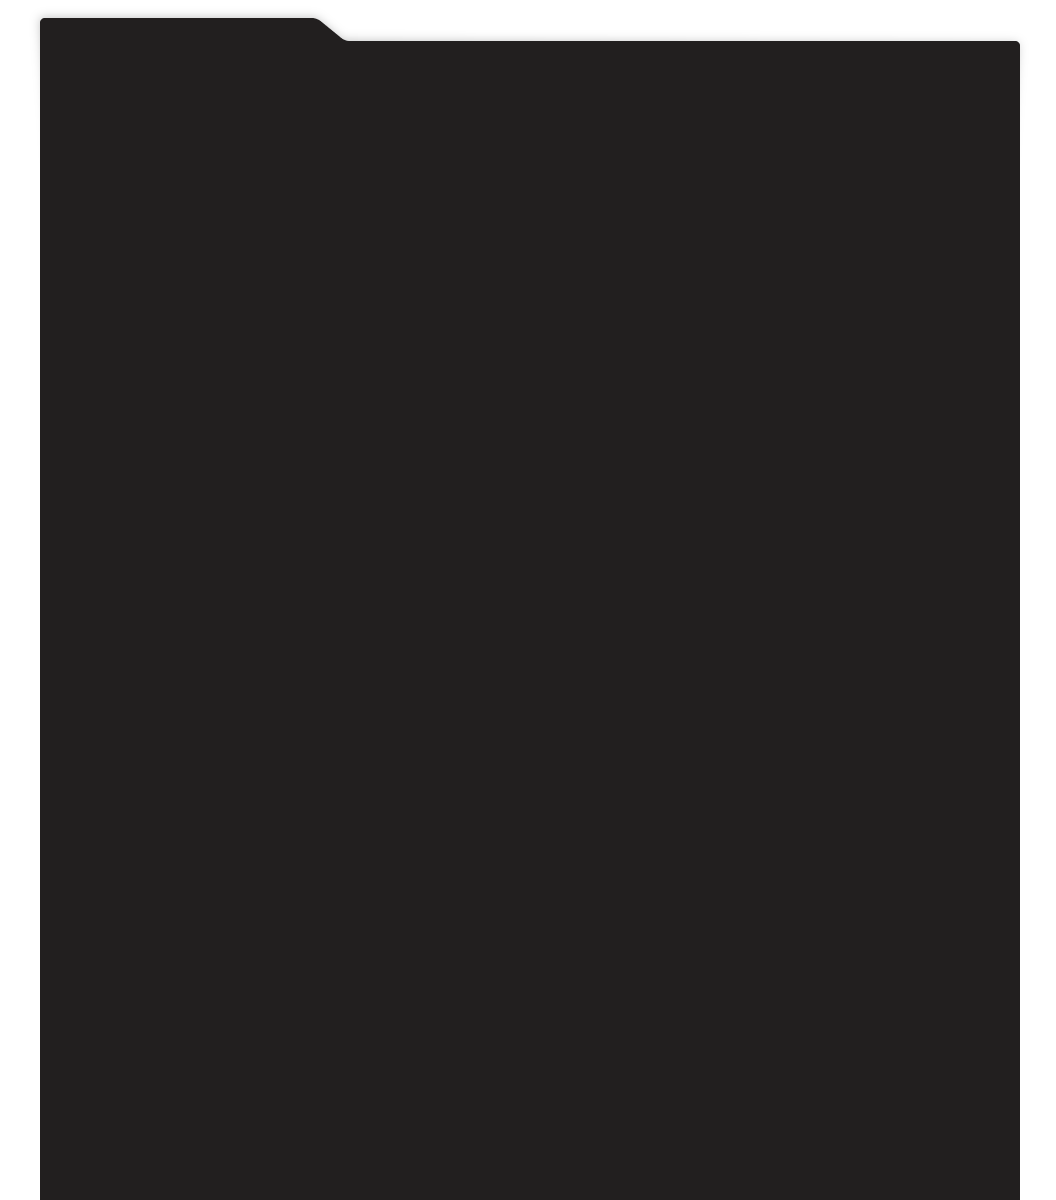
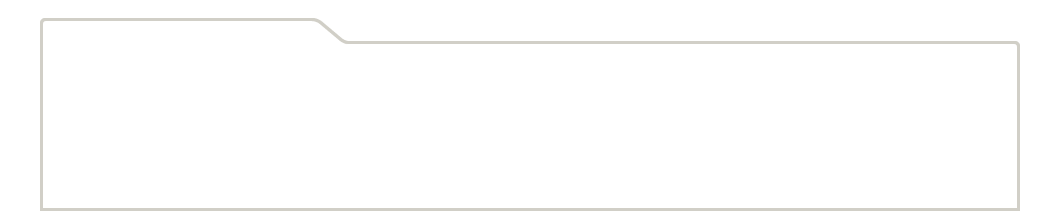
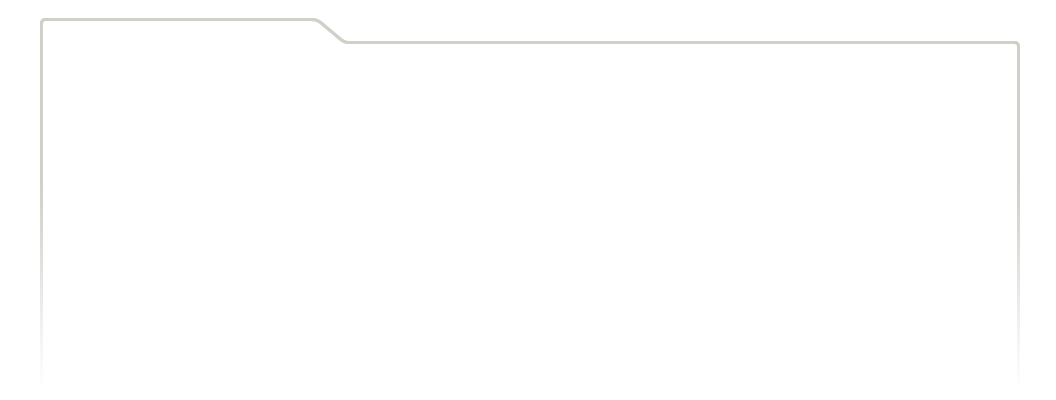
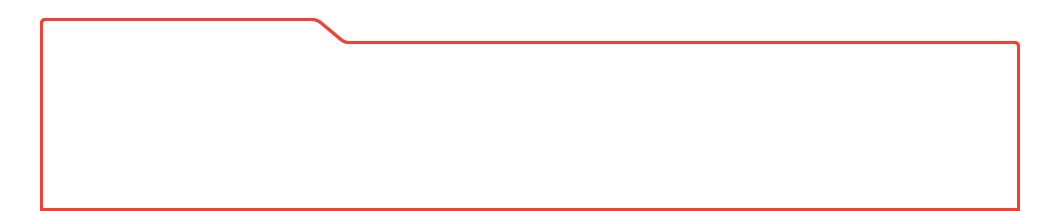
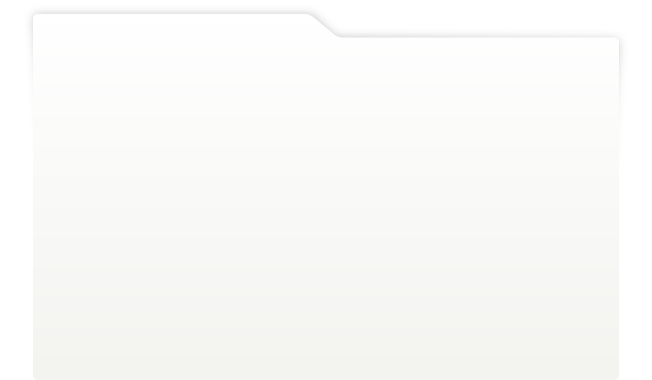
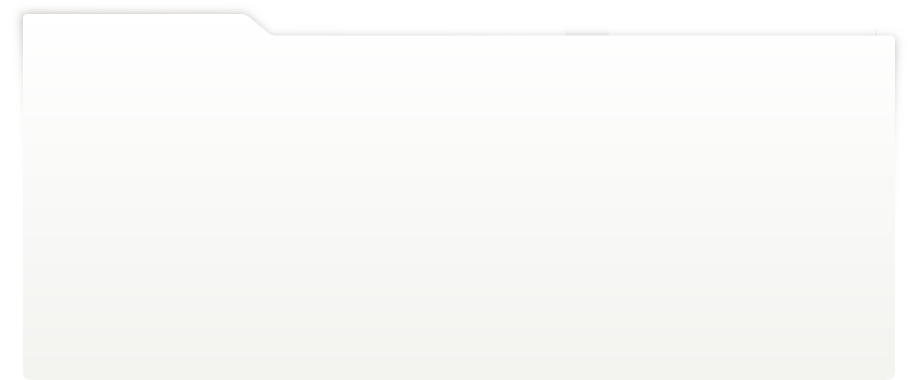
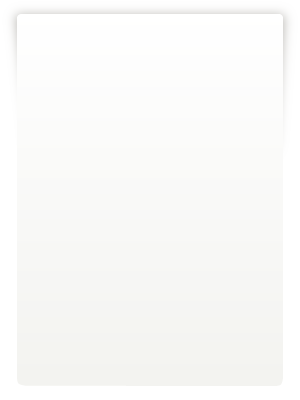
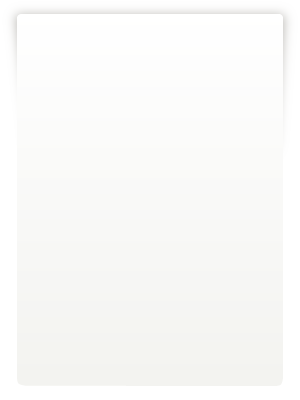
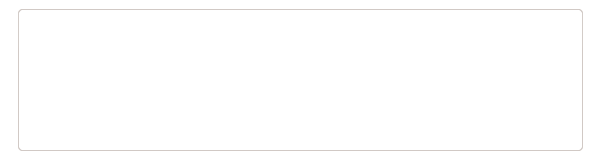
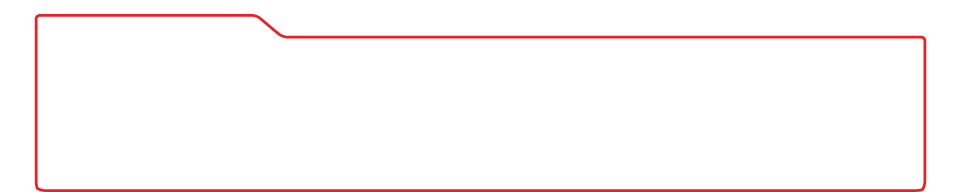
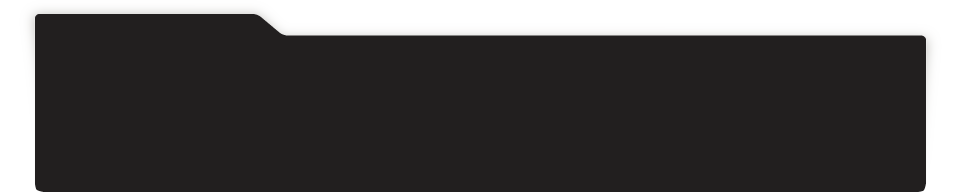
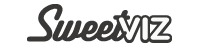
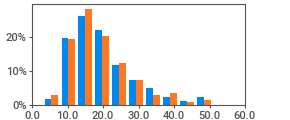
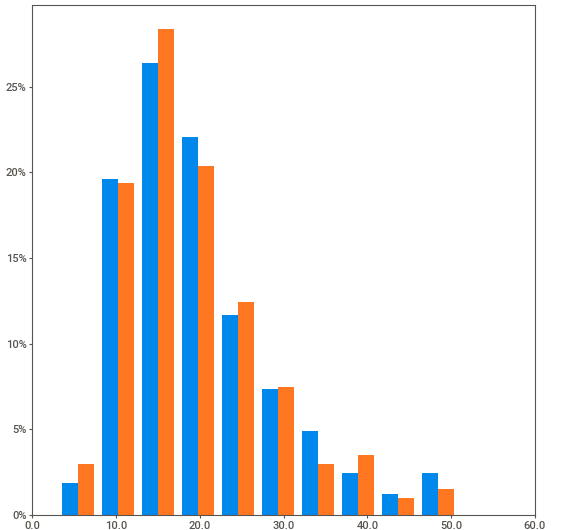
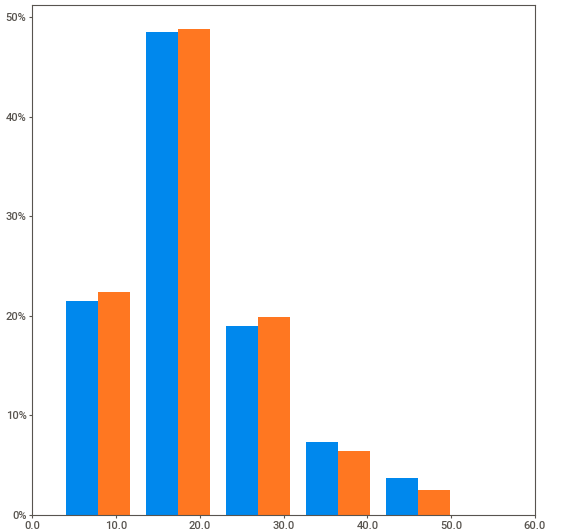
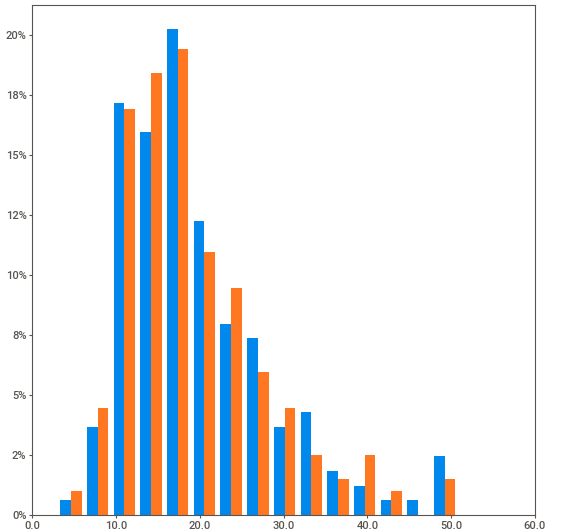
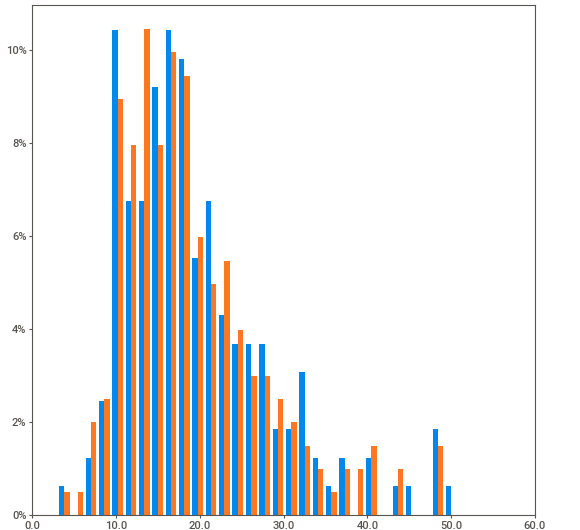
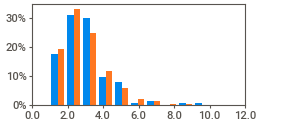
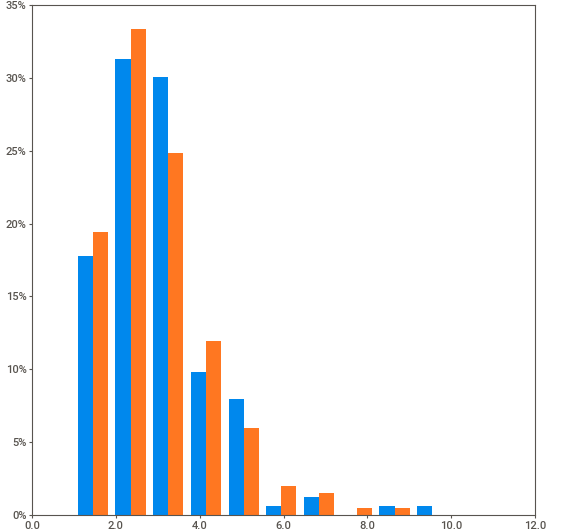
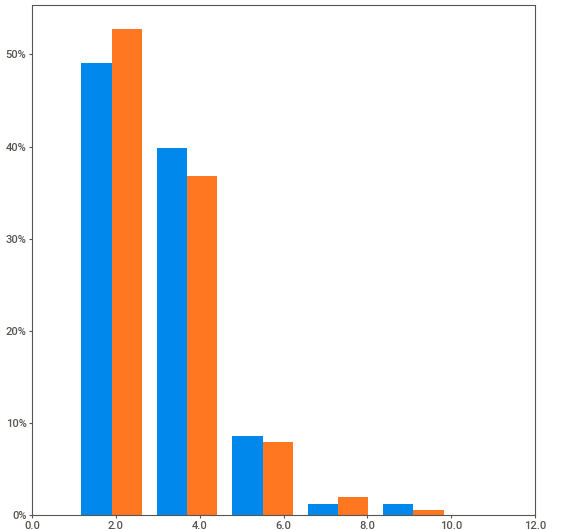
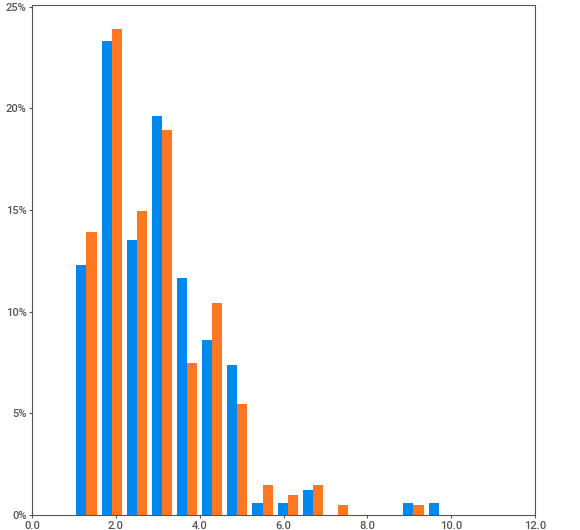
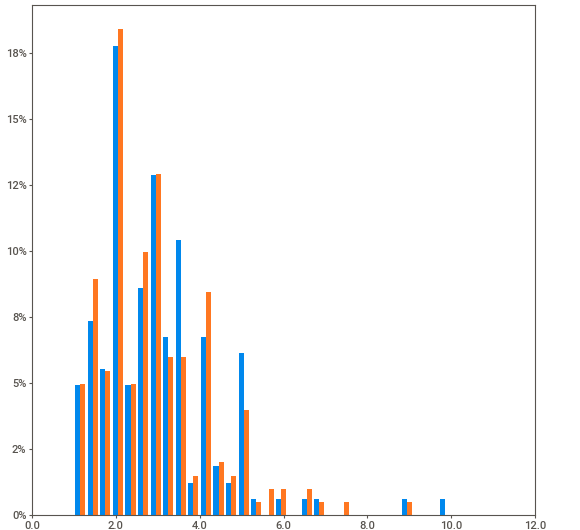
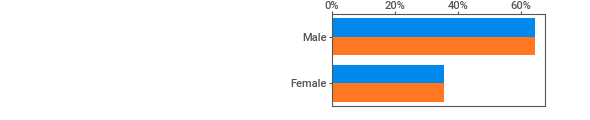
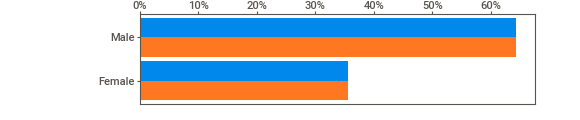
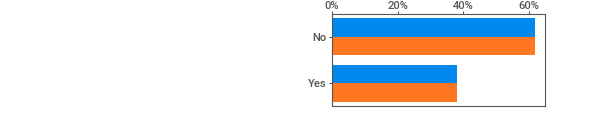
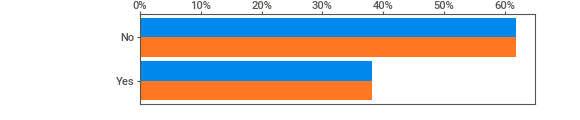
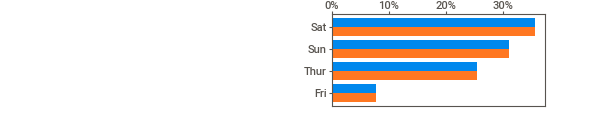
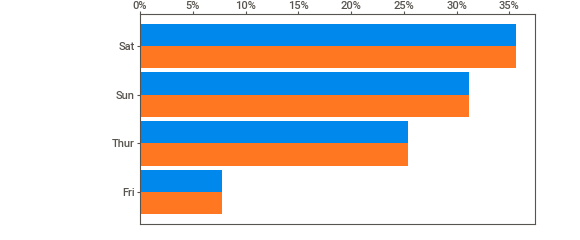
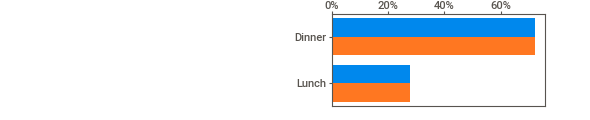
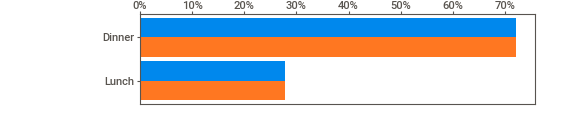
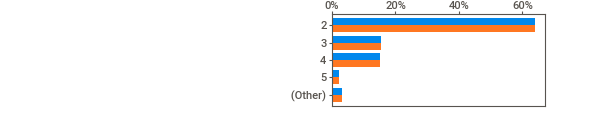
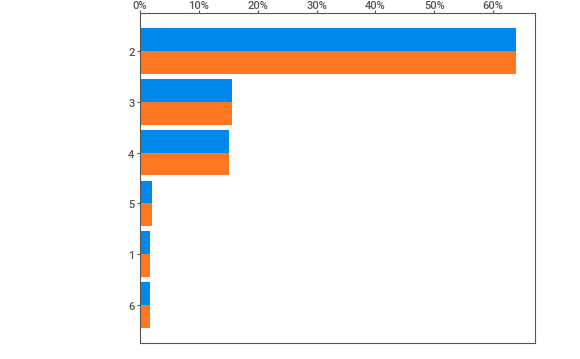
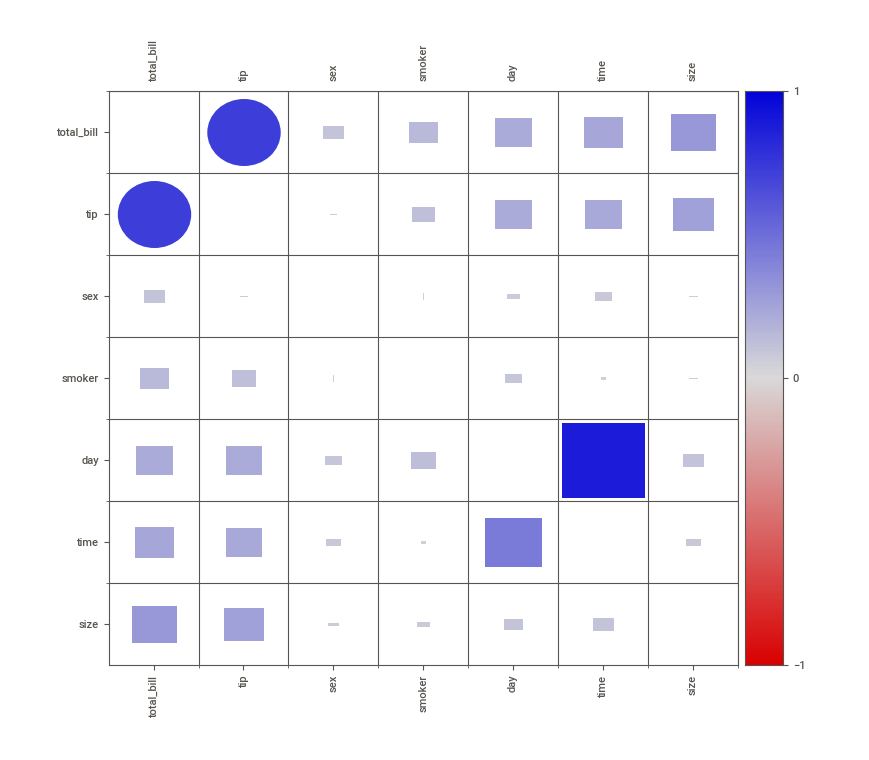
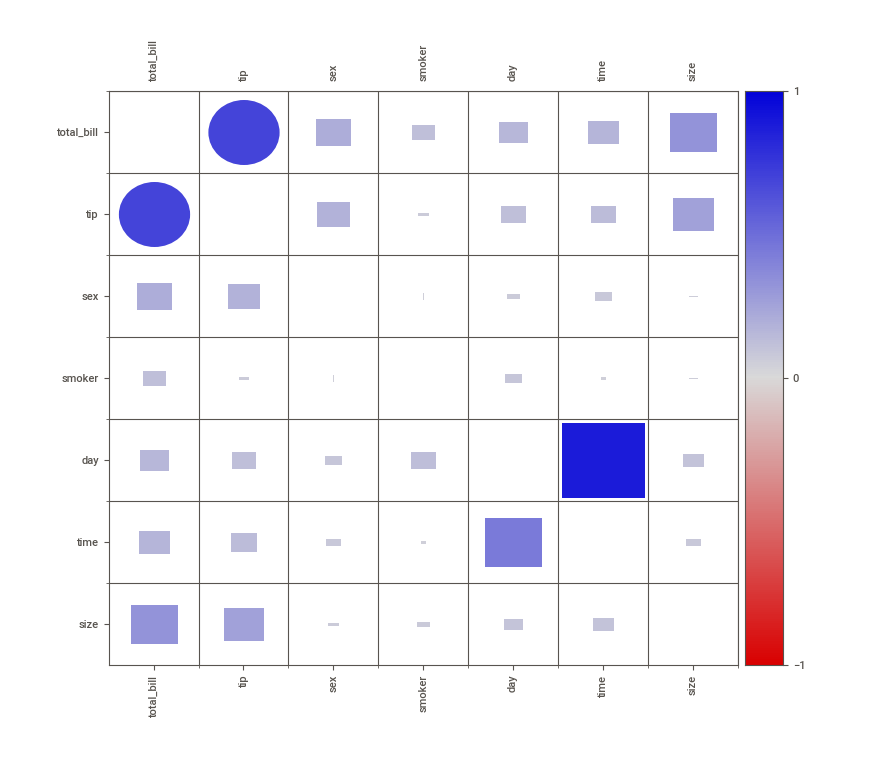

In [ ]:
# Comparando bases MCAR e MNAR com valores ausentes
report = sv.compare([gorjeta_NA,"MCAR"],[gorjeta_NA3,"MNAR"])
report.show_notebook() 

                                             |          | [  0%]   00:00 -> (? left)


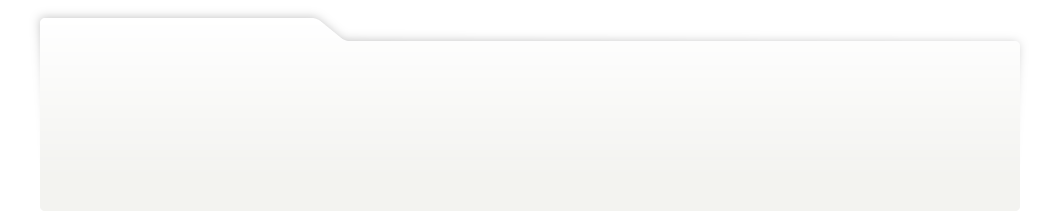
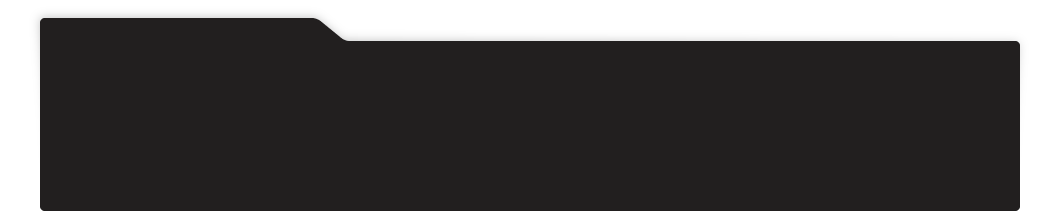
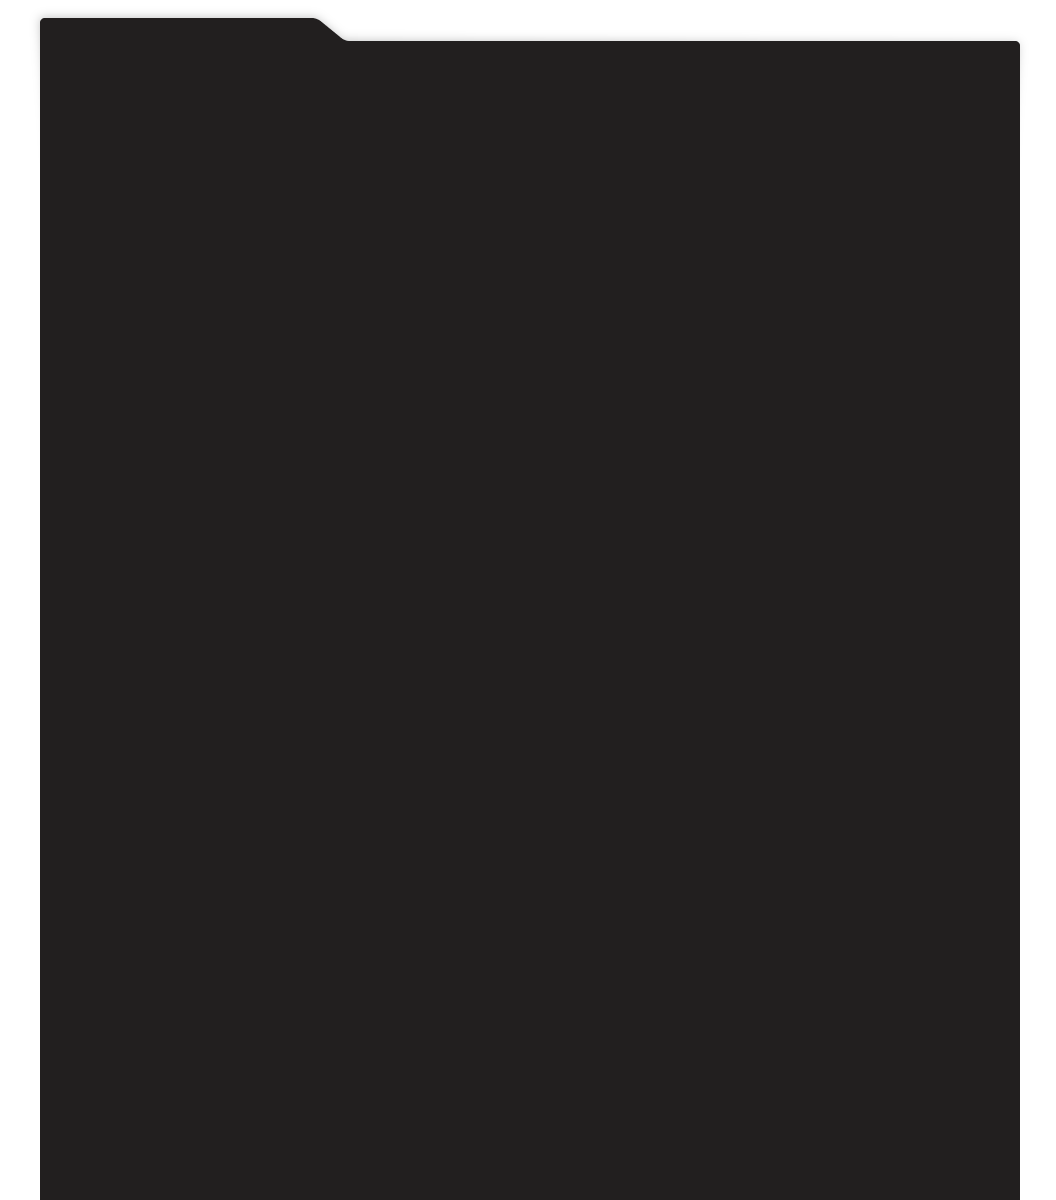
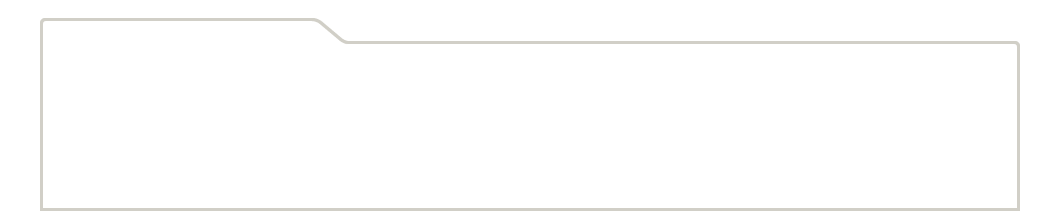
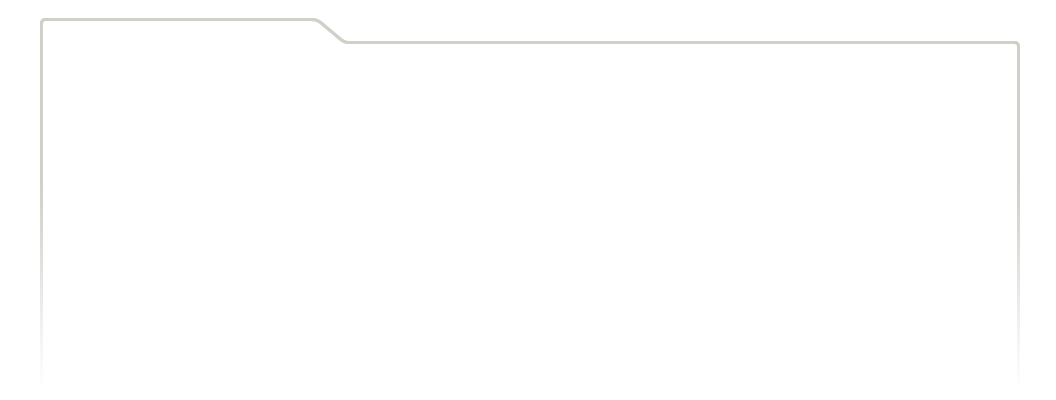
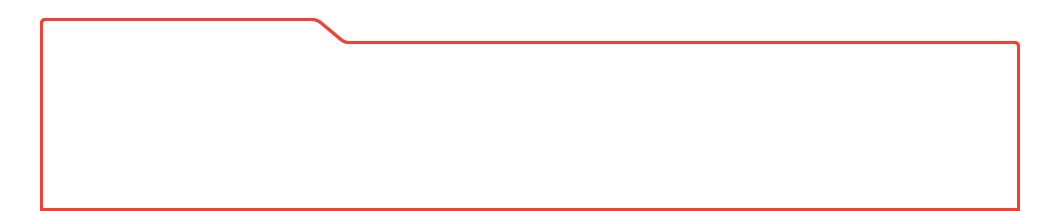
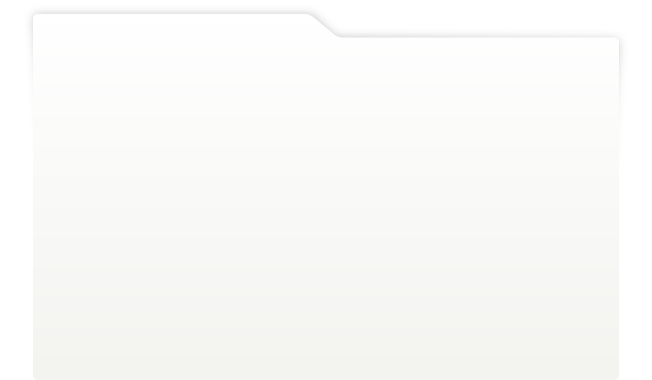
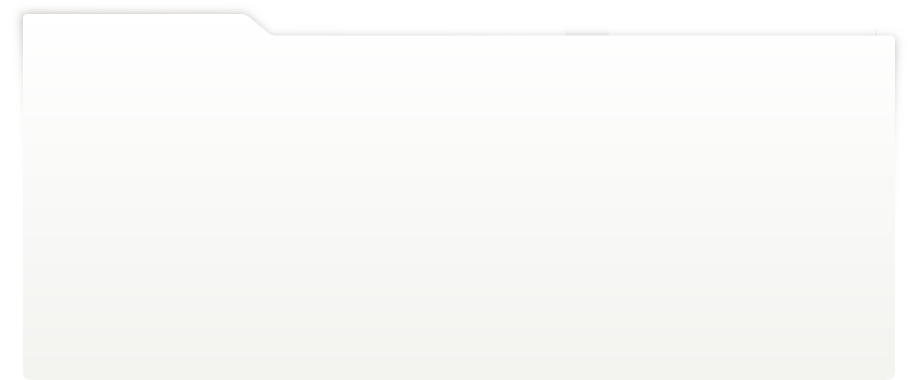
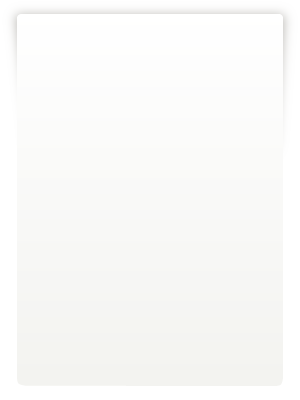
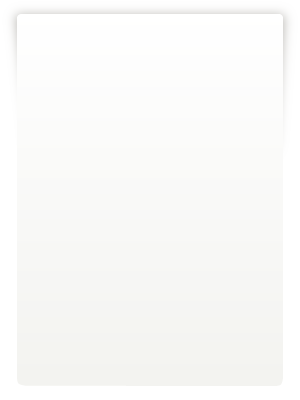
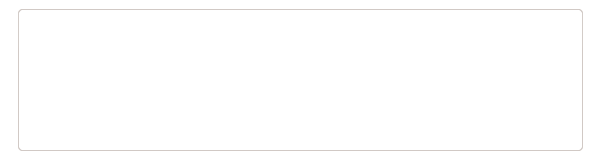
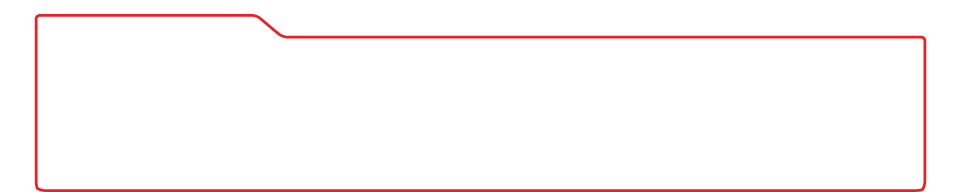
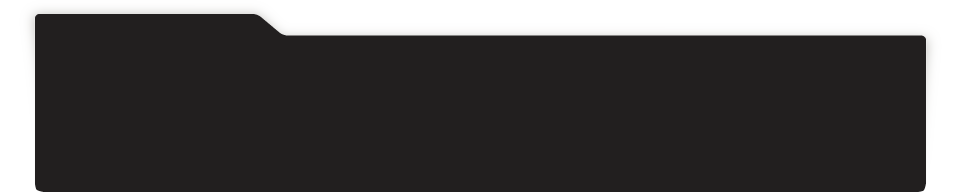
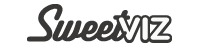
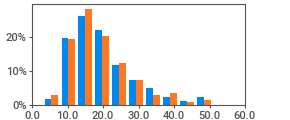
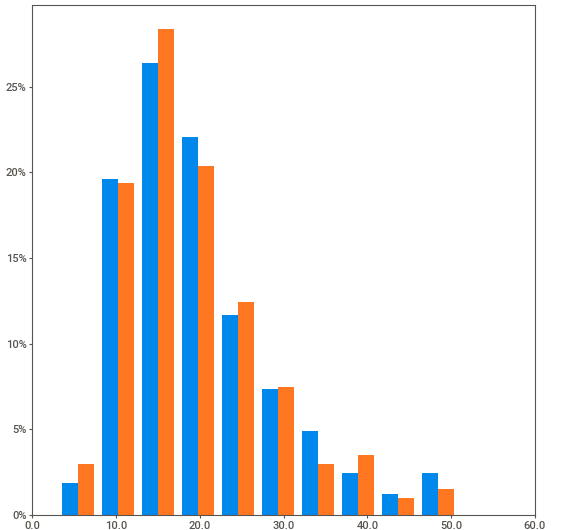
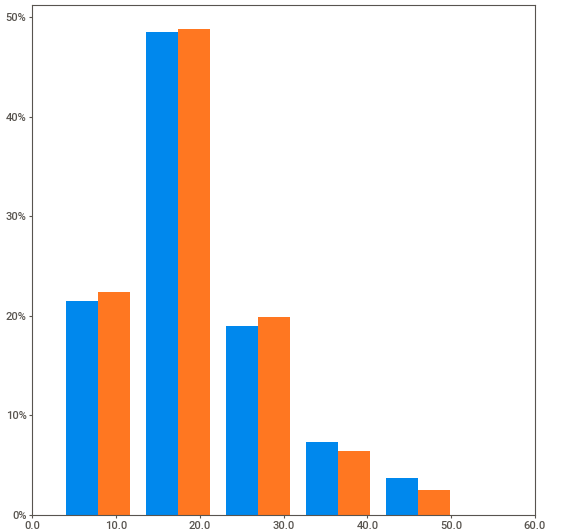
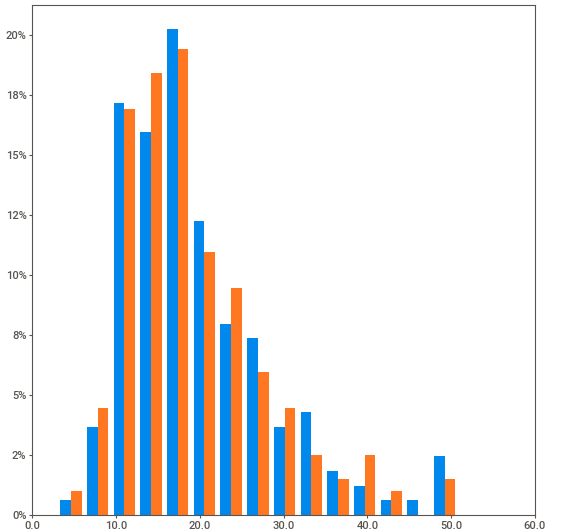
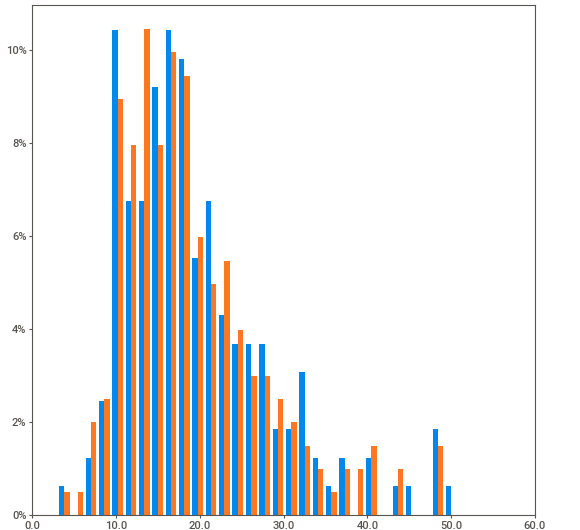
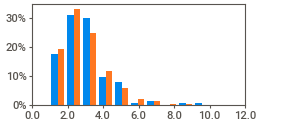
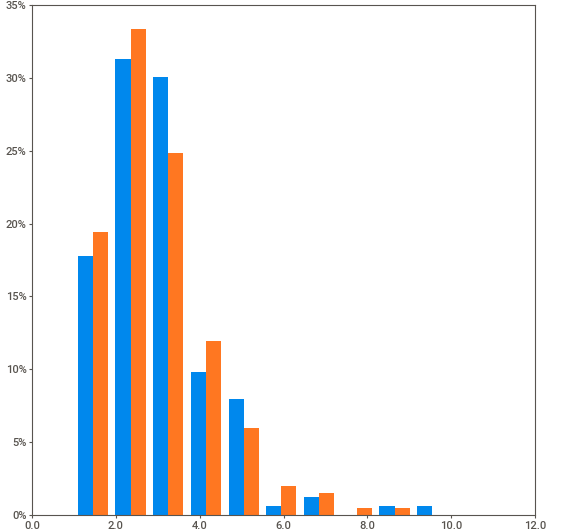
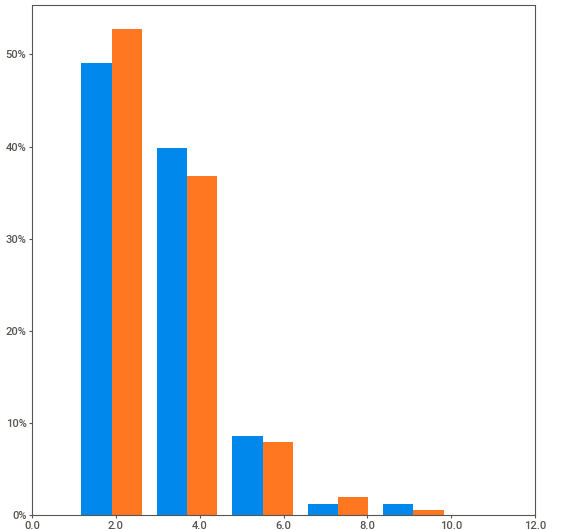
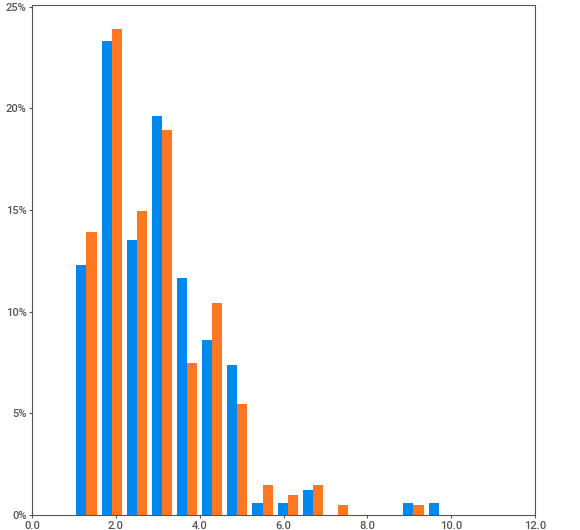
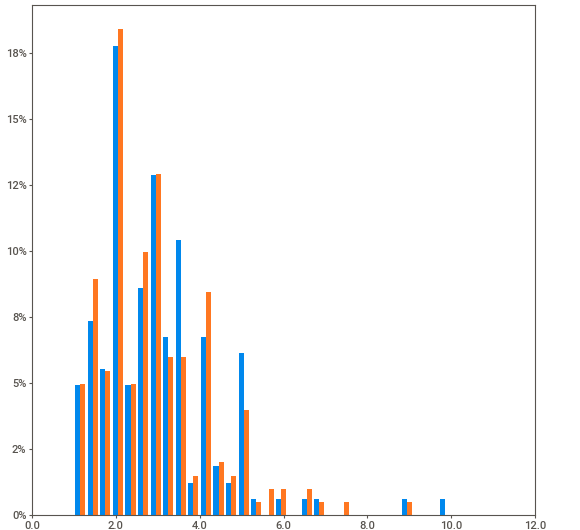
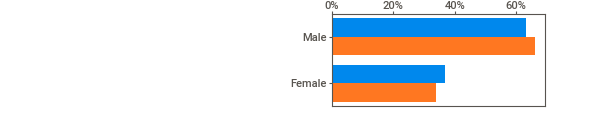
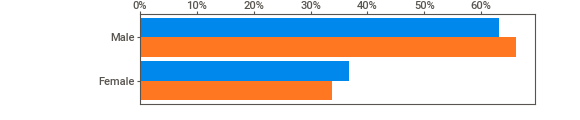
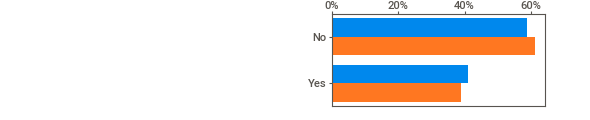
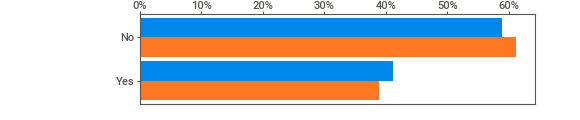
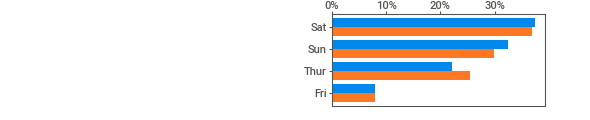
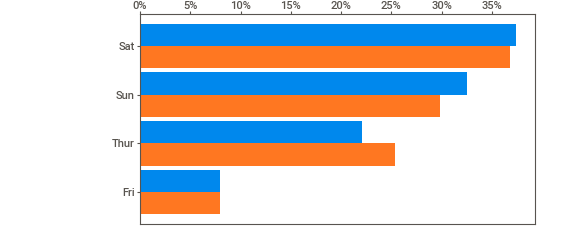
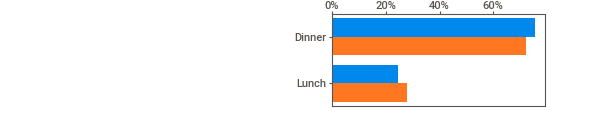
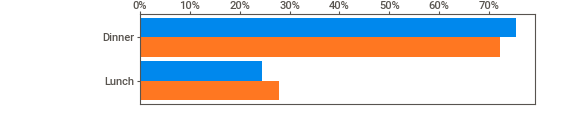
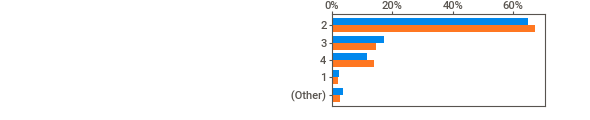
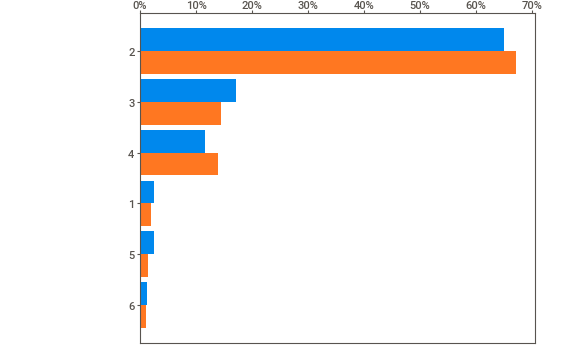
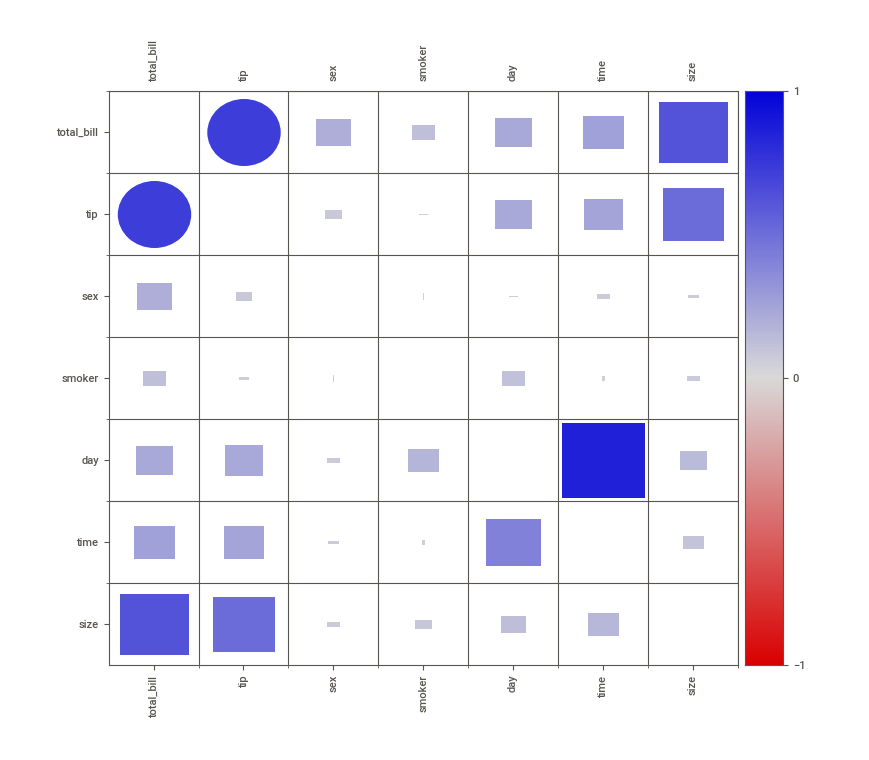
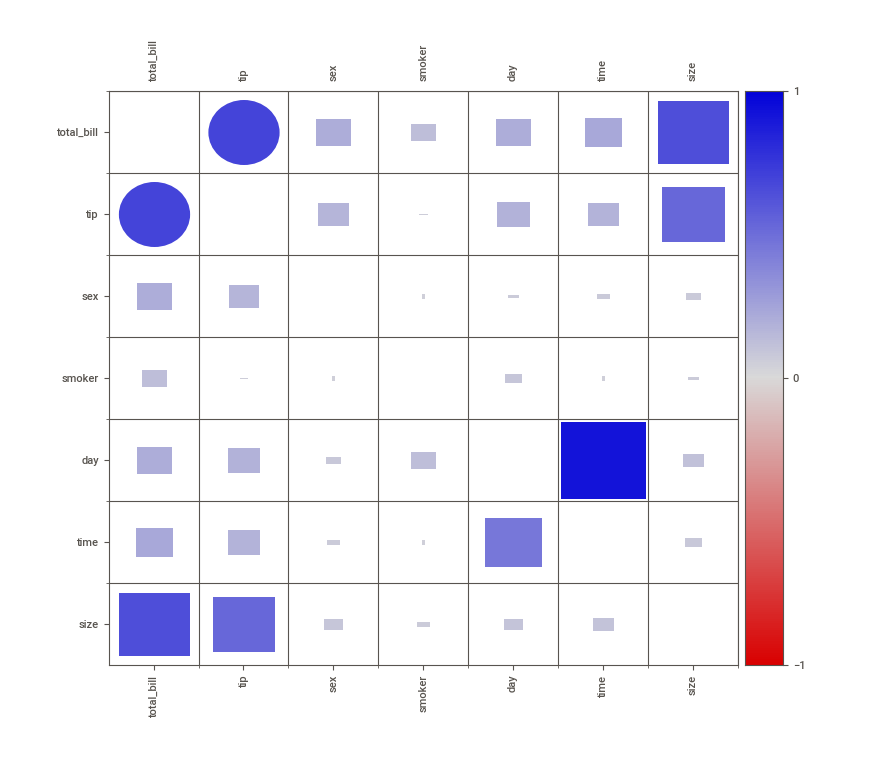

In [ ]:
# Comparação de remoção dos valores ausentes no MCAR e no MNAR
gorjeta_removido3 = gorjeta_NA3.dropna()
report = sv.compare([gorjeta_removido,"MCAR"],[gorjeta_removido3,"MAR"])
report.show_notebook() 

                                             |          | [  0%]   00:00 -> (? left)


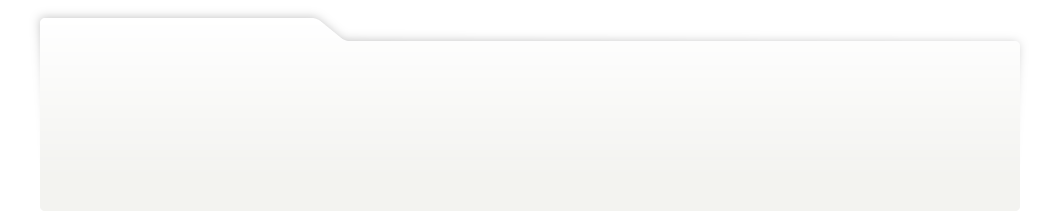
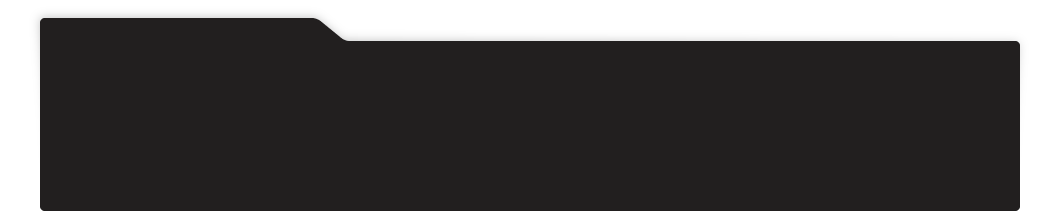
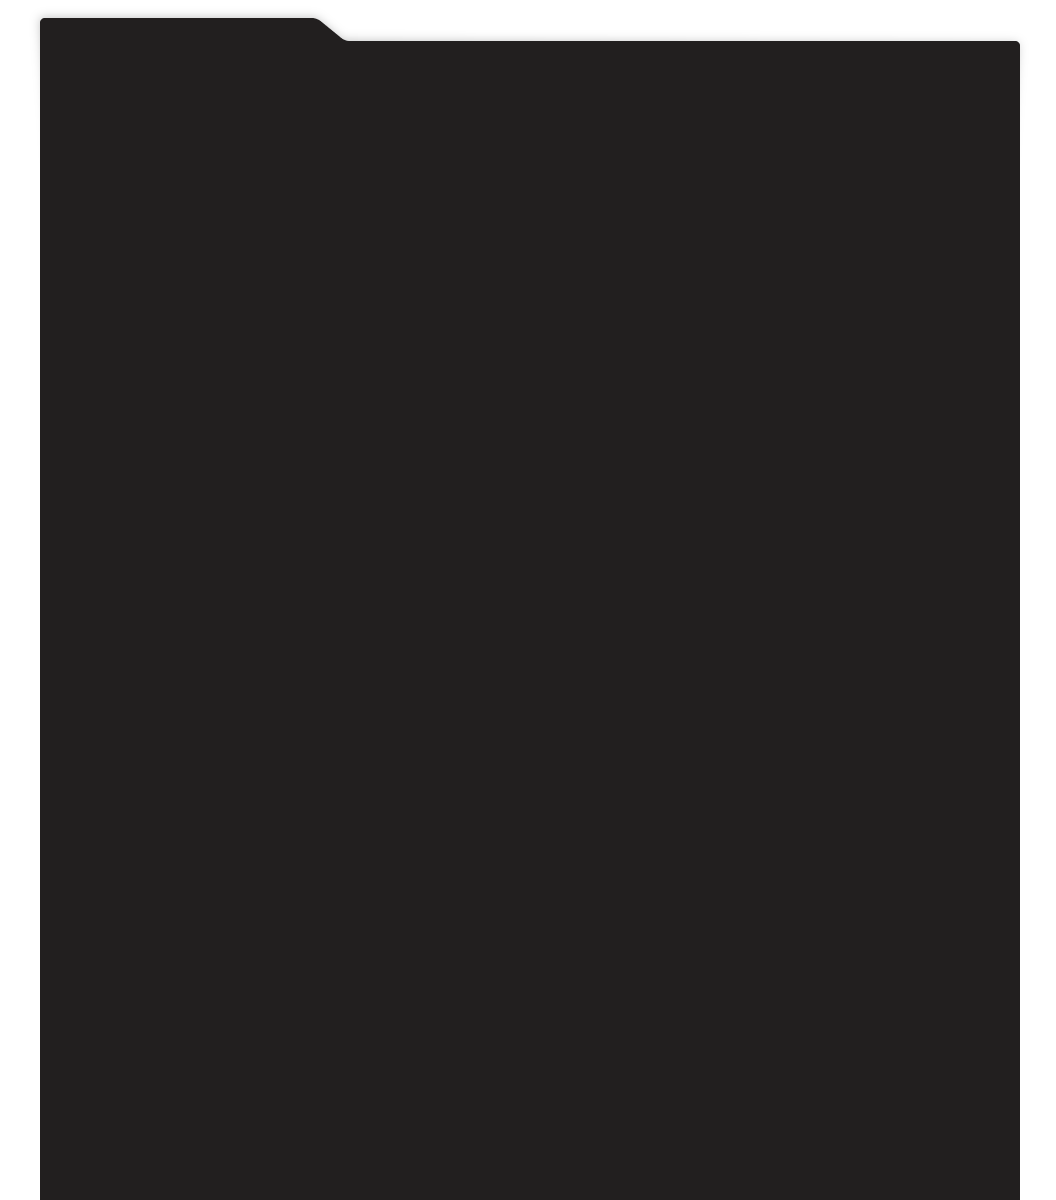
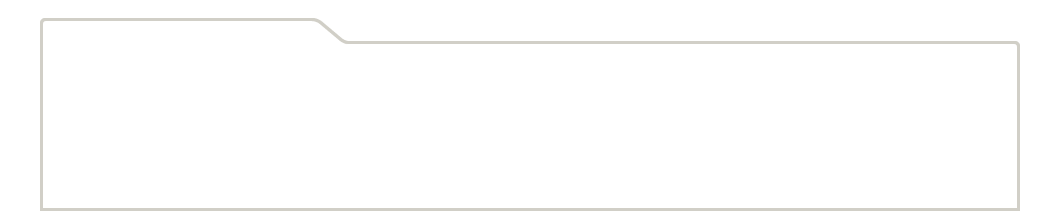
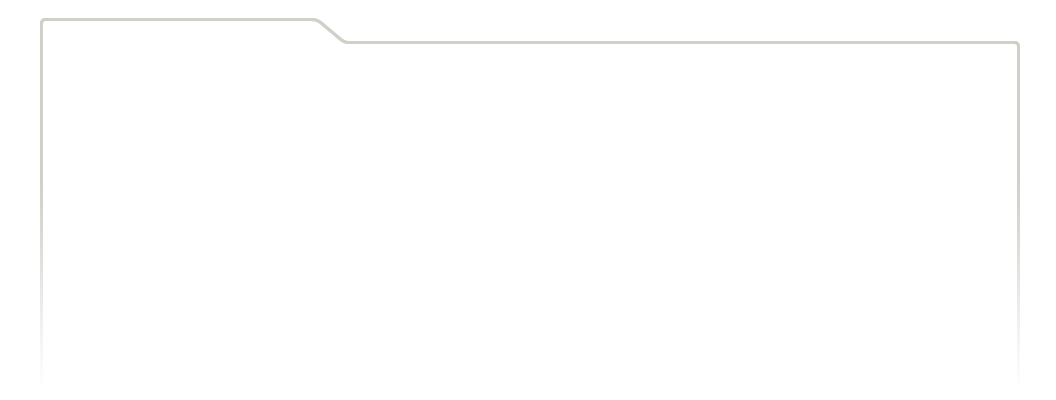
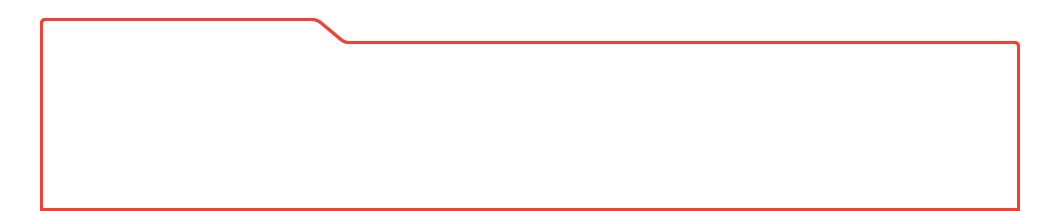
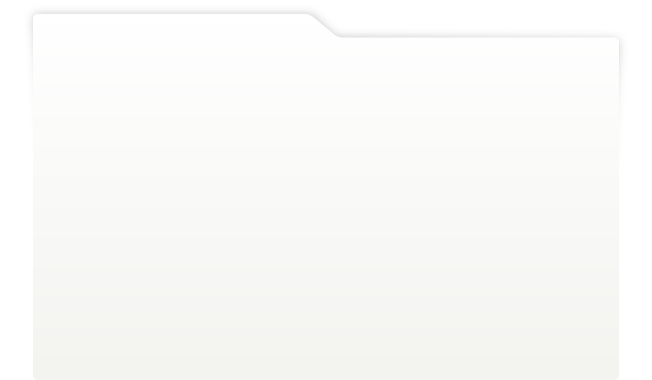
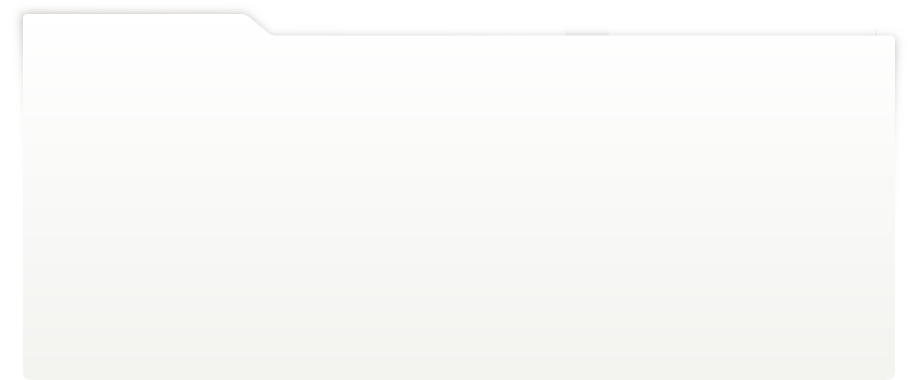
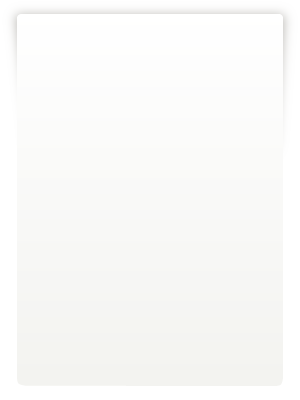
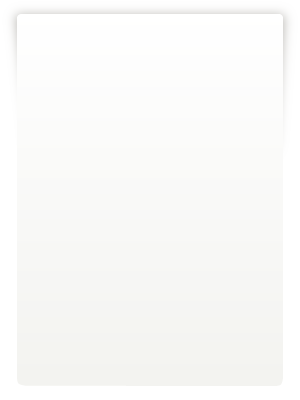
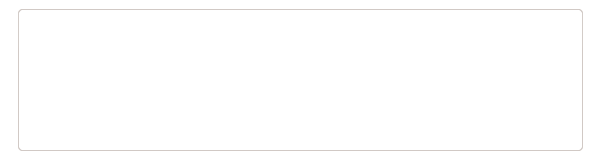
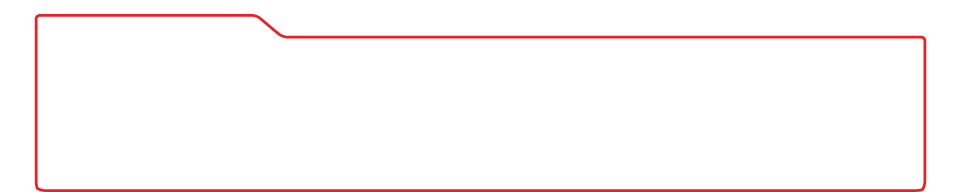
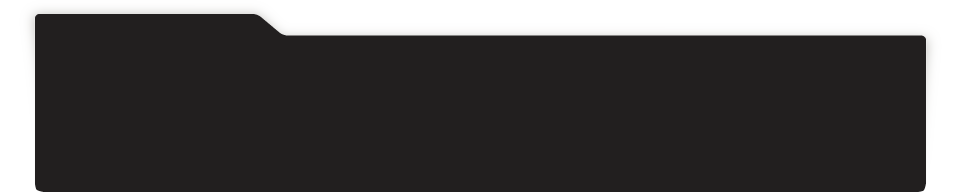
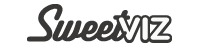
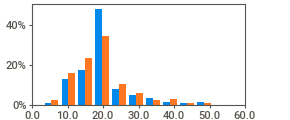
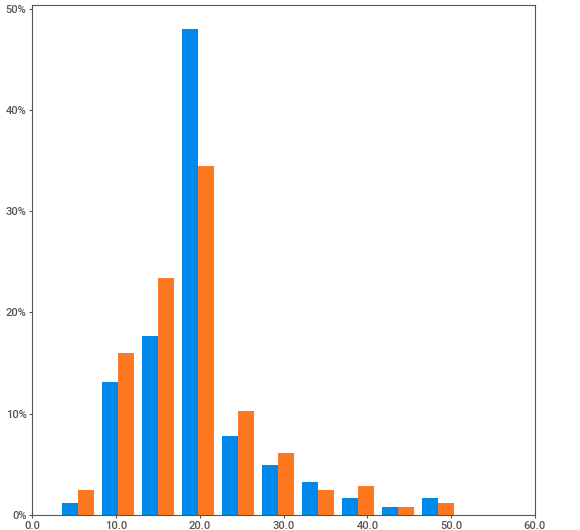
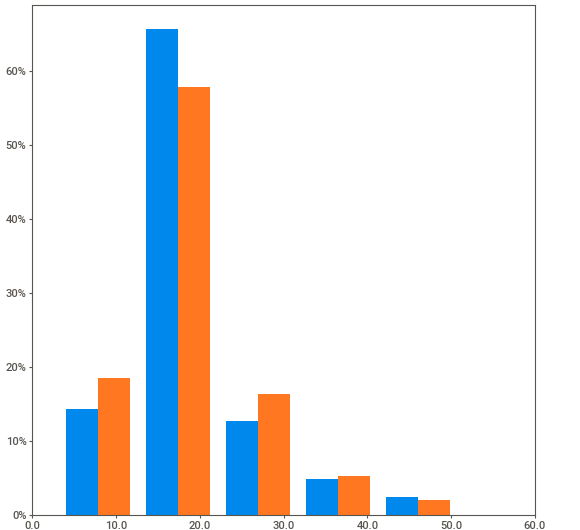
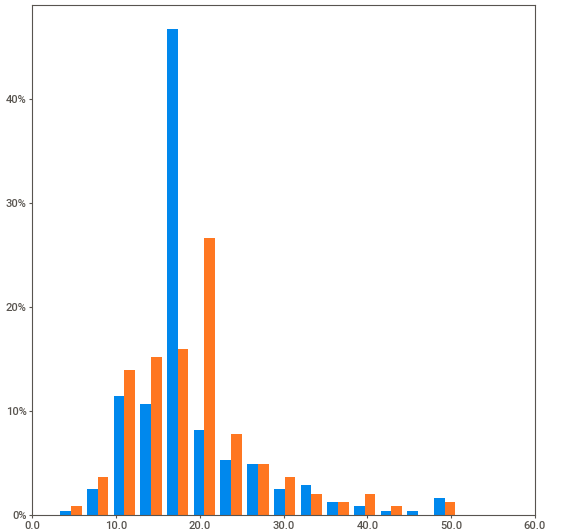
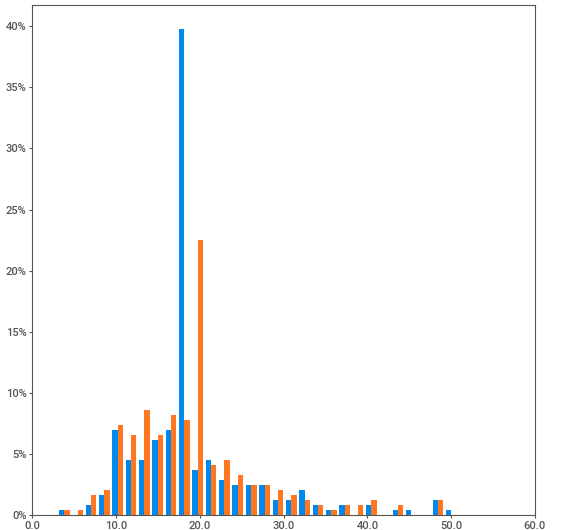
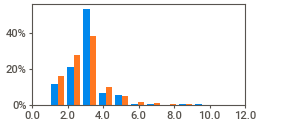
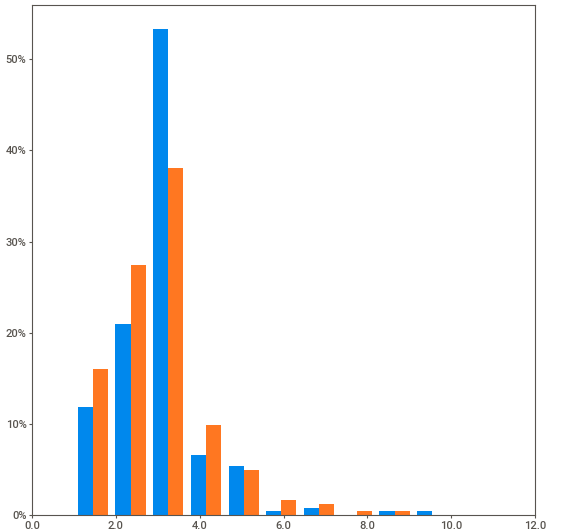
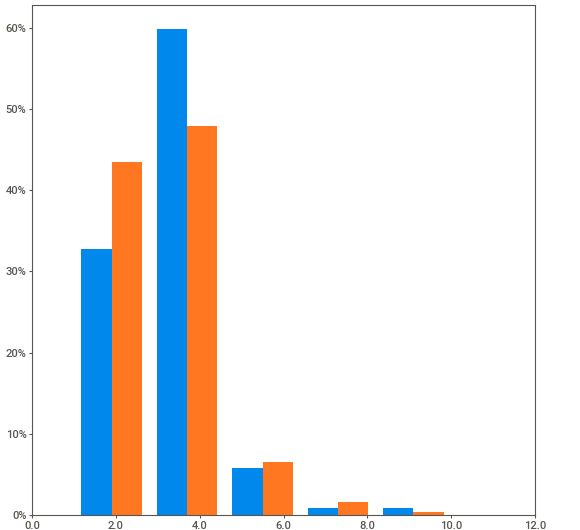
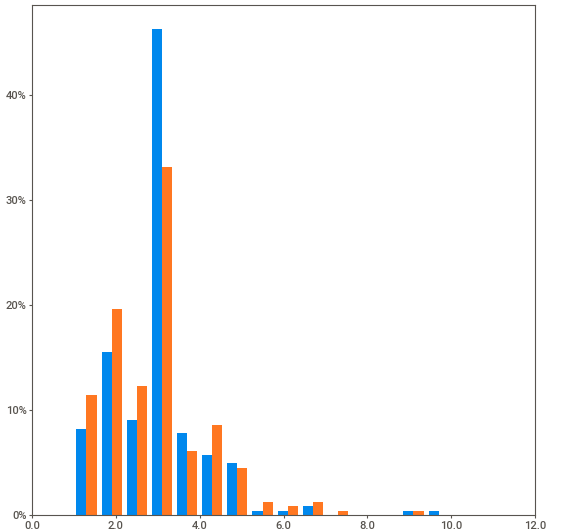
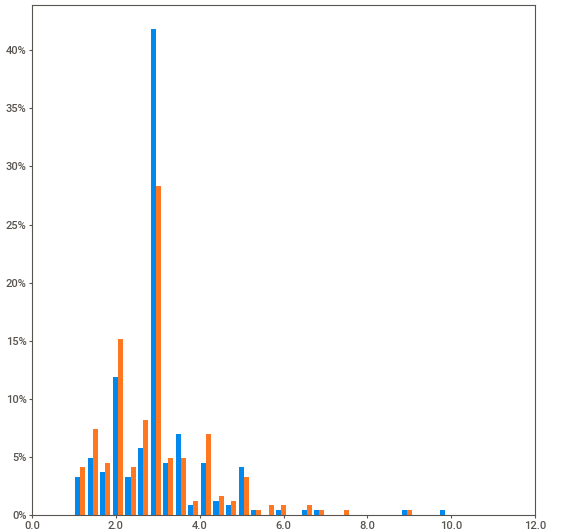
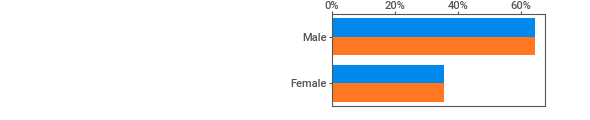
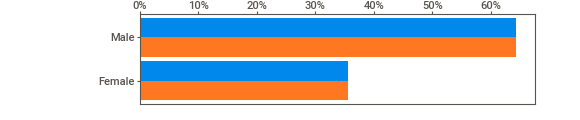
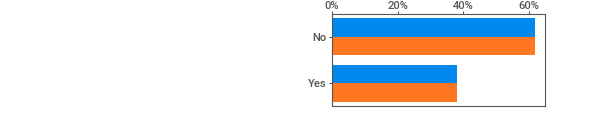
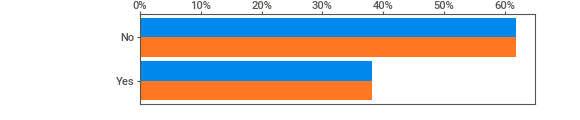
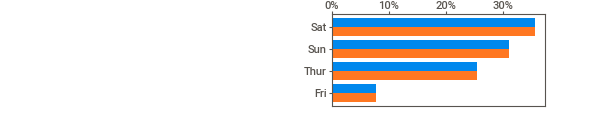
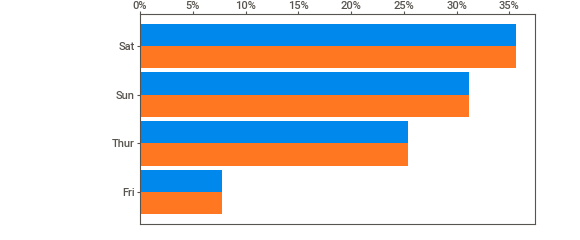
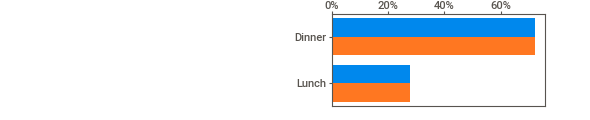
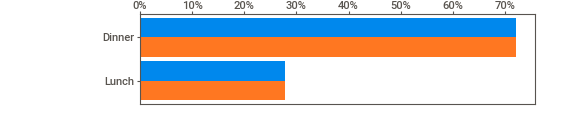
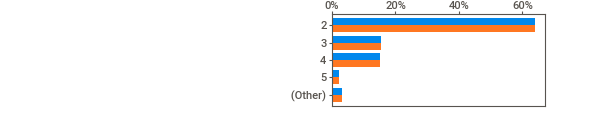
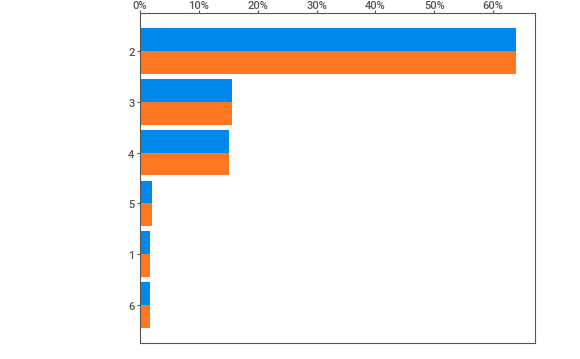
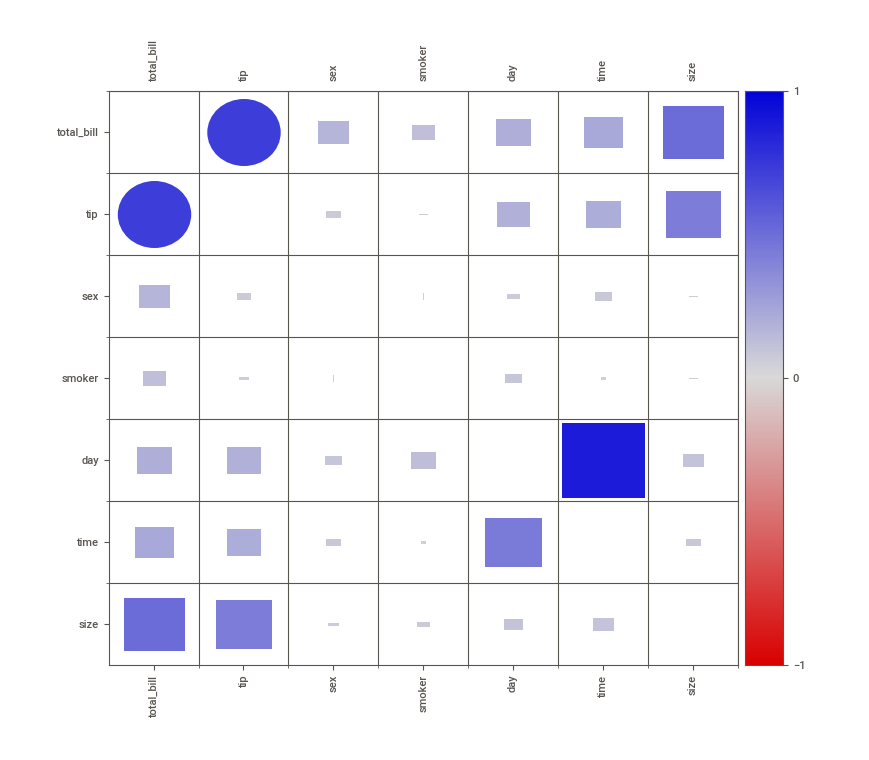
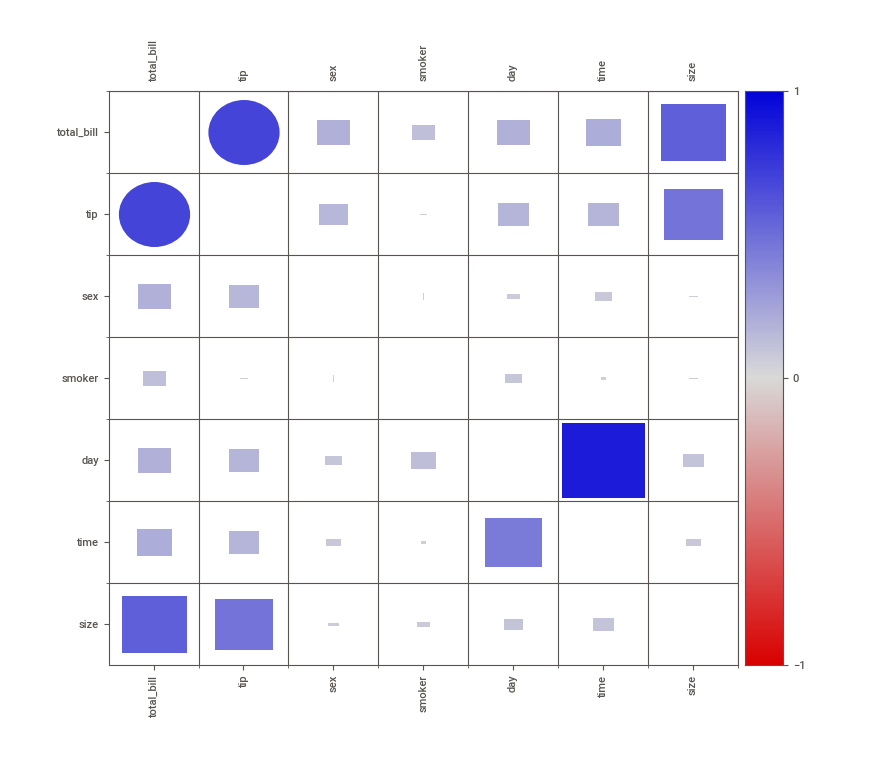

In [ ]:
# Comparando aplicação de substituição de valores no MCAR e MNAR
gorjeta_input3 = gorjeta_NA3.fillna(gorjeta_NA3.mean())
report = sv.compare([gorjeta_input,"MCAR"],[gorjeta_input3,"MNAR"])
report.show_notebook() 